In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out, S_driver_opt_out, traveller_opt_out, S_traveller_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

Using TensorFlow backend.


In [4]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [5]:
# the setting for TRB results do not delete
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 20000 #meter
params.dist_threshold_min = 2000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.ini_att = 0.01 #0.5
params.d2d.B_income = 1
params.d2d.fuel_cost = 0.25 #euro/km

params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 2 #1.5 in oded's paper
params.PT_fare = 1 ## euro
params.PT_avg_speed = 6

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro
params.platforms.fare = float(1.20) #euro/km
params.platforms.min_fare = float(2) # euro
params.platforms.comm_rate = float(0.10)
params.platforms.discount = float(0.0) # float(0.0)
params.platforms.daily_marketing = False

params.d2d.learning_d = 1 #for TRB 
params.d2d.B_Experience = 0.80
params.d2d.B_WOM = 0.2
params.d2d.B_Marketing = 0.0
params.d2d.diffusion_speed = 10/100 # speed for M is twice greater than WOM.
params.d2d.m = 5 #for TRB
params.d2d.Eini_att = 0.01
params.d2d.adj_s = 2
params.VoT = 10.63 # value of time per hour
params.seed = 1
params.assert_me = False
params.paths.requests = 'Amsterdam_requests.csv'

params.nP = 2000
params.nV = 200
params.nD = 800
params.simTime = 4
params.d2d.res_wage = params.simTime*10.63 #euro

In [6]:
# sim = MaaSSim.simulators.simulate(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,
#                                   kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

sim_rln = MaaSSim.simulators.simulate_RLn(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,
                                  kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

This simulation uses albatros data


[2023-03-30 14:30:41,950] Setting up 4h simulation at 2023-03-30 12:30:12 for 200 vehicles and 2000 passengers in Amsterdam, Netherlands


initialization-----------------------
state_size =  2   action_size =  3   Lever = Commission   step =  0.05
fare =  1.2   comm_rate =  0.1   disc =  0.0   marketing = 0-100
-------------------------------------
Day =  0
comm_rate =  0.15


[2023-03-30 14:30:52,550] simulation time 3.5 s


nP =  0    nV =  0
reward: 0.0
mean reward so far: nan
Day =  1
comm_rate =  0.2


[2023-03-30 14:31:03,845] simulation time 4.1 s


nP =  22    nV =  2
reward: 0.014334581818181818
mean reward so far: 0.0
Day =  2
comm_rate =  0.15


[2023-03-30 14:31:13,356] simulation time 4.2 s


nP =  38    nV =  1
reward: 0.01910344090909091
mean reward so far: 13.056080000000001
Day =  3
comm_rate =  0.2


[2023-03-30 14:31:23,796] simulation time 5.0 s


nP =  59    nV =  5
reward: 0.04381069090909091
mean reward so far: 22.642433333333333
Day =  4
comm_rate =  0.15


[2023-03-30 14:31:34,404] simulation time 5.2 s


nP =  58    nV =  10
reward: 0.04676785
mean reward so far: 41.193585
Day =  5
comm_rate =  0.1


[2023-03-30 14:31:45,799] simulation time 6.2 s


nP =  93    nV =  11
reward: 0.057556136363636365
mean reward so far: 46.302576
Day =  6
comm_rate =  0.05


[2023-03-30 14:31:57,301] simulation time 6.3 s


nP =  105    nV =  8
reward: 0.046290454545454544
mean reward so far: 51.01998
Day =  7
comm_rate =  0.05


[2023-03-30 14:32:09,372] simulation time 6.6 s


nP =  116    nV =  14
reward: 0.06056826818181818
mean reward so far: 49.57112571428571
Day =  8
comm_rate =  0.05


[2023-03-30 14:32:21,923] simulation time 7.2 s


nP =  139    nV =  13
reward: 0.06508171363636364
mean reward so far: 48.5272825
Day =  9
comm_rate =  0


[2023-03-30 14:32:34,494] simulation time 7.3 s


nP =  138    nV =  11
reward: 0.049600000000000005
mean reward so far: 48.650866666666666
Day =  10
comm_rate =  0


[2023-03-30 14:32:46,436] simulation time 6.7 s


nP =  120    nV =  18
reward: 0.06
mean reward so far: 43.78578
Day =  11
comm_rate =  0


[2023-03-30 14:32:59,478] simulation time 7.6 s


nP =  156    nV =  13
reward: 0.05720000000000001
mean reward so far: 39.805254545454545
Day =  12
comm_rate =  0


[2023-03-30 14:33:12,557] simulation time 7.7 s


nP =  157    nV =  22
reward: 0.07540000000000001
mean reward so far: 36.48815
Day =  13
comm_rate =  0


[2023-03-30 14:33:25,443] simulation time 7.6 s


nP =  153    nV =  14
reward: 0.05860000000000001
mean reward so far: 33.68136923076923
Day =  14
comm_rate =  0.05


[2023-03-30 14:33:38,726] simulation time 7.8 s


nP =  166    nV =  14
reward: 0.07531360454545455
mean reward so far: 31.275557142857142
Day =  15
comm_rate =  0


[2023-03-30 14:33:51,841] simulation time 7.8 s


nP =  164    nV =  11
reward: 0.05480000000000001
mean reward so far: 33.33051066666666
Day =  16
comm_rate =  0.0


[2023-03-30 14:34:04,555] simulation time 7.4 s


nP =  146    nV =  22
reward: 0.0732
mean reward so far: 31.24735375
Day =  17
comm_rate =  0.05


[2023-03-30 14:34:17,237] simulation time 7.2 s


nP =  139    nV =  13
reward: 0.06497700000000001
mean reward so far: 29.40927411764706
Day =  18
comm_rate =  0.1


[2023-03-30 14:34:30,443] simulation time 8.0 s


nP =  162    nV =  13
reward: 0.08486766363636364
mean reward so far: 30.507581111111108
Day =  19
comm_rate =  0.05


[2023-03-30 14:34:44,195] simulation time 7.9 s


nP =  160    nV =  20
reward: 0.08578608636363635
mean reward so far: 35.03127263157894
Day =  20
comm_rate =  0


[2023-03-30 14:34:57,158] simulation time 7.4 s


nP =  147    nV =  16
reward: 0.0614
mean reward so far: 36.312647999999996
Day =  21
comm_rate =  0.0


[2023-03-30 14:35:10,714] simulation time 8.3 s


nP =  173    nV =  16
reward: 0.06659999999999999
mean reward so far: 34.58347428571428
Day =  22
comm_rate =  0.0


[2023-03-30 14:35:24,252] simulation time 8.2 s


nP =  181    nV =  17
reward: 0.0702
mean reward so far: 33.011498181818176
Day =  23
comm_rate =  0.0


[2023-03-30 14:35:37,438] simulation time 7.7 s


nP =  159    nV =  17
reward: 0.06580000000000001
mean reward so far: 31.57621565217391
Day =  24
comm_rate =  0


[2023-03-30 14:35:50,011] simulation time 7.3 s


nP =  144    nV =  15
reward: 0.0588
mean reward so far: 30.260540000000002
Day =  25
comm_rate =  0.05


[2023-03-30 14:36:03,173] simulation time 7.7 s


nP =  158    nV =  19
reward: 0.08275024545454546
mean reward so far: 29.050118400000002
Day =  26
comm_rate =  0


[2023-03-30 14:36:16,604] simulation time 8.0 s


nP =  168    nV =  17
reward: 0.06760000000000001
mean reward so far: 30.15823230769231
Day =  27
comm_rate =  0.05


[2023-03-30 14:36:30,251] simulation time 8.4 s


nP =  188    nV =  19
reward: 0.09074194545454545
mean reward so far: 29.041260740740743
Day =  28
comm_rate =  0.05


[2023-03-30 14:36:43,154] simulation time 7.4 s


nP =  147    nV =  17
reward: 0.07543137727272727
mean reward so far: 30.38352142857143
Day =  29
comm_rate =  0


[2023-03-30 14:36:56,291] simulation time 7.8 s


nP =  164    nV =  18
reward: 0.0688
mean reward so far: 31.161264137931035
Day =  30
comm_rate =  0.0


[2023-03-30 14:37:09,517] simulation time 7.7 s


nP =  160    nV =  18
reward: 0.06799999999999999
mean reward so far: 30.12255533333333
Day =  31
comm_rate =  0.05


[2023-03-30 14:37:22,287] simulation time 7.4 s


nP =  145    nV =  24
reward: 0.08858813636363638
mean reward so far: 29.150859999999998
Day =  32
comm_rate =  0.05


[2023-03-30 14:37:34,788] simulation time 7.0 s


nP =  155    nV =  8
reward: 0.06078220909090909
mean reward so far: 29.833264375
Day =  33
comm_rate =  0


[2023-03-30 14:37:47,832] simulation time 7.7 s


nP =  155    nV =  23
reward: 0.07700000000000001
mean reward so far: 30.766853939393936
Day =  34
comm_rate =  0


[2023-03-30 14:38:00,871] simulation time 7.5 s


nP =  151    nV =  13
reward: 0.05620000000000001
mean reward so far: 29.861946470588233
Day =  35
comm_rate =  0.0


[2023-03-30 14:38:13,711] simulation time 7.5 s


nP =  154    nV =  13
reward: 0.05680000000000001
mean reward so far: 29.008747999999997
Day =  36
comm_rate =  0.0


[2023-03-30 14:38:27,003] simulation time 7.7 s


nP =  162    nV =  15
reward: 0.062400000000000004
mean reward so far: 28.202949444444442
Day =  37
comm_rate =  0.05


[2023-03-30 14:38:40,186] simulation time 7.6 s


nP =  156    nV =  19
reward: 0.08269931818181818
mean reward so far: 27.440707567567564
Day =  38
comm_rate =  0.1


[2023-03-30 14:38:53,604] simulation time 8.0 s


nP =  176    nV =  13
reward: 0.09111772727272728
mean reward so far: 28.281662631578946
Day =  39
comm_rate =  0.1


[2023-03-30 14:39:07,173] simulation time 8.0 s


nP =  177    nV =  13
reward: 0.09080070909090909
mean reward so far: 30.931825128205126
Day =  40
comm_rate =  0.15


[2023-03-30 14:39:20,513] simulation time 8.0 s


nP =  170    nV =  17
reward: 0.11119776363636363
mean reward so far: 33.3926075
Day =  41
comm_rate =  0.1


[2023-03-30 14:39:33,943] simulation time 7.8 s


nP =  168    nV =  13
reward: 0.08754718181818183
mean reward so far: 37.214011219512194
Day =  42
comm_rate =  0.15


[2023-03-30 14:39:47,318] simulation time 8.1 s


nP =  179    nV =  10
reward: 0.10290482727272728
mean reward so far: 39.25576333333333
Day =  43
comm_rate =  0.1


[2023-03-30 14:40:00,451] simulation time 7.6 s


nP =  155    nV =  21
reward: 0.0977266909090909
mean reward so far: 43.16286744186046
Day =  44
comm_rate =  0.05


[2023-03-30 14:40:13,983] simulation time 8.2 s


nP =  179    nV =  17
reward: 0.08429319545454546
mean reward so far: 44.65456227272727
Day =  45
comm_rate =  0.05


[2023-03-30 14:40:26,849] simulation time 7.5 s


nP =  156    nV =  12
reward: 0.06761289545454546
mean reward so far: 45.07935111111111
Day =  46
comm_rate =  0


[2023-03-30 14:40:40,481] simulation time 8.0 s


nP =  171    nV =  19
reward: 0.0722
mean reward so far: 45.28668565217391
Day =  47
comm_rate =  0


[2023-03-30 14:40:53,391] simulation time 7.6 s


nP =  155    nV =  18
reward: 0.06699999999999999
mean reward so far: 44.32313914893617
Day =  48
comm_rate =  0.0


[2023-03-30 14:41:06,493] simulation time 7.6 s


nP =  156    nV =  14
reward: 0.05920000000000001
mean reward so far: 43.39974041666667
Day =  49
comm_rate =  0.0


[2023-03-30 14:41:19,832] simulation time 8.0 s


nP =  169    nV =  18
reward: 0.0698
mean reward so far: 42.51403142857143
Day =  50
comm_rate =  0


[2023-03-30 14:41:33,345] simulation time 8.0 s


nP =  166    nV =  21
reward: 0.0752
mean reward so far: 41.663750799999995
Day =  51
comm_rate =  0.0


[2023-03-30 14:41:46,597] simulation time 8.0 s


nP =  161    nV =  19
reward: 0.0702
mean reward so far: 40.84681450980392
Day =  52
comm_rate =  0.0


[2023-03-30 14:41:59,612] simulation time 7.7 s


nP =  161    nV =  21
reward: 0.0742
mean reward so far: 40.061298846153846
Day =  53
comm_rate =  0


[2023-03-30 14:42:13,289] simulation time 8.3 s


nP =  185    nV =  15
reward: 0.06699999999999999
mean reward so far: 39.30542528301886
Day =  54
comm_rate =  0


[2023-03-30 14:42:27,455] simulation time 8.6 s


nP =  193    nV =  21
reward: 0.0806
mean reward so far: 38.577547037037036
Day =  55
comm_rate =  0.05


[2023-03-30 14:42:40,989] simulation time 8.2 s


nP =  179    nV =  17
reward: 0.08577550909090909
mean reward so far: 37.87613709090909
Day =  56
comm_rate =  0.1


[2023-03-30 14:42:54,821] simulation time 8.2 s


nP =  190    nV =  13
reward: 0.09569518181818182
mean reward so far: 38.454996071428575
Day =  57
comm_rate =  0.15


[2023-03-30 14:43:08,633] simulation time 8.5 s


nP =  195    nV =  22
reward: 0.13021175000000001
mean reward so far: 40.226992631578945
Day =  58
comm_rate =  0.1


[2023-03-30 14:43:22,333] simulation time 8.1 s


nP =  181    nV =  25
reward: 0.11518953636363637
mean reward so far: 43.115004827586205
Day =  59
comm_rate =  0.1


[2023-03-30 14:43:35,711] simulation time 8.1 s


nP =  174    nV =  20
reward: 0.10238399090909092
mean reward so far: 44.546173559322035
Day =  60
comm_rate =  0.1


[2023-03-30 14:43:49,070] simulation time 7.9 s


nP =  169    nV =  20
reward: 0.10082060909090909
mean reward so far: 45.82656333333333
Day =  61
comm_rate =  0.15


[2023-03-30 14:44:02,785] simulation time 8.1 s


nP =  178    nV =  20
reward: 0.11930795454545454
mean reward so far: 47.02433573770492
Day =  62
comm_rate =  0.1


[2023-03-30 14:44:16,557] simulation time 8.4 s


nP =  191    nV =  27
reward: 0.12145890000000001
mean reward so far: 49.3677335483871
Day =  63
comm_rate =  0.15


[2023-03-30 14:44:30,894] simulation time 8.9 s


nP =  200    nV =  20
reward: 0.1292679772727273
mean reward so far: 50.62759746031746
Day =  64
comm_rate =  0.1


[2023-03-30 14:44:44,552] simulation time 8.3 s


nP =  199    nV =  12
reward: 0.09641536363636365
mean reward so far: 53.2237146875
Day =  65
comm_rate =  0.05


[2023-03-30 14:44:58,556] simulation time 8.8 s


nP =  195    nV =  25
reward: 0.1047037590909091
mean reward so far: 54.61269753846154
Day =  66
comm_rate =  0.1


[2023-03-30 14:45:12,053] simulation time 8.2 s


nP =  191    nV =  12
reward: 0.09157287272727273
mean reward so far: 54.832149696969694
Day =  67
comm_rate =  0.15


[2023-03-30 14:45:25,872] simulation time 8.5 s


nP =  185    nV =  16
reward: 0.11424051818181817
mean reward so far: 55.942724179104474
Day =  68
comm_rate =  0.15


[2023-03-30 14:45:39,765] simulation time 8.6 s


nP =  196    nV =  16
reward: 0.11924096363636363
mean reward so far: 58.04736470588235
Day =  69
comm_rate =  0.15


[2023-03-30 14:45:53,787] simulation time 8.7 s


nP =  194    nV =  17
reward: 0.11923735454545455
mean reward so far: 60.26958028985508
Day =  70
comm_rate =  0.1


[2023-03-30 14:46:07,663] simulation time 8.5 s


nP =  193    nV =  23
reward: 0.11452853636363637
mean reward so far: 62.327505714285714
Day =  71
comm_rate =  0.15


[2023-03-30 14:46:21,572] simulation time 8.7 s


nP =  189    nV =  19
reward: 0.12333333636363636
mean reward so far: 63.30437971830986
Day =  72
comm_rate =  0.2


[2023-03-30 14:46:35,566] simulation time 8.7 s


nP =  205    nV =  14
reward: 0.13438629090909093
mean reward so far: 65.32996722222222
Day =  73
comm_rate =  0.15


[2023-03-30 14:46:49,376] simulation time 8.4 s


nP =  204    nV =  13
reward: 0.11340064999999999
mean reward so far: 68.37612767123287
Day =  74
comm_rate =  0.2


[2023-03-30 14:47:04,003] simulation time 9.0 s


nP =  214    nV =  18
reward: 0.14900587272727273
mean reward so far: 70.22297540540539
Day =  75
comm_rate =  0.25


[2023-03-30 14:47:17,535] simulation time 8.2 s


nP =  186    nV =  13
reward: 0.13565354545454547
mean reward so far: 73.40541359999999
Day =  76
comm_rate =  0.2


[2023-03-30 14:47:31,685] simulation time 8.8 s


nP =  197    nV =  15
reward: 0.13300356363636365
mean reward so far: 76.63423184210527
Day =  77
comm_rate =  0.2


[2023-03-30 14:47:45,583] simulation time 8.5 s


nP =  196    nV =  17
reward: 0.13678596363636364
mean reward so far: 79.27347142857143
Day =  78
comm_rate =  0.2


[2023-03-30 14:47:59,684] simulation time 8.8 s


nP =  208    nV =  18
reward: 0.14666679999999999
mean reward so far: 81.84404538461537
Day =  79
comm_rate =  0.15


[2023-03-30 14:48:14,125] simulation time 8.8 s


nP =  207    nV =  19
reward: 0.12962294545454545
mean reward so far: 84.65480329113922
Day =  80
comm_rate =  0.1


[2023-03-30 14:48:28,082] simulation time 8.6 s


nP =  196    nV =  21
reward: 0.11186280000000001
mean reward so far: 86.35888025
Day =  81
comm_rate =  0.1


[2023-03-30 14:48:42,299] simulation time 8.8 s


nP =  207    nV =  28
reward: 0.1304372
mean reward so far: 86.95835481481481
Day =  82
comm_rate =  0.05


[2023-03-30 14:48:56,830] simulation time 8.9 s


nP =  210    nV =  18
reward: 0.09456600000000001
mean reward so far: 87.67061487804878
Day =  83
comm_rate =  0


[2023-03-30 14:49:10,831] simulation time 8.7 s


nP =  202    nV =  27
reward: 0.09440000000000001
mean reward so far: 87.49254
Day =  84
comm_rate =  0


[2023-03-30 14:49:25,835] simulation time 9.6 s


nP =  228    nV =  22
reward: 0.08960000000000001
mean reward so far: 86.45096214285715
Day =  85
comm_rate =  0.0


[2023-03-30 14:49:40,438] simulation time 9.2 s


nP =  221    nV =  29
reward: 0.10220000000000001
mean reward so far: 85.433892
Day =  86
comm_rate =  0


[2023-03-30 14:49:53,739] simulation time 8.0 s


nP =  211    nV =  9
reward: 0.060200000000000004
mean reward so far: 84.44047465116279
Day =  87
comm_rate =  0.0


[2023-03-30 14:50:07,751] simulation time 8.5 s


nP =  185    nV =  22
reward: 0.08100000000000002
mean reward so far: 83.46989448275862
Day =  88
comm_rate =  0


[2023-03-30 14:50:22,616] simulation time 9.5 s


nP =  234    nV =  22
reward: 0.0908
mean reward so far: 82.52137295454546
Day =  89
comm_rate =  0


[2023-03-30 14:50:37,249] simulation time 9.3 s


nP =  223    nV =  22
reward: 0.08860000000000001
mean reward so far: 81.59416651685393
Day =  90
comm_rate =  0.05


[2023-03-30 14:50:52,271] simulation time 9.5 s


nP =  225    nV =  21
reward: 0.1044293590909091
mean reward so far: 80.68756466666667
Day =  91
comm_rate =  0.1


[2023-03-30 14:51:06,851] simulation time 9.2 s


nP =  220    nV =  29
reward: 0.13521653636363637
mean reward so far: 80.64362637362638
Day =  92
comm_rate =  0.1


[2023-03-30 14:51:21,482] simulation time 9.2 s


nP =  226    nV =  25
reward: 0.13017055454545456
mean reward so far: 81.35568217391305
Day =  93
comm_rate =  0.15


[2023-03-30 14:51:36,131] simulation time 9.2 s


nP =  219    nV =  31
reward: 0.15461342272727274
mean reward so far: 82.13541075268817
Day =  94
comm_rate =  0.15


[2023-03-30 14:51:51,068] simulation time 9.3 s


nP =  227    nV =  25
reward: 0.14828008636363638
mean reward so far: 83.54651340425532
Day =  95
comm_rate =  0.2


[2023-03-30 14:52:06,272] simulation time 9.8 s


nP =  241    nV =  27
reward: 0.1759849272727273
mean reward so far: 85.11625936842105
Day =  96
comm_rate =  0.15


[2023-03-30 14:52:21,136] simulation time 9.4 s


nP =  233    nV =  18
reward: 0.13730017272727274
mean reward so far: 87.61144083333333
Day =  97
comm_rate =  0.2


[2023-03-30 14:52:36,911] simulation time 10.0 s


nP =  258    nV =  23
reward: 0.17822696363636364
mean reward so far: 89.18947505154638
Day =  98
comm_rate =  0.2


[2023-03-30 14:52:51,854] simulation time 9.5 s


nP =  234    nV =  27
reward: 0.1694667818181818
mean reward so far: 91.8993644897959
Day =  99
comm_rate =  0.25


[2023-03-30 14:53:06,716] simulation time 9.5 s


nP =  232    nV =  19
reward: 0.17186947727272728
mean reward so far: 94.02294505050504
Day =  100
comm_rate =  0.2


[2023-03-30 14:53:22,298] simulation time 9.9 s


nP =  252    nV =  21
reward: 0.1665337090909091
mean reward so far: 96.93137259999999
Day =  101
comm_rate =  0.2


[2023-03-30 14:53:37,634] simulation time 9.9 s


nP =  249    nV =  21
reward: 0.1686304909090909
mean reward so far: 99.20124336633663
Day =  102
comm_rate =  0.2


[2023-03-30 14:53:52,676] simulation time 9.6 s


nP =  241    nV =  20
reward: 0.16161418181818182
mean reward so far: 101.54293862745097
Day =  103
comm_rate =  0.2


[2023-03-30 14:54:08,048] simulation time 9.9 s


nP =  256    nV =  23
reward: 0.17783736363636365
mean reward so far: 103.69322466019416
Day =  104
comm_rate =  0.25


[2023-03-30 14:54:24,286] simulation time 10.6 s


nP =  277    nV =  26
reward: 0.2148320909090909
mean reward so far: 106.1077551923077
Day =  105
comm_rate =  0.2


[2023-03-30 14:54:39,691] simulation time 10.0 s


nP =  257    nV =  17
reward: 0.16300407272727274
mean reward so far: 109.59912133333334
Day =  106
comm_rate =  0.15


[2023-03-30 14:54:55,683] simulation time 10.6 s


nP =  264    nV =  23
reward: 0.1601246909090909
mean reward so far: 111.78646849056605
Day =  107
comm_rate =  0.15


[2023-03-30 14:55:11,096] simulation time 9.8 s


nP =  249    nV =  18
reward: 0.14330619545454543
mean reward so far: 113.26349813084113
Day =  108
comm_rate =  0.15


[2023-03-30 14:55:26,158] simulation time 9.7 s


nP =  241    nV =  21
reward: 0.14128668636363637
mean reward so far: 114.55760703703706
Day =  109
comm_rate =  0.1


[2023-03-30 14:55:41,890] simulation time 10.3 s


nP =  271    nV =  24
reward: 0.14537495454545457
mean reward so far: 115.5688346788991
Day =  110
comm_rate =  0.05


[2023-03-30 14:55:56,936] simulation time 9.5 s


nP =  266    nV =  12
reward: 0.09783475454545455
mean reward so far: 116.2452070909091
Day =  111
comm_rate =  0.1


[2023-03-30 14:56:13,602] simulation time 10.9 s


nP =  289    nV =  27
reward: 0.15633970909090908
mean reward so far: 116.01590720720722
Day =  112
comm_rate =  0.15


[2023-03-30 14:56:29,561] simulation time 10.5 s


nP =  274    nV =  32
reward: 0.17995216363636365
mean reward so far: 116.72982517857143
Day =  113
comm_rate =  0.1


[2023-03-30 14:56:45,457] simulation time 10.5 s


nP =  277    nV =  23
reward: 0.14315756363636364
mean reward so far: 118.07796407079645
Day =  114
comm_rate =  0.1


[2023-03-30 14:57:01,545] simulation time 10.6 s


nP =  262    nV =  29
reward: 0.14821796363636364
mean reward so far: 118.65388789473684
Day =  115
comm_rate =  0.05


[2023-03-30 14:57:17,210] simulation time 10.2 s


nP =  259    nV =  25
reward: 0.12146889545454545
mean reward so far: 119.06906313043478
Day =  116
comm_rate =  0.05


[2023-03-30 14:57:32,596] simulation time 10.0 s


nP =  255    nV =  25
reward: 0.11995953636363638
mean reward so far: 118.7886672413793
Day =  117
comm_rate =  0.1


[2023-03-30 14:57:48,391] simulation time 10.4 s


nP =  271    nV =  26
reward: 0.14819178181818182
mean reward so far: 118.48638769230769
Day =  118
comm_rate =  0.15


[2023-03-30 14:58:04,711] simulation time 10.9 s


nP =  280    nV =  23
reward: 0.1641208090909091
mean reward so far: 119.04806101694915
Day =  119
comm_rate =  0.2


[2023-03-30 14:58:20,887] simulation time 10.8 s


nP =  292    nV =  19
reward: 0.18416574545454545
mean reward so far: 120.34456100840336
Day =  120
comm_rate =  0.15


[2023-03-30 14:58:37,346] simulation time 11.0 s


nP =  302    nV =  19
reward: 0.16566818181818183
mean reward so far: 122.559767
Day =  121
comm_rate =  0.15


[2023-03-30 14:58:53,038] simulation time 10.2 s


nP =  263    nV =  21
reward: 0.15514211363636363
mean reward so far: 123.99299206611569
Day =  122
comm_rate =  0.2


[2023-03-30 14:59:09,195] simulation time 10.7 s


nP =  284    nV =  21
reward: 0.18366925454545452
mean reward so far: 125.16014213114754
Day =  123
comm_rate =  0.2


[2023-03-30 14:59:25,843] simulation time 10.9 s


nP =  293    nV =  30
reward: 0.2072732
mean reward so far: 127.17855333333331
Day =  124
comm_rate =  0.25


[2023-03-30 14:59:41,830] simulation time 10.5 s


nP =  276    nV =  23
reward: 0.2005484090909091
mean reward so far: 129.29938822580644
Day =  125
comm_rate =  0.25


[2023-03-30 14:59:58,042] simulation time 10.8 s


nP =  283    nV =  26
reward: 0.21689724999999999
mean reward so far: 131.76205711999998
Day =  126
comm_rate =  0.2


[2023-03-30 15:00:14,702] simulation time 11.2 s


nP =  301    nV =  26
reward: 0.2025561090909091
mean reward so far: 134.49813523809522
Day =  127
comm_rate =  0.2


[2023-03-30 15:00:31,400] simulation time 11.1 s


nP =  299    nV =  26
reward: 0.2037054
mean reward so far: 136.56954267716532
Day =  128
comm_rate =  0.25


[2023-03-30 15:00:48,381] simulation time 11.2 s


nP =  302    nV =  23
reward: 0.22265847727272728
mean reward so far: 138.66184125
Day =  129
comm_rate =  0.25


[2023-03-30 15:01:05,302] simulation time 11.4 s


nP =  304    nV =  21
reward: 0.2184574090909091
mean reward so far: 141.55234868217053
Day =  130
comm_rate =  0.2


[2023-03-30 15:01:21,973] simulation time 10.9 s


nP =  276    nV =  30
reward: 0.19639085454545457
mean reward so far: 144.3780429230769
Day =  131
comm_rate =  0.2


[2023-03-30 15:01:39,394] simulation time 11.9 s


nP =  311    nV =  23
reward: 0.2027797090909091
mean reward so far: 146.00294152671754
Day =  132
comm_rate =  0.15


[2023-03-30 15:01:56,721] simulation time 11.2 s


nP =  294    nV =  25
reward: 0.1748199090909091
mean reward so far: 148.0495156060606
Day =  133
comm_rate =  0.2


[2023-03-30 15:02:14,250] simulation time 11.9 s


nP =  311    nV =  23
reward: 0.20167576363636364
mean reward so far: 149.1204786466165
Day =  134
comm_rate =  0.2


[2023-03-30 15:02:31,820] simulation time 12.1 s


nP =  324    nV =  21
reward: 0.20506996363636365
mean reward so far: 151.07699268656714
Day =  135
comm_rate =  0.25


[2023-03-30 15:02:48,746] simulation time 11.3 s


nP =  300    nV =  20
reward: 0.2157796136363636
mean reward so far: 153.1607767407407
Day =  136
comm_rate =  0.2


[2023-03-30 15:03:06,504] simulation time 12.2 s


nP =  323    nV =  22
reward: 0.20862727272727274
mean reward so far: 155.78040558823528
Day =  137
comm_rate =  0.2


[2023-03-30 15:03:23,611] simulation time 11.4 s


nP =  300    nV =  20
reward: 0.19022090909090908
mean reward so far: 157.85587708029195
Day =  138
comm_rate =  0.25


[2023-03-30 15:03:41,096] simulation time 11.9 s


nP =  320    nV =  34
reward: 0.2546975
mean reward so far: 159.58860260869565
Day =  139
comm_rate =  0.3


[2023-03-30 15:03:58,592] simulation time 11.9 s


nP =  302    nV =  21
reward: 0.23744952727272728
mean reward so far: 162.32443280575538
Day =  140
comm_rate =  0.25


[2023-03-30 15:04:16,186] simulation time 12.1 s


nP =  326    nV =  19
reward: 0.22763518181818182
mean reward so far: 165.40938628571425
Day =  141
comm_rate =  0.3


[2023-03-30 15:04:34,414] simulation time 12.7 s


nP =  333    nV =  33
reward: 0.2843351727272727
mean reward so far: 168.11935375886523
Day =  142
comm_rate =  0.25


[2023-03-30 15:04:52,367] simulation time 12.3 s


nP =  313    nV =  23
reward: 0.22484486363636363
mean reward so far: 171.63706788732392
Day =  143
comm_rate =  0.2


[2023-03-30 15:05:10,858] simulation time 12.6 s


nP =  320    nV =  28
reward: 0.2161224181818182
mean reward so far: 174.0135737062937
Day =  144
comm_rate =  0.25


[2023-03-30 15:05:29,333] simulation time 12.4 s


nP =  321    nV =  26
reward: 0.2353963409090909
mean reward so far: 175.74222
Day =  145
comm_rate =  0.25


[2023-03-30 15:05:47,540] simulation time 12.2 s


nP =  332    nV =  17
reward: 0.22892704545454545
mean reward so far: 178.1471971034483
Day =  146
comm_rate =  0.3


[2023-03-30 15:06:06,304] simulation time 12.7 s


nP =  325    nV =  26
reward: 0.2653113818181818
mean reward so far: 180.800428630137
Day =  147
comm_rate =  0.3


[2023-03-30 15:06:25,869] simulation time 13.1 s


nP =  322    nV =  25
reward: 0.26243557272727275
mean reward so far: 184.00974598639456
Day =  148
comm_rate =  0.35


[2023-03-30 15:06:44,612] simulation time 12.6 s


nP =  328    nV =  21
reward: 0.27750390454545454
mean reward so far: 187.16749445945948
Day =  149
comm_rate =  0.3


[2023-03-30 15:07:02,710] simulation time 12.1 s


nP =  305    nV =  24
reward: 0.24164554545454545
mean reward so far: 190.92863328859062
Day =  150
comm_rate =  0.3


[2023-03-30 15:07:21,523] simulation time 12.7 s


nP =  317    nV =  27
reward: 0.2546047
mean reward so far: 193.54671173333335
Day =  151
comm_rate =  0.3


[2023-03-30 15:07:40,524] simulation time 12.8 s


nP =  324    nV =  28
reward: 0.26696040909090907
mean reward so far: 196.26296317880795
Day =  152
comm_rate =  0.25


[2023-03-30 15:07:59,057] simulation time 12.5 s


nP =  320    nV =  19
reward: 0.21942765909090908
mean reward so far: 199.2027186842105
Day =  153
comm_rate =  0.2


[2023-03-30 15:08:17,913] simulation time 12.8 s


nP =  346    nV =  17
reward: 0.20615883636363636
mean reward so far: 201.27774470588236
Day =  154
comm_rate =  0.15


[2023-03-30 15:08:37,214] simulation time 12.9 s


nP =  319    nV =  24
reward: 0.1831941227272727
mean reward so far: 202.91242740259742
Day =  155
comm_rate =  0.15


[2023-03-30 15:08:56,851] simulation time 13.5 s


nP =  359    nV =  27
reward: 0.2051285909090909
mean reward so far: 203.62998683870967
Day =  156
comm_rate =  0.1


[2023-03-30 15:09:16,298] simulation time 13.3 s


nP =  352    nV =  19
reward: 0.16240983636363637
mean reward so far: 204.56213948717948
Day =  157
comm_rate =  0.15


[2023-03-30 15:09:35,352] simulation time 13.0 s


nP =  353    nV =  19
reward: 0.18635534999999998
mean reward so far: 204.772847388535
Day =  158
comm_rate =  0.2


[2023-03-30 15:09:54,399] simulation time 12.8 s


nP =  327    nV =  20
reward: 0.20547192727272728
mean reward so far: 205.64215556962026
Day =  159
comm_rate =  0.25


[2023-03-30 15:10:13,798] simulation time 13.1 s


nP =  361    nV =  19
reward: 0.24354581818181814
mean reward so far: 207.11809471698115
Day =  160
comm_rate =  0.25


[2023-03-30 15:10:32,969] simulation time 13.0 s


nP =  328    nV =  26
reward: 0.24101145454545458
mean reward so far: 209.49061662499997
Day =  161
comm_rate =  0.2


[2023-03-30 15:10:52,231] simulation time 13.0 s


nP =  341    nV =  19
reward: 0.20967989090909092
mean reward so far: 211.56216807453413
Day =  162
comm_rate =  0.25


[2023-03-30 15:11:11,341] simulation time 12.9 s


nP =  334    nV =  24
reward: 0.24226697727272728
mean reward so far: 213.0667937037037
Day =  163
comm_rate =  0.2


[2023-03-30 15:11:30,896] simulation time 13.5 s


nP =  334    nV =  24
reward: 0.21045165454545456
mean reward so far: 215.20046184049076
Day =  164
comm_rate =  0.2


[2023-03-30 15:11:49,626] simulation time 12.6 s


nP =  328    nV =  29
reward: 0.2183980181818182
mean reward so far: 216.45452780487807
Day =  165
comm_rate =  0.25


[2023-03-30 15:12:09,402] simulation time 13.7 s


nP =  354    nV =  27
reward: 0.2548662954545455
mean reward so far: 217.67062933333332
Day =  166
comm_rate =  0.25


[2023-03-30 15:12:29,437] simulation time 13.6 s


nP =  352    nV =  28
reward: 0.2570945
mean reward so far: 219.80690084337348
Day =  167
comm_rate =  0.2


[2023-03-30 15:12:49,616] simulation time 14.0 s


nP =  366    nV =  29
reward: 0.23931858181818183
mean reward so far: 221.93413976047907
Day =  168
comm_rate =  0.15


[2023-03-30 15:13:10,032] simulation time 14.0 s


nP =  354    nV =  28
reward: 0.20627098181818182
mean reward so far: 223.44478035714286
Day =  169
comm_rate =  0.1


[2023-03-30 15:13:29,856] simulation time 13.7 s


nP =  364    nV =  21
reward: 0.16823975454545453
mean reward so far: 224.19168887573966
Day =  170
comm_rate =  0.05


[2023-03-30 15:13:49,203] simulation time 13.1 s


nP =  351    nV =  21
reward: 0.13815782727272727
mean reward so far: 224.2560608235294
Day =  171
comm_rate =  0.1


[2023-03-30 15:14:09,575] simulation time 14.1 s


nP =  372    nV =  24
reward: 0.17834086363636364
mean reward so far: 223.61254257309943
Day =  172
comm_rate =  0.1


[2023-03-30 15:14:28,971] simulation time 13.2 s


nP =  341    nV =  31
reward: 0.17816092727272728
mean reward so far: 223.743515
Day =  173
comm_rate =  0.15


[2023-03-30 15:14:48,638] simulation time 13.5 s


nP =  349    nV =  32
reward: 0.21159058636363637
mean reward so far: 223.67001537572256
Day =  174
comm_rate =  0.1


[2023-03-30 15:15:08,361] simulation time 13.6 s


nP =  348    nV =  28
reward: 0.17753444545454547
mean reward so far: 224.35167379310346
Day =  175
comm_rate =  0.05


[2023-03-30 15:15:27,629] simulation time 13.1 s


nP =  330    nV =  34
reward: 0.15911017727272728
mean reward so far: 224.37544457142857
Day =  176
comm_rate =  0


[2023-03-30 15:15:47,711] simulation time 13.8 s


nP =  356    nV =  41
reward: 0.1532
mean reward so far: 223.72833852272726
Day =  177
comm_rate =  0.05


[2023-03-30 15:16:08,067] simulation time 14.2 s


nP =  386    nV =  38
reward: 0.18182764090909093
mean reward so far: 222.46433661016948
Day =  178
comm_rate =  0.1


[2023-03-30 15:16:27,483] simulation time 13.3 s


nP =  351    nV =  33
reward: 0.18811898181818182
mean reward so far: 221.92218651685394
Day =  179
comm_rate =  0.05


[2023-03-30 15:16:48,754] simulation time 15.1 s


nP =  413    nV =  33
reward: 0.17914994545454546
mean reward so far: 221.95861854748603
Day =  180
comm_rate =  0


[2023-03-30 15:17:08,550] simulation time 13.8 s


nP =  365    nV =  33
reward: 0.139
mean reward so far: 221.47229155555553
Day =  181
comm_rate =  0.05


[2023-03-30 15:17:29,025] simulation time 14.3 s


nP =  377    nV =  45
reward: 0.1942115409090909
mean reward so far: 220.24868773480662
Day =  182
comm_rate =  0.1


[2023-03-30 15:17:50,036] simulation time 14.8 s


nP =  405    nV =  25
reward: 0.19083006363636362
mean reward so far: 219.73507285714282
Day =  183
comm_rate =  0.05


[2023-03-30 15:18:10,399] simulation time 14.1 s


nP =  370    nV =  40
reward: 0.18172270909090912
mean reward so far: 219.97287180327868
Day =  184
comm_rate =  0


[2023-03-30 15:18:30,313] simulation time 13.9 s


nP =  377    nV =  34
reward: 0.14340000000000003
mean reward so far: 219.44030141304344
Day =  185
comm_rate =  0


[2023-03-30 15:18:51,015] simulation time 14.5 s


nP =  386    nV =  33
reward: 0.1432
mean reward so far: 218.2541376216216
Day =  186
comm_rate =  0.0


[2023-03-30 15:19:11,840] simulation time 14.6 s


nP =  390    nV =  41
reward: 0.16000000000000003
mean reward so far: 217.08072827956985
Day =  187
comm_rate =  0.0


[2023-03-30 15:19:32,125] simulation time 14.2 s


nP =  380    nV =  34
reward: 0.144
mean reward so far: 215.91986877005345
Day =  188
comm_rate =  0.05


[2023-03-30 15:19:53,353] simulation time 15.1 s


nP =  400    nV =  48
reward: 0.20499483181818184
mean reward so far: 214.7713588297872
Day =  189
comm_rate =  0.05


[2023-03-30 15:20:13,871] simulation time 14.3 s


nP =  388    nV =  42
reward: 0.1897471681818182
mean reward so far: 214.31001439153437
Day =  190
comm_rate =  0.1


[2023-03-30 15:20:35,131] simulation time 15.0 s


nP =  403    nV =  41
reward: 0.22239770909090908
mean reward so far: 213.83389610526314
Day =  191
comm_rate =  0.05


[2023-03-30 15:20:55,772] simulation time 14.6 s


nP =  384    nV =  44
reward: 0.19354250909090912
mean reward so far: 214.0918857591623
Day =  192
comm_rate =  0.1


[2023-03-30 15:21:17,207] simulation time 15.2 s


nP =  409    nV =  39
reward: 0.22119231818181817
mean reward so far: 213.63550635416664
Day =  193
comm_rate =  0.1


[2023-03-30 15:21:37,293] simulation time 14.1 s


nP =  382    nV =  36
reward: 0.2055071181818182
mean reward so far: 213.92820424870462
Day =  194
comm_rate =  0.1


[2023-03-30 15:21:58,602] simulation time 15.2 s


nP =  416    nV =  39
reward: 0.22327052727272728
mean reward so far: 214.12069453608242
Day =  195
comm_rate =  0.15


[2023-03-30 15:22:20,208] simulation time 15.4 s


nP =  427    nV =  43
reward: 0.2666019045454545
mean reward so far: 214.42320543589744
Day =  196
comm_rate =  0.2


[2023-03-30 15:22:41,422] simulation time 15.1 s


nP =  408    nV =  42
reward: 0.2847525818181818
mean reward so far: 215.46639510204076
Day =  197
comm_rate =  0.25


[2023-03-30 15:23:02,873] simulation time 15.3 s


nP =  420    nV =  54
reward: 0.348738
mean reward so far: 217.0339329949238
Day =  198
comm_rate =  0.2


[2023-03-30 15:23:24,395] simulation time 15.3 s


nP =  420    nV =  32
reward: 0.27089570909090904
mean reward so far: 219.42086868686866
Day =  199
comm_rate =  0.2


[2023-03-30 15:23:46,732] simulation time 16.4 s


nP =  452    nV =  42
reward: 0.3081492363636364
mean reward so far: 221.03554331658285
Day =  200
comm_rate =  0.15


[2023-03-30 15:24:08,838] simulation time 16.0 s


nP =  453    nV =  31
reward: 0.25564484545454547
mean reward so far: 222.87284879999999
Day =  201
comm_rate =  0.15


[2023-03-30 15:24:30,306] simulation time 15.4 s


nP =  425    nV =  33
reward: 0.2447733454545455
mean reward so far: 224.01973671641784
Day =  202
comm_rate =  0.2


[2023-03-30 15:24:51,958] simulation time 15.5 s


nP =  421    nV =  35
reward: 0.2778997454545455
mean reward so far: 224.95331584158416
Day =  203
comm_rate =  0.2


[2023-03-30 15:25:14,864] simulation time 16.8 s


nP =  474    nV =  44
reward: 0.32752207272727274
mean reward so far: 226.52634817733988
Day =  204
comm_rate =  0.2


[2023-03-30 15:25:37,524] simulation time 16.5 s


nP =  453    nV =  39
reward: 0.30456916363636366
mean reward so far: 228.537381372549
Day =  205
comm_rate =  0.2


[2023-03-30 15:25:59,226] simulation time 15.6 s


nP =  463    nV =  39
reward: 0.3099319818181818
mean reward so far: 230.34092741463414
Day =  206
comm_rate =  0.2


[2023-03-30 15:26:19,745] simulation time 14.8 s


nP =  445    nV =  31
reward: 0.2814564
mean reward so far: 232.19879048543686
Day =  207
comm_rate =  0.25


[2023-03-30 15:26:40,396] simulation time 14.8 s


nP =  443    nV =  38
reward: 0.3322341590909091
mean reward so far: 233.8500434782608
Day =  208
comm_rate =  0.3


[2023-03-30 15:27:01,161] simulation time 15.0 s


nP =  445    nV =  33
reward: 0.34713614545454546
mean reward so far: 236.27187163461537
Day =  209
comm_rate =  0.25


[2023-03-30 15:27:21,762] simulation time 14.8 s


nP =  433    nV =  41
reward: 0.32534315909090905
mean reward so far: 239.1863556937799
Day =  210
comm_rate =  0.2


[2023-03-30 15:27:42,722] simulation time 15.2 s


nP =  452    nV =  38
reward: 0.3011522181818182
mean reward so far: 241.3315154285714
Day =  211
comm_rate =  0.25


[2023-03-30 15:28:03,211] simulation time 14.7 s


nP =  436    nV =  38
reward: 0.3212238181818182
mean reward so far: 242.99776303317535
Day =  212
comm_rate =  0.3


[2023-03-30 15:28:24,566] simulation time 15.4 s


nP =  465    nV =  33
reward: 0.3618042818181818
mean reward so far: 245.1312867924528
Day =  213
comm_rate =  0.3


[2023-03-30 15:28:45,263] simulation time 14.9 s


nP =  452    nV =  35
reward: 0.3583403
mean reward so far: 248.16981990610324
Day =  214
comm_rate =  0.3


[2023-03-30 15:29:06,408] simulation time 15.3 s


nP =  455    nV =  33
reward: 0.35588063636363637
mean reward so far: 251.0799484112149
Day =  215
comm_rate =  0.25


[2023-03-30 15:29:27,263] simulation time 15.1 s


nP =  448    nV =  36
reward: 0.32221568181818183
mean reward so far: 253.98225004651158
Day =  216
comm_rate =  0.25


[2023-03-30 15:29:48,567] simulation time 15.5 s


nP =  466    nV =  34
reward: 0.3330853863636364
mean reward so far: 256.07820722222226
Day =  217
comm_rate =  0.2


[2023-03-30 15:30:09,927] simulation time 15.5 s


nP =  481    nV =  24
reward: 0.28496750909090907
mean reward so far: 258.3833569585254
Day =  218
comm_rate =  0.15


[2023-03-30 15:30:31,703] simulation time 16.0 s


nP =  488    nV =  35
reward: 0.2745171909090909
mean reward so far: 260.0392912844037
Day =  219
comm_rate =  0.2


[2023-03-30 15:30:53,090] simulation time 15.6 s


nP =  467    nV =  32
reward: 0.2970838363636364
mean reward so far: 261.0000052054795
Day =  220
comm_rate =  0.2


[2023-03-30 15:31:14,606] simulation time 15.8 s


nP =  479    nV =  34
reward: 0.30876754545454543
mean reward so far: 262.6073182727273
Day =  221
comm_rate =  0.15


[2023-03-30 15:31:36,064] simulation time 15.6 s


nP =  476    nV =  30
reward: 0.25983761363636365
mean reward so far: 264.30528153846154
Day =  222
comm_rate =  0.15


[2023-03-30 15:31:57,781] simulation time 15.9 s


nP =  482    nV =  34
reward: 0.27127640454545454
mean reward so far: 265.18861585585586
Day =  223
comm_rate =  0.1


[2023-03-30 15:32:18,892] simulation time 15.3 s


nP =  459    nV =  31
reward: 0.2210036272727273
mean reward so far: 266.1082013452915
Day =  224
comm_rate =  0.15


[2023-03-30 15:32:40,098] simulation time 15.4 s


nP =  458    nV =  49
reward: 0.2900668090909091
mean reward so far: 266.2402895535715
Day =  225
comm_rate =  0.15


[2023-03-30 15:33:01,347] simulation time 15.3 s


nP =  457    nV =  29
reward: 0.2502665045454545
mean reward so far: 267.02168364444447
Day =  226
comm_rate =  0.2


[2023-03-30 15:33:23,020] simulation time 15.9 s


nP =  481    nV =  41
reward: 0.3207726363636364
mean reward so far: 267.80394442477876
Day =  227
comm_rate =  0.15


[2023-03-30 15:33:44,892] simulation time 15.9 s


nP =  480    nV =  32
reward: 0.26755282272727277
mean reward so far: 269.38771383259916
Day =  228
comm_rate =  0.15


[2023-03-30 15:34:06,941] simulation time 16.2 s


nP =  482    nV =  44
reward: 0.2893862
mean reward so far: 270.2817695614035
Day =  229
comm_rate =  0.15


[2023-03-30 15:34:27,967] simulation time 15.2 s


nP =  430    nV =  45
reward: 0.2685360227272727
mean reward so far: 271.1187019213974
Day =  230
comm_rate =  0.1


[2023-03-30 15:34:49,904] simulation time 16.1 s


nP =  475    nV =  46
reward: 0.25731489090909093
mean reward so far: 271.71017930434783
Day =  231
comm_rate =  0.05


[2023-03-30 15:35:12,697] simulation time 16.8 s


nP =  509    nV =  35
reward: 0.2099367
mean reward so far: 271.873276017316
Day =  232
comm_rate =  0.1


[2023-03-30 15:35:34,696] simulation time 16.1 s


nP =  482    nV =  39
reward: 0.2462938090909091
mean reward so far: 271.42469068965516
Day =  233
comm_rate =  0.15


[2023-03-30 15:35:56,573] simulation time 16.0 s


nP =  476    nV =  43
reward: 0.2842934181818182
mean reward so far: 271.61742918454934
Day =  234
comm_rate =  0.2


[2023-03-30 15:36:18,601] simulation time 16.1 s


nP =  479    nV =  44
reward: 0.3227405454545455
mean reward so far: 272.3951796581197
Day =  235
comm_rate =  0.15


[2023-03-30 15:36:41,076] simulation time 16.5 s


nP =  505    nV =  43
reward: 0.3003942590909091
mean reward so far: 273.83749123404255
Day =  236
comm_rate =  0.1


[2023-03-30 15:37:03,514] simulation time 16.5 s


nP =  489    nV =  40
reward: 0.2492285272727273
mean reward so far: 274.7912931355932
Day =  237
comm_rate =  0.05


[2023-03-30 15:37:26,274] simulation time 16.8 s


nP =  507    nV =  49
reward: 0.23669795000000002
mean reward so far: 274.95793544303797
Day =  238
comm_rate =  0.1


[2023-03-30 15:37:48,831] simulation time 17.1 s


nP =  509    nV =  41
reward: 0.25998230909090914
mean reward so far: 274.4921919327731
Day =  239
comm_rate =  0.15


[2023-03-30 15:38:10,757] simulation time 16.5 s


nP =  491    nV =  46
reward: 0.29770595454545457
mean reward so far: 274.7462085355648
Day =  240
comm_rate =  0.1


[2023-03-30 15:38:33,215] simulation time 16.5 s


nP =  489    nV =  39
reward: 0.24857915454545454
mean reward so far: 275.5723751666667
Day =  241
comm_rate =  0.05


[2023-03-30 15:38:55,891] simulation time 16.8 s


nP =  510    nV =  51
reward: 0.24137078181818183
mean reward so far: 275.7576693775934
Day =  242
comm_rate =  0.1


[2023-03-30 15:39:18,805] simulation time 17.0 s


nP =  517    nV =  48
reward: 0.2748756
mean reward so far: 275.29764363636366
Day =  243
comm_rate =  0.15


[2023-03-30 15:39:41,724] simulation time 17.0 s


nP =  511    nV =  42
reward: 0.2992215772727273
mean reward so far: 275.5313679012346
Day =  244
comm_rate =  0.2


[2023-03-30 15:40:04,816] simulation time 17.2 s


nP =  522    nV =  52
reward: 0.3599525818181818
mean reward so far: 276.4402350000001
Day =  245
comm_rate =  0.2


[2023-03-30 15:40:29,222] simulation time 17.0 s


nP =  518    nV =  49
reward: 0.3534512363636364
mean reward so far: 278.03366816326536
Day =  246
comm_rate =  0.15


[2023-03-30 15:40:52,532] simulation time 16.8 s


nP =  523    nV =  49
reward: 0.3173805045454545
mean reward so far: 279.61948837398376
Day =  247
comm_rate =  0.1


[2023-03-30 15:41:15,649] simulation time 17.0 s


nP =  522    nV =  44
reward: 0.27011688181818183
mean reward so far: 280.53209862348183
Day =  248
comm_rate =  0.05


[2023-03-30 15:41:38,847] simulation time 17.3 s


nP =  532    nV =  44
reward: 0.23341179090909092
mean reward so far: 280.7797687096774
Day =  249
comm_rate =  0


[2023-03-30 15:42:02,156] simulation time 17.4 s


nP =  534    nV =  57
reward: 0.22080000000000002
mean reward so far: 280.34150409638556
Day =  250
comm_rate =  0


[2023-03-30 15:42:25,417] simulation time 17.3 s


nP =  531    nV =  46
reward: 0.19820000000000004
mean reward so far: 279.22013808
Day =  251
comm_rate =  0.05


[2023-03-30 15:42:48,951] simulation time 17.6 s


nP =  531    nV =  47
reward: 0.239554
mean reward so far: 278.10770725099604
Day =  252
comm_rate =  0.05


[2023-03-30 15:43:12,327] simulation time 18.0 s


nP =  519    nV =  51
reward: 0.2435999318181818
mean reward so far: 277.6912385714285
Day =  253
comm_rate =  0.05


[2023-03-30 15:43:35,132] simulation time 17.4 s


nP =  547    nV =  48
reward: 0.24573378181818184
mean reward so far: 277.25103486166006
Day =  254
comm_rate =  0


[2023-03-30 15:43:58,412] simulation time 17.4 s


nP =  536    nV =  55
reward: 0.21720000000000003
mean reward so far: 276.85819078740155
Day =  255
comm_rate =  0


[2023-03-30 15:44:22,226] simulation time 18.0 s


nP =  567    nV =  51
reward: 0.2154
mean reward so far: 275.7724723921568
Day =  256
comm_rate =  0


[2023-03-30 15:44:45,155] simulation time 17.1 s


nP =  523    nV =  56
reward: 0.21660000000000004
mean reward so far: 274.69523617187497
Day =  257
comm_rate =  0.0


[2023-03-30 15:45:08,646] simulation time 17.7 s


nP =  560    nV =  58
reward: 0.22800000000000004
mean reward so far: 273.6263831128404
Day =  258
comm_rate =  0


[2023-03-30 15:45:32,486] simulation time 17.9 s


nP =  564    nV =  66
reward: 0.24480000000000002
mean reward so far: 272.5658157364341
Day =  259
comm_rate =  0.0


[2023-03-30 15:45:55,802] simulation time 17.4 s


nP =  550    nV =  57
reward: 0.22400000000000003
mean reward so far: 271.513438069498
Day =  260
comm_rate =  0.0


[2023-03-30 15:46:20,291] simulation time 18.6 s


nP =  580    nV =  65
reward: 0.246
mean reward so far: 270.4691556153846
Day =  261
comm_rate =  0.05


[2023-03-30 15:46:44,126] simulation time 18.4 s


nP =  561    nV =  63
reward: 0.2795750454545455
mean reward so far: 269.43287532567047
Day =  262
comm_rate =  0.1


[2023-03-30 15:47:07,168] simulation time 17.6 s


nP =  555    nV =  57
reward: 0.3054738818181818
mean reward so far: 269.0993536641221
Day =  263
comm_rate =  0.1


[2023-03-30 15:47:31,222] simulation time 18.1 s


nP =  568    nV =  55
reward: 0.3064866363636364
mean reward so far: 269.42249330798484
Day =  264
comm_rate =  0.15


[2023-03-30 15:47:55,079] simulation time 18.0 s


nP =  565    nV =  58
reward: 0.3555227636363636
mean reward so far: 269.7833975
Day =  265
comm_rate =  0.1


[2023-03-30 15:48:19,289] simulation time 18.3 s


nP =  575    nV =  53
reward: 0.30689044545454547
mean reward so far: 270.8661022641509
Day =  266
comm_rate =  0.15


[2023-03-30 15:48:43,495] simulation time 18.3 s


nP =  585    nV =  55
reward: 0.3549876090909091
mean reward so far: 271.2685528571428
Day =  267
comm_rate =  0.1


[2023-03-30 15:49:07,816] simulation time 18.4 s


nP =  577    nV =  61
reward: 0.3212819545454545
mean reward so far: 272.3617248689138
Day =  268
comm_rate =  0.15


[2023-03-30 15:49:32,341] simulation time 19.1 s


nP =  602    nV =  64
reward: 0.38177534999999996
mean reward so far: 272.72261619402985
Day =  269
comm_rate =  0.2


[2023-03-30 15:49:56,658] simulation time 18.3 s


nP =  577    nV =  57
reward: 0.39799414545454537
mean reward so far: 273.8903817100371
Day =  270
comm_rate =  0.15


[2023-03-30 15:50:21,278] simulation time 18.7 s


nP =  592    nV =  54
reward: 0.3576478863636364
mean reward so far: 275.623433037037
Day =  271
comm_rate =  0.2


[2023-03-30 15:50:45,321] simulation time 18.2 s


nP =  589    nV =  55
reward: 0.40200152727272725
mean reward so far: 276.7373343911439
Day =  272
comm_rate =  0.2


[2023-03-30 15:51:09,704] simulation time 18.5 s


nP =  584    nV =  57
reward: 0.40390203636363636
mean reward so far: 278.5378836029412
Day =  273
comm_rate =  0.2


[2023-03-30 15:51:35,520] simulation time 20.5 s


nP =  635    nV =  59
reward: 0.43531047272727275
mean reward so far: 280.30752124542124
Day =  274
comm_rate =  0.25


[2023-03-30 15:51:59,470] simulation time 18.6 s


nP =  589    nV =  55
reward: 0.4434112045454546
mean reward so far: 282.3405816788321
Day =  275
comm_rate =  0.25


[2023-03-30 15:52:24,751] simulation time 19.3 s


nP =  611    nV =  57
reward: 0.4678080681818182
mean reward so far: 284.7636679272727
Day =  276
comm_rate =  0.25


[2023-03-30 15:52:49,542] simulation time 19.0 s


nP =  607    nV =  57
reward: 0.4623432272727273
mean reward so far: 287.4242180434782
Day =  277
comm_rate =  0.25


[2023-03-30 15:53:14,634] simulation time 19.3 s


nP =  607    nV =  57
reward: 0.46096261363636365
mean reward so far: 289.9914598555956
Day =  278
comm_rate =  0.25


[2023-03-30 15:53:39,516] simulation time 19.0 s


nP =  603    nV =  54
reward: 0.45239706818181824
mean reward so far: 292.5183808633093
Day =  279
comm_rate =  0.25


[2023-03-30 15:54:04,417] simulation time 19.6 s


nP =  607    nV =  47
reward: 0.4408243409090909
mean reward so far: 294.9993440143369
Day =  280
comm_rate =  0.25


[2023-03-30 15:54:29,134] simulation time 19.4 s


nP =  616    nV =  57
reward: 0.4643046818181818
mean reward so far: 297.4881574285714
Day =  281
comm_rate =  0.25


[2023-03-30 15:54:54,000] simulation time 18.8 s


nP =  604    nV =  50
reward: 0.4394857272727273
mean reward so far: 299.9855682562277
Day =  282
comm_rate =  0.25


[2023-03-30 15:55:18,949] simulation time 19.0 s


nP =  610    nV =  47
reward: 0.4425509090909091
mean reward so far: 302.3339073758865
Day =  283
comm_rate =  0.25


[2023-03-30 15:55:44,022] simulation time 19.1 s


nP =  619    nV =  37
reward: 0.4274051136363636
mean reward so far: 304.78793597173143
Day =  284
comm_rate =  0.2


[2023-03-30 15:56:08,322] simulation time 18.8 s


nP =  612    nV =  38
reward: 0.3813984727272728
mean reward so far: 307.2720013380282
Day =  285
comm_rate =  0.15


[2023-03-30 15:56:34,164] simulation time 19.9 s


nP =  639    nV =  49
reward: 0.3689596454545454
mean reward so far: 309.0190935438596
Day =  286
comm_rate =  0.15


[2023-03-30 15:56:59,009] simulation time 18.9 s


nP =  613    nV =  50
reward: 0.3576692454545455
mean reward so far: 310.14106328671323
Day =  287
comm_rate =  0.1


[2023-03-30 15:57:24,276] simulation time 19.3 s


nP =  626    nV =  45
reward: 0.30715339090909094
mean reward so far: 311.13118041811845
Day =  288
comm_rate =  0.05


[2023-03-30 15:57:49,681] simulation time 19.4 s


nP =  627    nV =  47
reward: 0.26568956363636365
mean reward so far: 311.4557072916666
Day =  289
comm_rate =  0.1


[2023-03-30 15:58:14,695] simulation time 19.7 s


nP =  624    nV =  59
reward: 0.3331709909090909
mean reward so far: 311.082760484429
Day =  290
comm_rate =  0.15


[2023-03-30 15:58:39,771] simulation time 19.1 s


nP =  618    nV =  58
reward: 0.3772797909090909
mean reward so far: 311.3812073793103
Day =  291
comm_rate =  0.2


[2023-03-30 15:59:05,146] simulation time 19.4 s


nP =  619    nV =  68
reward: 0.4450186181818181
mean reward so far: 312.39292515463916
Day =  292
comm_rate =  0.25


[2023-03-30 15:59:30,504] simulation time 19.4 s


nP =  619    nV =  53
reward: 0.45727947727272733
mean reward so far: 314.1140518493151
Day =  293
comm_rate =  0.3


[2023-03-30 15:59:55,998] simulation time 20.2 s


nP =  634    nV =  48
reward: 0.5053945727272726
mean reward so far: 316.4580643003413
Day =  294
comm_rate =  0.25


[2023-03-30 16:00:21,327] simulation time 19.9 s


nP =  643    nV =  52
reward: 0.4712684545454545
mean reward so far: 319.61098285714286
Day =  295
comm_rate =  0.25


[2023-03-30 16:00:46,702] simulation time 19.3 s


nP =  624    nV =  52
reward: 0.4612550681818182
mean reward so far: 322.08735647457627
Day =  296
comm_rate =  0.3


[2023-03-30 16:01:13,209] simulation time 20.6 s


nP =  676    nV =  47
reward: 0.5308896272727271
mean reward so far: 324.45463668918916
Day =  297
comm_rate =  0.35


[2023-03-30 16:01:38,642] simulation time 20.0 s


nP =  625    nV =  61
reward: 0.5654744181818182
mean reward so far: 327.83167279461276
Day =  298
comm_rate =  0.35


[2023-03-30 16:02:03,881] simulation time 19.8 s


nP =  657    nV =  47
reward: 0.5544321045454544
mean reward so far: 331.4338733557047
Day =  299
comm_rate =  0.4


[2023-03-30 16:02:30,337] simulation time 20.4 s


nP =  667    nV =  55
reward: 0.6379486181818182
mean reward so far: 335.1673428762542
Day =  300
comm_rate =  0.45


[2023-03-30 16:02:56,446] simulation time 20.1 s


nP =  657    nV =  49
reward: 0.6597361863636364
mean reward so far: 339.8368314666667
Day =  301
comm_rate =  0.4


[2023-03-30 16:03:22,764] simulation time 20.9 s


nP =  663    nV =  45
reward: 0.6171173454545454
mean reward so far: 344.9984340863787
Day =  302
comm_rate =  0.35


[2023-03-30 16:03:48,925] simulation time 20.7 s


nP =  684    nV =  46
reward: 0.5823553318181818
mean reward so far: 349.60399
Day =  303
comm_rate =  0.4


[2023-03-30 16:04:14,876] simulation time 19.9 s


nP =  650    nV =  36
reward: 0.583478290909091
mean reward so far: 353.5843182838284
Day =  304
comm_rate =  0.4


[2023-03-30 16:04:40,695] simulation time 19.9 s


nP =  656    nV =  36
reward: 0.5905348363636364
mean reward so far: 357.9426082894737
Day =  305
comm_rate =  0.45


[2023-03-30 16:05:05,972] simulation time 19.9 s


nP =  653    nV =  43
reward: 0.6490521681818182
mean reward so far: 362.35680721311473
Day =  306
comm_rate =  0.4


[2023-03-30 16:05:32,076] simulation time 20.1 s


nP =  662    nV =  40
reward: 0.6013611636363636
mean reward so far: 367.3909011111111
Day =  307
comm_rate =  0.4


[2023-03-30 16:05:58,048] simulation time 20.0 s


nP =  656    nV =  35
reward: 0.5853614909090908
mean reward so far: 371.76887576547233
Day =  308
comm_rate =  0.35


[2023-03-30 16:06:23,664] simulation time 19.6 s


nP =  656    nV =  29
reward: 0.5285420863636363
mean reward so far: 376.04985525974024
Day =  309
comm_rate =  0.35


[2023-03-30 16:06:48,768] simulation time 19.7 s


nP =  652    nV =  35
reward: 0.5388872272727272
mean reward so far: 379.66492103559875
Day =  310
comm_rate =  0.3


[2023-03-30 16:07:13,910] simulation time 19.1 s


nP =  623    nV =  43
reward: 0.4850245090909091
mean reward so far: 383.24453032258066
Day =  311
comm_rate =  0.25


[2023-03-30 16:07:39,906] simulation time 20.0 s


nP =  654    nV =  37
reward: 0.44597668181818184
mean reward so far: 385.89476604501607
Day =  312
comm_rate =  0.3


[2023-03-30 16:08:05,138] simulation time 19.2 s


nP =  620    nV =  36
reward: 0.47295498181818185
mean reward so far: 388.05913346153847
Day =  313
comm_rate =  0.35


[2023-03-30 16:08:30,229] simulation time 19.7 s


nP =  643    nV =  39
reward: 0.5382213727272727
mean reward so far: 390.7126247923323
Day =  314
comm_rate =  0.35


[2023-03-30 16:08:55,757] simulation time 19.4 s


nP =  639    nV =  35
reward: 0.5354560409090909
mean reward so far: 394.1152407643312
Day =  315
comm_rate =  0.3


[2023-03-30 16:09:21,023] simulation time 19.2 s


nP =  640    nV =  31
reward: 0.47631590909090904
mean reward so far: 397.58054660317464
Day =  316
comm_rate =  0.35


[2023-03-30 16:09:46,456] simulation time 20.0 s


nP =  631    nV =  42
reward: 0.5372556863636363
mean reward so far: 400.3090575316456
Day =  317
comm_rate =  0.3


[2023-03-30 16:10:11,631] simulation time 19.8 s


nP =  642    nV =  37
reward: 0.49008712727272724
mean reward so far: 403.58582712933753
Day =  318
comm_rate =  0.35


[2023-03-30 16:10:36,679] simulation time 19.0 s


nP =  635    nV =  29
reward: 0.5138957318181818
mean reward so far: 406.2972659119497
Day =  319
comm_rate =  0.4


[2023-03-30 16:11:01,018] simulation time 18.4 s


nP =  627    nV =  26
reward: 0.5457180727272728
mean reward so far: 409.56009962382444
Day =  320
comm_rate =  0.35


[2023-03-30 16:11:25,809] simulation time 19.4 s


nP =  635    nV =  32
reward: 0.5205695454545455
mean reward so far: 413.34459781249996
Day =  321
comm_rate =  0.3


[2023-03-30 16:11:51,424] simulation time 19.5 s


nP =  638    nV =  40
reward: 0.5012845909090908
mean reward so far: 416.5743841121495
Day =  322
comm_rate =  0.35


[2023-03-30 16:12:16,347] simulation time 18.9 s


nP =  624    nV =  28
reward: 0.5062058818181818
mean reward so far: 419.29375621118015
Day =  323
comm_rate =  0.3


[2023-03-30 16:12:41,110] simulation time 19.3 s


nP =  618    nV =  49
reward: 0.4927653363636364
mean reward so far: 422.4284067492259
Day =  324
comm_rate =  0.25


[2023-03-30 16:13:06,079] simulation time 18.9 s


nP =  618    nV =  42
reward: 0.43576145454545456
mean reward so far: 424.8071075925925
Day =  325
comm_rate =  0.3


[2023-03-30 16:13:32,236] simulation time 20.2 s


nP =  654    nV =  35
reward: 0.49185599090909093
mean reward so far: 426.588963876923
Day =  326
comm_rate =  0.3


[2023-03-30 16:13:57,721] simulation time 20.0 s


nP =  631    nV =  34
reward: 0.4781569272727273
mean reward so far: 429.20877184049067
Day =  327
comm_rate =  0.3


[2023-03-30 16:14:22,398] simulation time 19.2 s


nP =  630    nV =  40
reward: 0.4896763181818182
mean reward so far: 431.71703394495404
Day =  328
comm_rate =  0.35


[2023-03-30 16:14:47,335] simulation time 18.8 s


nP =  613    nV =  35
reward: 0.5131664954545454
mean reward so far: 434.2062375
Day =  329
comm_rate =  0.35


[2023-03-30 16:15:12,928] simulation time 19.5 s


nP =  631    nV =  37
reward: 0.5319791590909091
mean reward so far: 437.17367319148934
Day =  330
comm_rate =  0.35


[2023-03-30 16:15:37,335] simulation time 18.9 s


nP =  610    nV =  35
reward: 0.5113498318181817
mean reward so far: 440.27262660606056
Day =  331
comm_rate =  0.4


[2023-03-30 16:16:03,069] simulation time 19.7 s


nP =  644    nV =  42
reward: 0.5926754181818182
mean reward so far: 443.18763154078545
Day =  332
comm_rate =  0.4


[2023-03-30 16:16:28,448] simulation time 19.3 s


nP =  630    nV =  32
reward: 0.5577249454545454
mean reward so far: 446.8872225301204
Day =  333
comm_rate =  0.35


[2023-03-30 16:16:53,818] simulation time 19.9 s


nP =  646    nV =  35
reward: 0.53958515
mean reward so far: 450.4040469669669
Day =  334
comm_rate =  0.35


[2023-03-30 16:17:19,362] simulation time 19.4 s


nP =  631    nV =  36
reward: 0.5295211681818182
mean reward so far: 453.5396476047904
Day =  335
comm_rate =  0.35


[2023-03-30 16:17:44,179] simulation time 18.8 s


nP =  608    nV =  36
reward: 0.5117670227272726
mean reward so far: 456.537478925373
Day =  336
comm_rate =  0.4


[2023-03-30 16:18:08,002] simulation time 18.4 s


nP =  607    nV =  28
reward: 0.5414197454545455
mean reward so far: 459.34520934523806
Day =  337
comm_rate =  0.35


[2023-03-30 16:18:33,257] simulation time 19.1 s


nP =  623    nV =  31
reward: 0.5085372863636364
mean reward so far: 462.734947240356
Day =  338
comm_rate =  0.3


[2023-03-30 16:18:58,647] simulation time 19.4 s


nP =  638    nV =  34
reward: 0.48245588181818183
mean reward so far: 465.55680852071
Day =  339
comm_rate =  0.35


[2023-03-30 16:19:22,998] simulation time 19.0 s


nP =  618    nV =  41
reward: 0.5274567863636364
mean reward so far: 467.9066877876105
Day =  340
comm_rate =  0.4


[2023-03-30 16:19:46,112] simulation time 16.9 s


nP =  608    nV =  21
reward: 0.5317050545454546
mean reward so far: 470.695697117647
Day =  341
comm_rate =  0.35


[2023-03-30 16:20:10,574] simulation time 18.5 s


nP =  596    nV =  33
reward: 0.49033470909090915
mean reward so far: 474.0651004692081
Day =  342
comm_rate =  0.4


[2023-03-30 16:20:34,487] simulation time 18.6 s


nP =  598    nV =  36
reward: 0.5520723272727273
mean reward so far: 476.60465491228064
Day =  343
comm_rate =  0.45


[2023-03-30 16:20:59,208] simulation time 18.6 s


nP =  593    nV =  31
reward: 0.5704731681818183
mean reward so far: 479.8392717784256
Day =  344
comm_rate =  0.4


[2023-03-30 16:21:23,250] simulation time 18.0 s


nP =  585    nV =  30
reward: 0.5273977090909091
mean reward so far: 483.43114
Day =  345
comm_rate =  0.45


[2023-03-30 16:21:47,268] simulation time 18.7 s


nP =  605    nV =  33
reward: 0.5962347454545455
mean reward so far: 486.4987306666667
Day =  346
comm_rate =  0.4


[2023-03-30 16:22:11,256] simulation time 17.8 s


nP =  590    nV =  25
reward: 0.5190522909090909
mean reward so far: 490.2968062427746
Day =  347
comm_rate =  0.45


[2023-03-30 16:22:35,823] simulation time 18.4 s


nP =  608    nV =  31
reward: 0.6001697863636364
mean reward so far: 493.3352306628243
Day =  348
comm_rate =  0.4


[2023-03-30 16:22:59,235] simulation time 18.0 s


nP =  577    nV =  28
reward: 0.5174027272727273
mean reward so far: 497.18457500000005
Day =  349
comm_rate =  0.4


[2023-03-30 16:23:23,156] simulation time 17.6 s


nP =  557    nV =  30
reward: 0.4998196363636364
mean reward so far: 500.1221893982808
Day =  350
comm_rate =  0.35


[2023-03-30 16:23:47,108] simulation time 18.5 s


nP =  563    nV =  30
reward: 0.4688568636363636
mean reward so far: 502.82197285714295
Day =  351
comm_rate =  0.3


[2023-03-30 16:24:10,838] simulation time 18.3 s


nP =  592    nV =  29
reward: 0.4439288181818182
mean reward so far: 505.1031928774929
Day =  352
comm_rate =  0.25


[2023-03-30 16:24:34,867] simulation time 17.9 s


nP =  564    nV =  44
reward: 0.41363370454545456
mean reward so far: 507.01235085227273
Day =  353
comm_rate =  0.3


[2023-03-30 16:24:58,407] simulation time 18.1 s


nP =  570    nV =  33
reward: 0.43701831818181813
mean reward so far: 508.2289399433427
Day =  354
comm_rate =  0.35


[2023-03-30 16:25:22,749] simulation time 18.1 s


nP =  584    nV =  27
reward: 0.4743058727272727
mean reward so far: 509.9878429378531
Day =  355
comm_rate =  0.35


[2023-03-30 16:25:46,486] simulation time 17.5 s


nP =  586    nV =  23
reward: 0.47502934999999996
mean reward so far: 512.3130203943662
Day =  356
comm_rate =  0.35


[2023-03-30 16:26:10,656] simulation time 18.7 s


nP =  598    nV =  37
reward: 0.5087894454545454
mean reward so far: 514.728009494382
Day =  357
comm_rate =  0.4


[2023-03-30 16:26:34,790] simulation time 17.9 s


nP =  573    nV =  27
reward: 0.5038524
mean reward so far: 517.1708821848739
Day =  358
comm_rate =  0.35


[2023-03-30 16:26:58,568] simulation time 18.4 s


nP =  559    nV =  32
reward: 0.4709011318181818
mean reward so far: 519.8466913407821
Day =  359
comm_rate =  0.4


[2023-03-30 16:27:21,981] simulation time 17.9 s


nP =  563    nV =  33
reward: 0.5122284
mean reward so far: 522.0154888022283
Day =  360
comm_rate =  0.4


[2023-03-30 16:27:46,153] simulation time 18.1 s


nP =  569    nV =  35
reward: 0.5321696363636363
mean reward so far: 524.6431262222222
Day =  361
comm_rate =  0.35


[2023-03-30 16:28:09,732] simulation time 18.1 s


nP =  573    nV =  29
reward: 0.4689279454545454
mean reward so far: 527.4358776731302
Day =  362
comm_rate =  0.3


[2023-03-30 16:28:32,658] simulation time 16.7 s


nP =  574    nV =  20
reward: 0.4075712727272728
mean reward so far: 529.5806486187845
Day =  363
comm_rate =  0.3


[2023-03-30 16:28:56,519] simulation time 17.8 s


nP =  564    nV =  32
reward: 0.43052971818181807
mean reward so far: 531.1856429752066
Day =  364
comm_rate =  0.25


[2023-03-30 16:29:19,598] simulation time 17.6 s


nP =  561    nV =  27
reward: 0.3766024772727273
mean reward so far: 532.7934042857142
Day =  365
comm_rate =  0.2


[2023-03-30 16:29:43,907] simulation time 18.2 s


nP =  588    nV =  29
reward: 0.35631443636363636
mean reward so far: 533.8700549589041
Day =  366
comm_rate =  0.2


[2023-03-30 16:30:07,984] simulation time 18.7 s


nP =  559    nV =  40
reward: 0.3590666727272728
mean reward so far: 534.5839168852459
Day =  367
comm_rate =  0.25


[2023-03-30 16:30:31,617] simulation time 18.3 s


nP =  579    nV =  36
reward: 0.40216752272727274
mean reward so far: 535.1326619618529
Day =  368
comm_rate =  0.3


[2023-03-30 16:30:55,778] simulation time 18.1 s


nP =  569    nV =  40
reward: 0.44884579090909094
mean reward so far: 536.2415870652173
Day =  369
comm_rate =  0.25


[2023-03-30 16:31:18,737] simulation time 17.4 s


nP =  547    nV =  40
reward: 0.3933551818181818
mean reward so far: 537.8295542547424
Day =  370
comm_rate =  0.2


[2023-03-30 16:31:42,585] simulation time 17.7 s


nP =  558    nV =  36
reward: 0.3501862909090909
mean reward so far: 538.8013738378378
Day =  371
comm_rate =  0.25


[2023-03-30 16:32:07,471] simulation time 19.4 s


nP =  596    nV =  45
reward: 0.43335375
mean reward so far: 539.3247654986523
Day =  372
comm_rate =  0.2


[2023-03-30 16:32:30,943] simulation time 18.0 s


nP =  562    nV =  34
reward: 0.3458712545454546
mean reward so far: 540.5262486559138
Day =  373
comm_rate =  0.25


[2023-03-30 16:32:54,869] simulation time 17.7 s


nP =  556    nV =  40
reward: 0.3943963181818182
mean reward so far: 541.0290563538874
Day =  374
comm_rate =  0.3


[2023-03-30 16:33:18,292] simulation time 18.0 s


nP =  571    nV =  36
reward: 0.44375370909090905
mean reward so far: 541.9729995187166
Day =  375
comm_rate =  0.35


[2023-03-30 16:33:41,860] simulation time 17.3 s


nP =  553    nV =  32
reward: 0.46442717272727274
mean reward so far: 543.5497017066666
Day =  376
comm_rate =  0.3


[2023-03-30 16:34:06,449] simulation time 19.2 s


nP =  595    nV =  37
reward: 0.46359667272727273
mean reward so far: 545.4956853723404
Day =  377
comm_rate =  0.35


[2023-03-30 16:34:29,298] simulation time 17.4 s


nP =  548    nV =  37
reward: 0.46671258181818176
mean reward so far: 547.206904668435
Day =  378
comm_rate =  0.35


[2023-03-30 16:34:52,816] simulation time 17.5 s


nP =  554    nV =  36
reward: 0.47385401818181816
mean reward so far: 549.0547577248677
Day =  379
comm_rate =  0.35


[2023-03-30 16:35:16,749] simulation time 18.6 s


nP =  597    nV =  35
reward: 0.5036031454545453
mean reward so far: 550.9850556728231
Day =  380
comm_rate =  0.3


[2023-03-30 16:35:40,538] simulation time 17.5 s


nP =  549    nV =  42
reward: 0.44220850909090903
mean reward so far: 553.1732366842106
Day =  381
comm_rate =  0.25


[2023-03-30 16:36:04,892] simulation time 18.9 s


nP =  580    nV =  40
reward: 0.41284638636363635
mean reward so far: 554.5900981102362
Day =  382
comm_rate =  0.3


[2023-03-30 16:36:28,020] simulation time 17.7 s


nP =  562    nV =  32
reward: 0.4274977636363637
mean reward so far: 555.6359986387434
Day =  383
comm_rate =  0.35


[2023-03-30 16:36:51,945] simulation time 17.8 s


nP =  568    nV =  36
reward: 0.47989415909090904
mean reward so far: 557.0699259530026
Day =  384
comm_rate =  0.4


[2023-03-30 16:37:15,232] simulation time 17.8 s


nP =  590    nV =  26
reward: 0.5280326909090909
mean reward so far: 558.99134359375
Day =  385
comm_rate =  0.45


[2023-03-30 16:37:39,924] simulation time 18.5 s


nP =  598    nV =  35
reward: 0.5989248681818181
mean reward so far: 561.6312202077921
Day =  386
comm_rate =  0.4


[2023-03-30 16:38:04,135] simulation time 18.8 s


nP =  583    nV =  44
reward: 0.5520486181818183
mean reward so far: 564.842096373057
Day =  387
comm_rate =  0.45


[2023-03-30 16:38:27,627] simulation time 18.1 s


nP =  581    nV =  29
reward: 0.5612023318181818
mean reward so far: 567.3328762790698
Day =  388
comm_rate =  0.4


[2023-03-30 16:38:52,307] simulation time 18.5 s


nP =  590    nV =  37
reward: 0.5548553818181818
mean reward so far: 570.2593643814433
Day =  389
comm_rate =  0.45


[2023-03-30 16:39:14,784] simulation time 17.0 s


nP =  576    nV =  25
reward: 0.5601798090909091
mean reward so far: 572.8976788174807
Day =  390
comm_rate =  0.45


[2023-03-30 16:39:38,770] simulation time 17.9 s


nP =  572    nV =  36
reward: 0.5688979954545454
mean reward so far: 575.8848928717948
Day =  391
comm_rate =  0.5


[2023-03-30 16:40:01,358] simulation time 17.1 s


nP =  561    nV =  25
reward: 0.5951874090909091
mean reward so far: 578.7163667519181
Day =  392
comm_rate =  0.45


[2023-03-30 16:40:25,576] simulation time 17.9 s


nP =  574    nV =  34
reward: 0.5707314181818182
mean reward so far: 582.100112244898
Day =  393
comm_rate =  0.4


[2023-03-30 16:40:48,559] simulation time 17.6 s


nP =  580    nV =  22
reward: 0.5091048363636363
mean reward so far: 584.962193994911
Day =  394
comm_rate =  0.35


[2023-03-30 16:41:11,347] simulation time 17.3 s


nP =  558    nV =  28
reward: 0.4659301045454545
mean reward so far: 587.3761510659898
Day =  395
comm_rate =  0.4


[2023-03-30 16:41:34,769] simulation time 17.3 s


nP =  568    nV =  25
reward: 0.501970509090909
mean reward so far: 589.2122936202531
Day =  396
comm_rate =  0.45


[2023-03-30 16:41:58,008] simulation time 17.8 s


nP =  573    nV =  31
reward: 0.5722654863636363
mean reward so far: 591.4840561111112
Day =  397
comm_rate =  0.4


[2023-03-30 16:42:21,729] simulation time 17.6 s


nP =  579    nV =  27
reward: 0.5171981454545455
mean reward so far: 594.3793812594458
Day =  398
comm_rate =  0.35


[2023-03-30 16:42:44,295] simulation time 17.1 s


nP =  544    nV =  34
reward: 0.46209174545454546
mean reward so far: 596.7265482412062
Day =  399
comm_rate =  0.3


[2023-03-30 16:43:07,177] simulation time 16.6 s


nP =  549    nV =  24
reward: 0.4070603181818182
mean reward so far: 598.3770673684211
Day =  400
comm_rate =  0.35


[2023-03-30 16:43:30,620] simulation time 18.1 s


nP =  545    nV =  26
reward: 0.4456891090909091
mean reward so far: 599.6229882
Day =  401
comm_rate =  0.35


[2023-03-30 16:43:52,804] simulation time 16.8 s


nP =  542    nV =  27
reward: 0.44951594545454543
mean reward so far: 601.2514398004987
Day =  402
comm_rate =  0.35


[2023-03-30 16:44:16,101] simulation time 17.1 s


nP =  541    nV =  32
reward: 0.4536691727272727
mean reward so far: 602.898352039801
Day =  403
comm_rate =  0.3


[2023-03-30 16:44:37,479] simulation time 16.0 s


nP =  546    nV =  20
reward: 0.3962486090909091
mean reward so far: 604.4754389081885
Day =  404
comm_rate =  0.25


[2023-03-30 16:45:01,862] simulation time 18.1 s


nP =  577    nV =  29
reward: 0.38672527272727275
mean reward so far: 605.669840990099
Day =  405
comm_rate =  0.3


[2023-03-30 16:45:24,137] simulation time 16.8 s


nP =  521    nV =  39
reward: 0.4184309636363637
mean reward so far: 606.4919678024692
Day =  406
comm_rate =  0.25


[2023-03-30 16:45:47,561] simulation time 17.2 s


nP =  545    nV =  27
reward: 0.3678967500000001
mean reward so far: 607.5582837438424
Day =  407
comm_rate =  0.2


[2023-03-30 16:46:10,594] simulation time 17.5 s


nP =  547    nV =  38
reward: 0.35000223636363637
mean reward so far: 608.2806115479115
Day =  408
comm_rate =  0.25


[2023-03-30 16:46:33,892] simulation time 17.0 s


nP =  528    nV =  32
reward: 0.3604207272727273
mean reward so far: 608.5648498529412
Day =  409
comm_rate =  0.2


[2023-03-30 16:46:56,918] simulation time 17.6 s


nP =  521    nV =  30
reward: 0.3180233818181818
mean reward so far: 609.1297553545231
Day =  410
comm_rate =  0.25


[2023-03-30 16:47:20,158] simulation time 17.9 s


nP =  563    nV =  37
reward: 0.40142102272727276
mean reward so far: 609.2948605365852
Day =  411
comm_rate =  0.3


[2023-03-30 16:47:43,170] simulation time 16.8 s


nP =  524    nV =  39
reward: 0.41781555454545455
mean reward so far: 610.1121783941605
Day =  412
comm_rate =  0.35


[2023-03-30 16:48:05,649] simulation time 17.0 s


nP =  546    nV =  26
reward: 0.44584220909090905
mean reward so far: 611.1411984466018
Day =  413
comm_rate =  0.3


[2023-03-30 16:48:29,533] simulation time 17.6 s


nP =  544    nV =  43
reward: 0.4482726181818182
mean reward so far: 612.693945472155
Day =  414
comm_rate =  0.25


[2023-03-30 16:48:51,965] simulation time 17.0 s


nP =  527    nV =  41
reward: 0.38226747727272725
mean reward so far: 613.9079202898549
Day =  415
comm_rate =  0.3


[2023-03-30 16:49:15,147] simulation time 16.8 s


nP =  522    nV =  38
reward: 0.4149770636363636
mean reward so far: 614.4946889156626
Day =  416
comm_rate =  0.25


[2023-03-30 16:49:38,185] simulation time 17.7 s


nP =  520    nV =  30
reward: 0.3565891363636364
mean reward so far: 615.4986417788461
Day =  417
comm_rate =  0.25


[2023-03-30 16:50:06,567] simulation time 21.9 s


nP =  545    nV =  37
reward: 0.38614154545454543
mean reward so far: 616.054741438849
Day =  418
comm_rate =  0.3


[2023-03-30 16:50:31,867] simulation time 18.6 s


nP =  542    nV =  36
reward: 0.4283889727272727
mean reward so far: 616.719258325359
Day =  419
comm_rate =  0.3


[2023-03-30 16:50:56,277] simulation time 18.0 s


nP =  548    nV =  35
reward: 0.4262682636363636
mean reward so far: 617.8515547971361
Day =  420
comm_rate =  0.35


[2023-03-30 16:51:20,471] simulation time 18.7 s


nP =  544    nV =  39
reward: 0.46611705454545455
mean reward so far: 618.9646233809524
Day =  421
comm_rate =  0.35


[2023-03-30 16:51:42,942] simulation time 17.1 s


nP =  531    nV =  33
reward: 0.44494695
mean reward so far: 620.4136267458433
Day =  422
comm_rate =  0.35


[2023-03-30 16:52:05,482] simulation time 16.5 s


nP =  521    nV =  42
reward: 0.46094459545454547
mean reward so far: 621.787259336493
Day =  423
comm_rate =  0.35


[2023-03-30 16:52:27,605] simulation time 16.9 s


nP =  537    nV =  29
reward: 0.4484715999999999
mean reward so far: 623.1543727186762
Day =  424
comm_rate =  0.35


[2023-03-30 16:52:52,158] simulation time 18.5 s


nP =  555    nV =  37
reward: 0.46904323181818186
mean reward so far: 624.622204481132
Day =  425
comm_rate =  0.4


[2023-03-30 16:53:15,292] simulation time 17.8 s


nP =  558    nV =  29
reward: 0.5037848363636365
mean reward so far: 626.0931880470589
Day =  426
comm_rate =  0.35


[2023-03-30 16:53:39,491] simulation time 17.9 s


nP =  554    nV =  33
reward: 0.4750819318181818
mean reward so far: 628.0751600938967
Day =  427
comm_rate =  0.3


[2023-03-30 16:54:01,798] simulation time 16.9 s


nP =  534    nV =  28
reward: 0.4061427363636364
mean reward so far: 629.6778892271664
Day =  428
comm_rate =  0.3


[2023-03-30 16:54:25,224] simulation time 17.4 s


nP =  542    nV =  38
reward: 0.428191209090909
mean reward so far: 630.708333504673
Day =  429
comm_rate =  0.35


[2023-03-30 16:54:48,778] simulation time 18.0 s


nP =  539    nV =  36
reward: 0.46355060000000003
mean reward so far: 631.7385735664335
Day =  430
comm_rate =  0.3


[2023-03-30 16:55:13,114] simulation time 18.2 s


nP =  559    nV =  32
reward: 0.4344940090909091
mean reward so far: 633.1729086046512
Day =  431
comm_rate =  0.25


[2023-03-30 16:55:36,167] simulation time 17.8 s


nP =  575    nV =  30
reward: 0.3917455227272727
mean reward so far: 634.3447896519722
Day =  432
comm_rate =  0.25


[2023-03-30 16:55:59,097] simulation time 16.8 s


nP =  534    nV =  36
reward: 0.3769992272727272
mean reward so far: 635.0839922222223
Day =  433
comm_rate =  0.3


[2023-03-30 16:56:22,743] simulation time 18.4 s


nP =  562    nV =  34
reward: 0.43337720909090915
mean reward so far: 635.6313192609699
Day =  434
comm_rate =  0.3


[2023-03-30 16:56:45,663] simulation time 17.7 s


nP =  567    nV =  34
reward: 0.42852412727272726
mean reward so far: 636.7314768663595
Day =  435
comm_rate =  0.35


[2023-03-30 16:57:09,038] simulation time 18.1 s


nP =  558    nV =  29
reward: 0.46589434545454544
mean reward so far: 637.7673726896552
Day =  436
comm_rate =  0.3


[2023-03-30 16:57:31,956] simulation time 17.7 s


nP =  570    nV =  36
reward: 0.4435018636363636
mean reward so far: 639.2947299082568
Day =  437
comm_rate =  0.3


[2023-03-30 16:57:55,786] simulation time 17.7 s


nP =  569    nV =  35
reward: 0.4350994181818182
mean reward so far: 640.4245090160183
Day =  438
comm_rate =  0.25


[2023-03-30 16:58:18,648] simulation time 17.6 s


nP =  567    nV =  34
reward: 0.3970669318181818
mean reward so far: 641.4868216438357
Day =  439
comm_rate =  0.3


[2023-03-30 16:58:41,398] simulation time 16.7 s


nP =  535    nV =  38
reward: 0.4225142727272727
mean reward so far: 642.1871580410022
Day =  440
comm_rate =  0.25


[2023-03-30 16:59:04,177] simulation time 17.6 s


nP =  566    nV =  36
reward: 0.40252772727272723
mean reward so far: 643.1227845
Day =  441
comm_rate =  0.3


[2023-03-30 16:59:27,266] simulation time 17.0 s


nP =  549    nV =  28
reward: 0.41089503636363633
mean reward so far: 643.8328053968253
Day =  442
comm_rate =  0.35


[2023-03-30 16:59:50,154] simulation time 17.5 s


nP =  559    nV =  33
reward: 0.4750515318181818
mean reward so far: 644.8160301809954
Day =  443
comm_rate =  0.3


[2023-03-30 17:00:13,384] simulation time 17.2 s


nP =  555    nV =  28
reward: 0.4177885181818182
mean reward so far: 646.3128489390518
Day =  444
comm_rate =  0.35


[2023-03-30 17:00:36,374] simulation time 17.7 s


nP =  574    nV =  39
reward: 0.4974760818181818
mean reward so far: 647.342480990991
Day =  445
comm_rate =  0.4


[2023-03-30 17:00:58,960] simulation time 16.5 s


nP =  513    nV =  29
reward: 0.4660930545454546
mean reward so far: 648.9003063370786
Day =  446
comm_rate =  0.35


[2023-03-30 17:01:22,490] simulation time 18.1 s


nP =  571    nV =  33
reward: 0.4791449909090909
mean reward so far: 650.4592057399102
Day =  447
comm_rate =  0.35


[2023-03-30 17:01:45,567] simulation time 16.8 s


nP =  523    nV =  42
reward: 0.4634898727272727
mean reward so far: 651.9466749888143
Day =  448
comm_rate =  0.35


[2023-03-30 17:02:09,694] simulation time 18.6 s


nP =  578    nV =  37
reward: 0.49061107272727267
mean reward so far: 653.191248125
Day =  449
comm_rate =  0.4


[2023-03-30 17:02:33,964] simulation time 18.1 s


nP =  548    nV =  37
reward: 0.5110706545454545
mean reward so far: 654.6862536302895
Day =  450
comm_rate =  0.4


[2023-03-30 17:02:56,586] simulation time 17.2 s


nP =  528    nV =  33
reward: 0.49038043636363643
mean reward so far: 656.4333305777777
Day =  451
comm_rate =  0.35


[2023-03-30 17:03:20,897] simulation time 17.9 s


nP =  556    nV =  32
reward: 0.47279507272727267
mean reward so far: 658.0878773392461
Day =  452
comm_rate =  0.4


[2023-03-30 17:03:44,184] simulation time 18.0 s


nP =  566    nV =  28
reward: 0.5056175272727272
mean reward so far: 659.5288738938052
Day =  453
comm_rate =  0.45


[2023-03-30 17:04:08,513] simulation time 17.7 s


nP =  536    nV =  31
reward: 0.5264431772727273
mean reward so far: 661.3405918763797
Day =  454
comm_rate =  0.5


[2023-03-30 17:04:31,452] simulation time 17.6 s


nP =  539    nV =  32
reward: 0.5736970909090908
mean reward so far: 663.346163215859
Day =  455
comm_rate =  0.5


[2023-03-30 17:04:55,203] simulation time 17.3 s


nP =  539    nV =  24
reward: 0.5568570909090909
mean reward so far: 665.7747369230768
Day =  456
comm_rate =  0.55


[2023-03-30 17:05:17,700] simulation time 17.1 s


nP =  550    nV =  21
reward: 0.6082999499999999
mean reward so far: 668.1845537280701
Day =  457
comm_rate =  0.5


[2023-03-30 17:05:40,897] simulation time 17.0 s


nP =  536    nV =  28
reward: 0.5641366818181818
mean reward so far: 671.1157030196937
Day =  458
comm_rate =  0.55


[2023-03-30 17:06:03,252] simulation time 16.9 s


nP =  559    nV =  23
reward: 0.6241993000000001
mean reward so far: 673.5021783406114
Day =  459
comm_rate =  0.55


[2023-03-30 17:06:25,228] simulation time 15.7 s


nP =  556    nV =  18
reward: 0.6066965999999999
mean reward so far: 676.5057834422659
Day =  460
comm_rate =  0.55


[2023-03-30 17:06:47,574] simulation time 16.9 s


nP =  548    nV =  20
reward: 0.5968954
mean reward so far: 679.4303035652174
Day =  461
comm_rate =  0.55


[2023-03-30 17:07:10,491] simulation time 16.7 s


nP =  508    nV =  25
reward: 0.5664914000000001
mean reward so far: 682.2256819956616
Day =  462
comm_rate =  0.5


[2023-03-30 17:07:32,631] simulation time 16.8 s


nP =  504    nV =  25
reward: 0.5262419545454545
mean reward so far: 684.7003496969697
Day =  463
comm_rate =  0.45


[2023-03-30 17:07:53,582] simulation time 14.6 s


nP =  493    nV =  17
reward: 0.4666202727272728
mean reward so far: 686.7894301511878
Day =  464
comm_rate =  0.5


[2023-03-30 17:08:14,039] simulation time 15.1 s


nP =  518    nV =  17
reward: 0.5287044545454546
mean reward so far: 688.476714137931
Day =  465
comm_rate =  0.45


[2023-03-30 17:08:36,317] simulation time 15.7 s


nP =  495    nV =  21
reward: 0.4757210863636364
mean reward so far: 690.6968923870967
Day =  466
comm_rate =  0.5


[2023-03-30 17:08:56,335] simulation time 14.7 s


nP =  475    nV =  20
reward: 0.4849890909090909
mean reward so far: 692.3751668240343
Day =  467
comm_rate =  0.55


[2023-03-30 17:09:17,144] simulation time 14.6 s


nP =  482    nV =  18
reward: 0.5241457500000001
mean reward so far: 694.1901065096359
Day =  468
comm_rate =  0.55


[2023-03-30 17:09:37,158] simulation time 14.7 s


nP =  472    nV =  19
reward: 0.52386245
mean reward so far: 696.3898740170939
Day =  469
comm_rate =  0.6


[2023-03-30 17:09:57,768] simulation time 14.4 s


nP =  473    nV =  18
reward: 0.5541115818181818
mean reward so far: 698.5776030277185
Day =  470
comm_rate =  0.55


[2023-03-30 17:10:17,307] simulation time 14.2 s


nP =  474    nV =  18
reward: 0.5224198499999999
mean reward so far: 701.0560569787233
Day =  471
comm_rate =  0.55


[2023-03-30 17:10:38,598] simulation time 15.1 s


nP =  461    nV =  25
reward: 0.5259596
mean reward so far: 703.22605970276
Day =  472
comm_rate =  0.5


[2023-03-30 17:10:57,873] simulation time 13.9 s


nP =  448    nV =  18
reward: 0.46048736363636367
mean reward so far: 705.3135939830509
Day =  473
comm_rate =  0.45


[2023-03-30 17:11:19,320] simulation time 15.3 s


nP =  473    nV =  25
reward: 0.46791730909090906
mean reward so far: 706.9376760253699
Day =  474
comm_rate =  0.5


[2023-03-30 17:11:39,417] simulation time 14.7 s


nP =  465    nV =  20
reward: 0.4852460909090909
mean reward so far: 708.4475040506329
Day =  475
comm_rate =  0.55


[2023-03-30 17:11:59,478] simulation time 13.9 s


nP =  434    nV =  19
reward: 0.48765169999999997
mean reward so far: 710.2189467789473
Day =  476
comm_rate =  0.55


[2023-03-30 17:12:17,810] simulation time 13.0 s


nP =  455    nV =  14
reward: 0.494677
mean reward so far: 712.0809815126051
Day =  477
comm_rate =  0.55


[2023-03-30 17:12:37,337] simulation time 13.2 s


nP =  433    nV =  16
reward: 0.4789886
mean reward so far: 714.0535136268344
Day =  478
comm_rate =  0.55


[2023-03-30 17:12:55,773] simulation time 13.2 s


nP =  421    nV =  17
reward: 0.4765771
mean reward so far: 715.8770624267783
Day =  479
comm_rate =  0.55


[2023-03-30 17:13:15,298] simulation time 13.3 s


nP =  427    nV =  17
reward: 0.4749385
mean reward so far: 717.67452
Day =  480
comm_rate =  0.5


[2023-03-30 17:13:33,671] simulation time 13.1 s


nP =  410    nV =  17
reward: 0.42803481818181816
mean reward so far: 719.4384676666667
Day =  481
comm_rate =  0.55


[2023-03-30 17:13:51,976] simulation time 12.2 s


nP =  423    nV =  13
reward: 0.47309855
mean reward so far: 720.7971261538462
Day =  482
comm_rate =  0.5


[2023-03-30 17:14:11,002] simulation time 13.8 s


nP =  404    nV =  26
reward: 0.4535205
mean reward so far: 722.610811825726
Day =  483
comm_rate =  0.45


[2023-03-30 17:14:31,121] simulation time 14.8 s


nP =  405    nV =  21
reward: 0.39676355454545453
mean reward so far: 724.036400621118
Day =  484
comm_rate =  0.4


[2023-03-30 17:14:49,874] simulation time 13.4 s


nP =  423    nV =  16
reward: 0.3715170909090909
mean reward so far: 725.0292172314049
Day =  485
comm_rate =  0.35


[2023-03-30 17:15:09,163] simulation time 14.0 s


nP =  423    nV =  20
reward: 0.34960535909090906
mean reward so far: 725.8469615257732
Day =  486
comm_rate =  0.3


[2023-03-30 17:15:28,863] simulation time 13.5 s


nP =  404    nV =  22
reward: 0.3112874727272727
mean reward so far: 726.3905348148147
Day =  487
comm_rate =  0.25


[2023-03-30 17:15:45,579] simulation time 11.5 s


nP =  380    nV =  12
reward: 0.24534109090909093
mean reward so far: 726.5838702258726
Day =  488
comm_rate =  0.25


[2023-03-30 17:16:03,339] simulation time 11.6 s


nP =  353    nV =  14
reward: 0.23742038636363638
mean reward so far: 726.4054213114754
Day =  489
comm_rate =  0.3


[2023-03-30 17:16:21,931] simulation time 13.4 s


nP =  392    nV =  22
reward: 0.29659879090909086
mean reward so far: 726.1690292433537
Day =  490
comm_rate =  0.25


[2023-03-30 17:16:40,865] simulation time 12.6 s


nP =  381    nV =  17
reward: 0.25462504545454545
mean reward so far: 726.2512856734693
Day =  491
comm_rate =  0.3


[2023-03-30 17:16:58,958] simulation time 12.8 s


nP =  376    nV =  19
reward: 0.29053
mean reward so far: 726.066395478615
Day =  492
comm_rate =  0.25


[2023-03-30 17:17:18,472] simulation time 13.3 s


nP =  404    nV =  19
reward: 0.27118454545454546
mean reward so far: 726.1765288211382
Day =  493
comm_rate =  0.25


[2023-03-30 17:17:37,034] simulation time 13.3 s


nP =  385    nV =  26
reward: 0.2816718181818182
mean reward so far: 726.0635784584177
Day =  494
comm_rate =  0.3


[2023-03-30 17:17:53,790] simulation time 10.6 s


nP =  376    nV =  10
reward: 0.2621962
mean reward so far: 725.9536440890687
Day =  495
comm_rate =  0.35


[2023-03-30 17:18:12,424] simulation time 13.4 s


nP =  387    nV =  25
reward: 0.34037350454545456
mean reward so far: 725.9714817373737
Day =  496
comm_rate =  0.3


[2023-03-30 17:18:30,308] simulation time 11.7 s


nP =  390    nV =  14
reward: 0.28674307272727273
mean reward so far: 726.3971106451612
Day =  497
comm_rate =  0.35


[2023-03-30 17:18:48,156] simulation time 12.7 s


nP =  364    nV =  23
reward: 0.31035929545454544
mean reward so far: 726.5356869215291
Day =  498
comm_rate =  0.35


[2023-03-30 17:19:05,565] simulation time 12.2 s


nP =  364    nV =  19
reward: 0.3092031
mean reward so far: 726.7692716867468
Day =  499
comm_rate =  0.4


[2023-03-30 17:19:23,816] simulation time 12.2 s


nP =  369    nV =  17
reward: 0.3401668
mean reward so far: 727.0622664128257
Day =  500
comm_rate =  0.4


[2023-03-30 17:19:41,617] simulation time 12.6 s


nP =  362    nV =  24
reward: 0.34030156363636366
mean reward so far: 727.65296972
Day =  501
comm_rate =  0.4


[2023-03-30 17:19:59,606] simulation time 12.0 s


nP =  343    nV =  20
reward: 0.31756589090909093
mean reward so far: 728.131839800399
Day =  502
comm_rate =  0.4


[2023-03-30 17:20:17,332] simulation time 12.6 s


nP =  368    nV =  22
reward: 0.3424521090909091
mean reward so far: 728.5129515139441
Day =  503
comm_rate =  0.4


[2023-03-30 17:20:36,368] simulation time 12.9 s


nP =  379    nV =  25
reward: 0.35473138181818176
mean reward so far: 729.0315128031807
Day =  504
comm_rate =  0.4


[2023-03-30 17:20:53,282] simulation time 11.8 s


nP =  331    nV =  26
reward: 0.3230042909090909
mean reward so far: 729.5836290079366
Day =  505
comm_rate =  0.4


[2023-03-30 17:21:11,971] simulation time 12.7 s


nP =  369    nV =  21
reward: 0.3382731272727273
mean reward so far: 729.9233423762377
Day =  506
comm_rate =  0.45


[2023-03-30 17:21:29,548] simulation time 12.4 s


nP =  386    nV =  17
reward: 0.3772754681818181
mean reward so far: 730.4153550592886
Day =  507
comm_rate =  0.45


[2023-03-30 17:21:47,991] simulation time 12.3 s


nP =  361    nV =  20
reward: 0.3597088363636364
mean reward so far: 731.2838298224851
Day =  508
comm_rate =  0.5


[2023-03-30 17:22:05,207] simulation time 12.1 s


nP =  366    nV =  18
reward: 0.38357059090909085
mean reward so far: 731.988072047244
Day =  509
comm_rate =  0.5


[2023-03-30 17:22:22,192] simulation time 11.8 s


nP =  349    nV =  16
reward: 0.3715062272727273
mean reward so far: 732.9217508840865
Day =  510
comm_rate =  0.45


[2023-03-30 17:22:40,805] simulation time 12.5 s


nP =  377    nV =  19
reward: 0.3771917590909091
mean reward so far: 733.8115266666665
Day =  511
comm_rate =  0.5


[2023-03-30 17:22:59,243] simulation time 13.2 s


nP =  389    nV =  24
reward: 0.4279071363636364
mean reward so far: 734.646893033268
Day =  512
comm_rate =  0.45


[2023-03-30 17:23:16,665] simulation time 11.3 s


nP =  370    nV =  13
reward: 0.34459983181818177
mean reward so far: 735.8082690234374
Day =  513
comm_rate =  0.45


[2023-03-30 17:23:33,599] simulation time 11.8 s


nP =  374    nV =  16
reward: 0.3651138272727273
mean reward so far: 736.4718771929824
Day =  514
comm_rate =  0.4


[2023-03-30 17:23:52,001] simulation time 12.3 s


nP =  374    nV =  17
reward: 0.34131574545454546
mean reward so far: 737.2502992996109
Day =  515
comm_rate =  0.45


[2023-03-30 17:24:08,774] simulation time 11.6 s


nP =  376    nV =  14
reward: 0.3604554681818182
mean reward so far: 737.8052876116504
Day =  516
comm_rate =  0.45


[2023-03-30 17:24:27,250] simulation time 12.4 s


nP =  356    nV =  23
reward: 0.3622493409090909
mean reward so far: 738.5690836821705
Day =  517
comm_rate =  0.4


[2023-03-30 17:24:45,089] simulation time 12.7 s


nP =  374    nV =  21
reward: 0.3518298545454545
mean reward so far: 739.2260430947775
Day =  518
comm_rate =  0.45


[2023-03-30 17:25:01,960] simulation time 11.7 s


nP =  350    nV =  16
reward: 0.3368693590909091
mean reward so far: 739.7953583783783
Day =  519
comm_rate =  0.5


[2023-03-30 17:25:20,639] simulation time 12.6 s


nP =  373    nV =  20
reward: 0.40646968181818177
mean reward so far: 740.3611191136802
Day =  520
comm_rate =  0.45


[2023-03-30 17:25:38,876] simulation time 13.1 s


nP =  385    nV =  23
reward: 0.3842610409090909
mean reward so far: 741.4070142692308
Day =  521
comm_rate =  0.45


[2023-03-30 17:25:57,571] simulation time 12.6 s


nP =  370    nV =  24
reward: 0.37839588636363636
mean reward so far: 742.1903953934741
Day =  522
comm_rate =  0.5


[2023-03-30 17:26:14,033] simulation time 11.3 s


nP =  352    nV =  14
reward: 0.3681825909090909
mean reward so far: 742.929766091954
Day =  523
comm_rate =  0.45


[2023-03-30 17:26:32,151] simulation time 12.0 s


nP =  353    nV =  18
reward: 0.3513443636363636
mean reward so far: 743.7789317399618
Day =  524
comm_rate =  0.5


[2023-03-30 17:26:48,866] simulation time 11.5 s


nP =  358    nV =  15
reward: 0.3770258636363636
mean reward so far: 744.4146116412213
Day =  525
comm_rate =  0.45


[2023-03-30 17:27:05,272] simulation time 11.2 s


nP =  351    nV =  14
reward: 0.3464246227272728
mean reward so far: 745.305010095238
Day =  526
comm_rate =  0.4


[2023-03-30 17:27:23,513] simulation time 12.1 s


nP =  350    nV =  21
reward: 0.3271844727272727
mean reward so far: 745.9644841064638
Day =  527
comm_rate =  0.45


[2023-03-30 17:27:39,920] simulation time 11.3 s


nP =  318    nV =  18
reward: 0.3156791590909091
mean reward so far: 746.3455983301708
Day =  528
comm_rate =  0.5


[2023-03-30 17:27:58,014] simulation time 12.1 s


nP =  365    nV =  18
reward: 0.39186213636363637
mean reward so far: 746.732724659091
Day =  529
comm_rate =  0.45


[2023-03-30 17:28:15,217] simulation time 12.0 s


nP =  335    nV =  21
reward: 0.34307960909090907
mean reward so far: 747.6738601512288
Day =  530
comm_rate =  0.4


[2023-03-30 17:28:33,336] simulation time 12.0 s


nP =  354    nV =  18
reward: 0.33102436363636367
mean reward so far: 748.2064571698114
Day =  531
comm_rate =  0.45


[2023-03-30 17:28:49,685] simulation time 11.2 s


nP =  374    nV =  13
reward: 0.36294770454545455
mean reward so far: 748.6553851224105
Day =  532
comm_rate =  0.4


[2023-03-30 17:29:08,331] simulation time 12.6 s


nP =  377    nV =  20
reward: 0.34570043636363634
mean reward so far: 749.4162770676692
Day =  533
comm_rate =  0.35


[2023-03-30 17:29:25,471] simulation time 11.8 s


nP =  342    nV =  20
reward: 0.2938148227272727
mean reward so far: 749.9114096060038
Day =  534
comm_rate =  0.35


[2023-03-30 17:29:42,207] simulation time 11.6 s


nP =  337    nV =  17
reward: 0.28415609545454545
mean reward so far: 750.0348437078652
Day =  535
comm_rate =  0.35


[2023-03-30 17:30:00,576] simulation time 11.9 s


nP =  342    nV =  22
reward: 0.29329571818181815
mean reward so far: 750.1359502056075
Day =  536
comm_rate =  0.3


[2023-03-30 17:30:17,629] simulation time 12.0 s


nP =  337    nV =  22
reward: 0.26895536363636363
mean reward so far: 750.2214076865672
Day =  537
comm_rate =  0.3


[2023-03-30 17:30:36,124] simulation time 12.3 s


nP =  347    nV =  21
reward: 0.2712348727272727
mean reward so far: 750.1153037616388
Day =  538
comm_rate =  0.25


[2023-03-30 17:30:54,189] simulation time 12.7 s


nP =  344    nV =  19
reward: 0.23717068181818182
mean reward so far: 750.0282371003717
Day =  539
comm_rate =  0.2


[2023-03-30 17:31:12,739] simulation time 12.1 s


nP =  331    nV =  19
reward: 0.2097745090909091
mean reward so far: 749.7009694990724
Day =  540
comm_rate =  0.2


[2023-03-30 17:31:31,050] simulation time 13.0 s


nP =  358    nV =  22
reward: 0.2247937636363636
mean reward so far: 749.1728711111111
Day =  541
comm_rate =  0.15


[2023-03-30 17:31:48,827] simulation time 12.5 s


nP =  336    nV =  23
reward: 0.19099407727272727
mean reward so far: 748.6761607393715
Day =  542
comm_rate =  0.1


[2023-03-30 17:32:07,197] simulation time 12.0 s


nP =  339    nV =  18
reward: 0.15457840909090909
mean reward so far: 747.9263780442805
Day =  543
comm_rate =  0.15


[2023-03-30 17:32:24,591] simulation time 12.2 s


nP =  349    nV =  18
reward: 0.18565547272727273
mean reward so far: 746.9604454880294
Day =  544
comm_rate =  0.1


[2023-03-30 17:32:43,090] simulation time 12.3 s


nP =  339    nV =  21
reward: 0.1614545181818182
mean reward so far: 746.2332462867647
Day =  545
comm_rate =  0.15


[2023-03-30 17:33:00,458] simulation time 12.1 s


nP =  361    nV =  17
reward: 0.19122973636363638
mean reward so far: 745.2810382752293
Day =  546
comm_rate =  0.1


[2023-03-30 17:33:18,372] simulation time 11.6 s


nP =  339    nV =  15
reward: 0.14918408181818182
mean reward so far: 744.601276007326
Day =  547
comm_rate =  0.05


[2023-03-30 17:33:36,802] simulation time 13.2 s


nP =  369    nV =  24
reward: 0.15017056363636364
mean reward so far: 743.6533576965264
Day =  548
comm_rate =  0.1


[2023-03-30 17:33:55,610] simulation time 13.3 s


nP =  343    nV =  21
reward: 0.16359733636363638
mean reward so far: 742.5241188686131
Day =  549
comm_rate =  0.1


[2023-03-30 17:34:13,985] simulation time 11.8 s


nP =  315    nV =  19
reward: 0.14798864545454546
mean reward so far: 741.5963668852459
Day =  550
comm_rate =  0.15


[2023-03-30 17:34:32,637] simulation time 13.4 s


nP =  369    nV =  24
reward: 0.20814428181818184
mean reward so far: 740.6239190181819
Day =  551
comm_rate =  0.2


[2023-03-30 17:34:51,992] simulation time 13.1 s


nP =  353    nV =  32
reward: 0.2445951272727273
mean reward so far: 739.9692745916516
Day =  552
comm_rate =  0.2


[2023-03-30 17:35:10,329] simulation time 13.0 s


nP =  359    nV =  18
reward: 0.22335816363636363
mean reward so far: 739.5055232971014
Day =  553
comm_rate =  0.25


[2023-03-30 17:35:29,342] simulation time 12.7 s


nP =  346    nV =  21
reward: 0.2479817045454545
mean reward so far: 739.0877120795659
Day =  554
comm_rate =  0.3


[2023-03-30 17:35:48,171] simulation time 13.6 s


nP =  368    nV =  26
reward: 0.2977072727272727
mean reward so far: 738.8399716245486
Day =  555
comm_rate =  0.35


[2023-03-30 17:36:07,116] simulation time 13.5 s


nP =  369    nV =  21
reward: 0.3134205954545454
mean reward so far: 738.8731824864864
Day =  556
comm_rate =  0.4


[2023-03-30 17:36:26,850] simulation time 13.2 s


nP =  364    nV =  22
reward: 0.33833447272727274
mean reward so far: 739.1081778776979
Day =  557
comm_rate =  0.45


[2023-03-30 17:36:45,542] simulation time 13.1 s


nP =  353    nV =  29
reward: 0.37388252272727274
mean reward so far: 739.5312362298026
Day =  558
comm_rate =  0.4


[2023-03-30 17:37:04,654] simulation time 12.7 s


nP =  353    nV =  21
reward: 0.33039207272727267
mean reward so far: 740.1400388530466
Day =  559
comm_rate =  0.45


[2023-03-30 17:37:22,163] simulation time 12.2 s


nP =  343    nV =  18
reward: 0.3443502636363636
mean reward so far: 740.5302805008945
Day =  560
comm_rate =  0.4


[2023-03-30 17:37:41,724] simulation time 13.2 s


nP =  369    nV =  20
reward: 0.3413692
mean reward so far: 741.0916570714285
Day =  561
comm_rate =  0.45


[2023-03-30 17:37:59,126] simulation time 12.1 s


nP =  340    nV =  17
reward: 0.34316653636363637
mean reward so far: 741.5554945454545
Day =  562
comm_rate =  0.4


[2023-03-30 17:38:17,775] simulation time 13.3 s


nP =  362    nV =  23
reward: 0.34109549090909086
mean reward so far: 742.124137366548
Day =  563
comm_rate =  0.45


[2023-03-30 17:38:36,923] simulation time 12.6 s


nP =  358    nV =  17
reward: 0.351885
mean reward so far: 742.5464038365895
Day =  564
comm_rate =  0.4


[2023-03-30 17:38:55,315] simulation time 13.0 s


nP =  371    nV =  22
reward: 0.34717269090909086
mean reward so far: 743.151204539007
Day =  565
comm_rate =  0.45


[2023-03-30 17:39:14,887] simulation time 13.0 s


nP =  362    nV =  18
reward: 0.35808560909090914
mean reward so far: 743.6190428318583
Day =  566
comm_rate =  0.45


[2023-03-30 17:39:32,834] simulation time 12.6 s


nP =  349    nV =  20
reward: 0.3550135909090909
mean reward so far: 744.2462471378091
Day =  567
comm_rate =  0.4


[2023-03-30 17:39:50,999] simulation time 12.7 s


nP =  327    nV =  23
reward: 0.31349527272727273
mean reward so far: 744.8365355908288
Day =  568
comm_rate =  0.35


[2023-03-30 17:40:10,197] simulation time 12.6 s


nP =  358    nV =  17
reward: 0.29762358636363634
mean reward so far: 745.0907304225352
Day =  569
comm_rate =  0.4


[2023-03-30 17:40:28,436] simulation time 12.9 s


nP =  366    nV =  19
reward: 0.33756963636363635
mean reward so far: 745.2661487873461
Day =  570
comm_rate =  0.45


[2023-03-30 17:40:47,536] simulation time 12.8 s


nP =  356    nV =  19
reward: 0.35752726363636367
mean reward so far: 745.7060790526315
Day =  571
comm_rate =  0.4


[2023-03-30 17:41:05,780] simulation time 12.9 s


nP =  340    nV =  26
reward: 0.32484749090909093
mean reward so far: 746.3136690367775
Day =  572
comm_rate =  0.45


[2023-03-30 17:41:24,217] simulation time 12.9 s


nP =  357    nV =  15
reward: 0.3470861318181818
mean reward so far: 746.5846747902096
Day =  573
comm_rate =  0.45


[2023-03-30 17:41:42,292] simulation time 12.7 s


nP =  354    nV =  29
reward: 0.37442403181818185
mean reward so far: 747.1683297731239
Day =  574
comm_rate =  0.4


[2023-03-30 17:41:59,854] simulation time 12.4 s


nP =  356    nV =  20
reward: 0.33096705454545455
mean reward so far: 747.7494750871078
Day =  575
comm_rate =  0.4


[2023-03-30 17:42:18,825] simulation time 12.7 s


nP =  345    nV =  23
reward: 0.3310465818181818
mean reward so far: 748.1307369391303
Day =  576
comm_rate =  0.45


[2023-03-30 17:42:35,821] simulation time 11.6 s


nP =  341    nV =  14
reward: 0.3368012136363636
mean reward so far: 748.4822546875
Day =  577
comm_rate =  0.4


[2023-03-30 17:42:53,990] simulation time 11.6 s


nP =  354    nV =  13
reward: 0.3188993818181818
mean reward so far: 749.0197990294627
Day =  578
comm_rate =  0.35


[2023-03-30 17:43:11,833] simulation time 12.3 s


nP =  338    nV =  18
reward: 0.28795645454545454
mean reward so far: 749.4146389619376
Day =  579
comm_rate =  0.4


[2023-03-30 17:43:29,881] simulation time 12.7 s


nP =  335    nV =  23
reward: 0.3189643272727273
mean reward so far: 749.5212948531952
Day =  580
comm_rate =  0.4


[2023-03-30 17:43:48,699] simulation time 12.5 s


nP =  365    nV =  15
reward: 0.32857374545454543
mean reward so far: 749.7915047586207
Day =  581
comm_rate =  0.4


[2023-03-30 17:44:06,871] simulation time 12.6 s


nP =  346    nV =  17
reward: 0.31279698181818183
mean reward so far: 750.2092895697074
Day =  582
comm_rate =  0.35


[2023-03-30 17:44:26,156] simulation time 12.7 s


nP =  346    nV =  20
reward: 0.2984164590909091
mean reward so far: 750.5048521649484
Day =  583
comm_rate =  0.35


[2023-03-30 17:44:44,646] simulation time 13.0 s


nP =  349    nV =  23
reward: 0.30411679999999996
mean reward so far: 750.6455855574613
Day =  584
comm_rate =  0.3


[2023-03-30 17:45:01,556] simulation time 11.4 s


nP =  333    nV =  14
reward: 0.24653685454545457
mean reward so far: 750.7790587328767
Day =  585
comm_rate =  0.25


[2023-03-30 17:45:20,988] simulation time 12.8 s


nP =  352    nV =  19
reward: 0.24569600000000003
mean reward so far: 750.6384486495726
Day =  586
comm_rate =  0.25


[2023-03-30 17:45:39,175] simulation time 12.6 s


nP =  337    nV =  21
reward: 0.24049956818181817
mean reward so far: 750.3883871331058
Day =  587
comm_rate =  0.25


[2023-03-30 17:45:58,996] simulation time 13.4 s


nP =  368    nV =  22
reward: 0.2662498863636364
mean reward so far: 750.0927307666099
Day =  588
comm_rate =  0.2


[2023-03-30 17:46:16,891] simulation time 12.5 s


nP =  337    nV =  20
reward: 0.2147753272727273
mean reward so far: 749.9294089455782
Day =  589
comm_rate =  0.15


[2023-03-30 17:46:34,754] simulation time 12.5 s


nP =  342    nV =  19
reward: 0.18490483181818182
mean reward so far: 749.4583088285228
Day =  590
comm_rate =  0.2


[2023-03-30 17:46:54,345] simulation time 12.9 s


nP =  350    nV =  21
reward: 0.2190729090909091
mean reward so far: 748.7735002711864
Day =  591
comm_rate =  0.2


[2023-03-30 17:47:12,902] simulation time 13.2 s


nP =  372    nV =  19
reward: 0.22610485454545454
mean reward so far: 748.3036987478848
Day =  592
comm_rate =  0.2


[2023-03-30 17:47:32,019] simulation time 12.7 s


nP =  336    nV =  24
reward: 0.21680847272727274
mean reward so far: 747.8847758783784
Day =  593
comm_rate =  0.25


[2023-03-30 17:47:50,423] simulation time 12.8 s


nP =  370    nV =  17
reward: 0.25033906818181817
mean reward so far: 747.3775119730186
Day =  594
comm_rate =  0.3


[2023-03-30 17:48:10,393] simulation time 14.5 s


nP =  374    nV =  20
reward: 0.2871115727272727
mean reward so far: 747.1736641414141
Day =  595
comm_rate =  0.35


[2023-03-30 17:48:27,804] simulation time 12.0 s


nP =  322    nV =  23
reward: 0.2821235545454545
mean reward so far: 747.1921469243697
Day =  596
comm_rate =  0.35


[2023-03-30 17:48:43,749] simulation time 10.6 s


nP =  347    nV =  10
reward: 0.27488596818181815
mean reward so far: 747.2062266107383
Day =  597
comm_rate =  0.4


[2023-03-30 17:49:02,442] simulation time 12.3 s


nP =  337    nV =  26
reward: 0.3248702909090909
mean reward so far: 747.3216906532663
Day =  598
comm_rate =  0.45


[2023-03-30 17:49:19,530] simulation time 11.8 s


nP =  322    nV =  18
reward: 0.32808482272727274
mean reward so far: 747.583810367893
Day =  599
comm_rate =  0.45


[2023-03-30 17:49:38,270] simulation time 12.3 s


nP =  340    nV =  17
reward: 0.3373815409090909
mean reward so far: 748.0082334223706
Day =  600
comm_rate =  0.4


[2023-03-30 17:49:56,042] simulation time 12.4 s


nP =  352    nV =  18
reward: 0.3257266909090909
mean reward so far: 748.4876843333333
Day =  601
comm_rate =  0.35


[2023-03-30 17:50:13,412] simulation time 12.0 s


nP =  322    nV =  24
reward: 0.28467308636363636
mean reward so far: 748.8480000665556
Day =  602
comm_rate =  0.3


[2023-03-30 17:50:32,707] simulation time 12.7 s


nP =  334    nV =  24
reward: 0.2688204090909091
mean reward so far: 748.8632053488371
Day =  603
comm_rate =  0.25


[2023-03-30 17:50:50,778] simulation time 12.6 s


nP =  327    nV =  21
reward: 0.23316654545454552
mean reward so far: 748.7451731674958
Day =  604
comm_rate =  0.3


[2023-03-30 17:51:09,974] simulation time 12.8 s


nP =  349    nV =  25
reward: 0.28131945454545454
mean reward so far: 748.4217089735098
Day =  605
comm_rate =  0.3


[2023-03-30 17:51:26,932] simulation time 11.6 s


nP =  365    nV =  13
reward: 0.2700622909090909
mean reward so far: 748.3593352396693
Day =  606
comm_rate =  0.35


[2023-03-30 17:51:44,523] simulation time 12.2 s


nP =  324    nV =  24
reward: 0.2822173090909091
mean reward so far: 748.3664552805279
Day =  607
comm_rate =  0.4


[2023-03-30 17:52:03,650] simulation time 12.4 s


nP =  341    nV =  18
reward: 0.31530632727272734
mean reward so far: 748.3616277759472
Day =  608
comm_rate =  0.4


[2023-03-30 17:52:22,573] simulation time 13.5 s


nP =  367    nV =  25
reward: 0.3511090181818182
mean reward so far: 748.658512993421
Day =  609
comm_rate =  0.45


[2023-03-30 17:52:41,665] simulation time 12.6 s


nP =  346    nV =  18
reward: 0.3395697772727273
mean reward so far: 749.0743769786535
Day =  610
comm_rate =  0.45


[2023-03-30 17:52:59,476] simulation time 12.4 s


nP =  339    nV =  21
reward: 0.3440717590909091
mean reward so far: 749.5369222950819
Day =  611
comm_rate =  0.4


[2023-03-30 17:53:17,031] simulation time 12.2 s


nP =  335    nV =  23
reward: 0.3226910909090909
mean reward so far: 749.9972476923077
Day =  612
comm_rate =  0.35


[2023-03-30 17:53:35,775] simulation time 12.5 s


nP =  346    nV =  21
reward: 0.29546523181818174
mean reward so far: 750.279345
Day =  613
comm_rate =  0.3


[2023-03-30 17:53:53,739] simulation time 12.8 s


nP =  337    nV =  22
reward: 0.2639805727272727
mean reward so far: 750.3780198368679
Day =  614
comm_rate =  0.3


[2023-03-30 17:54:12,605] simulation time 12.1 s


nP =  324    nV =  22
reward: 0.2586424727272727
mean reward so far: 750.2493170684038
Day =  615
comm_rate =  0.25


[2023-03-30 17:54:30,763] simulation time 12.9 s


nP =  359    nV =  23
reward: 0.256384
mean reward so far: 750.1014431869919
Day =  616
comm_rate =  0.2


[2023-03-30 17:54:49,159] simulation time 13.1 s


nP =  364    nV =  28
reward: 0.2426774181818182
mean reward so far: 749.8736317532467
Day =  617
comm_rate =  0.2


[2023-03-30 17:55:07,966] simulation time 12.4 s


nP =  345    nV =  19
reward: 0.21011010909090908
mean reward so far: 749.4703692058347
Day =  618
comm_rate =  0.15


[2023-03-30 17:55:25,046] simulation time 11.8 s


nP =  356    nV =  15
reward: 0.18196842727272727
mean reward so far: 748.9917512621358
Day =  619
comm_rate =  0.15


[2023-03-30 17:55:43,760] simulation time 12.1 s


nP =  330    nV =  17
reward: 0.17428808636363635
mean reward so far: 748.3558697253635
Day =  620
comm_rate =  0.2


[2023-03-30 17:56:01,077] simulation time 12.2 s


nP =  343    nV =  22
reward: 0.21792725454545459
mean reward so far: 747.6760499032258
Day =  621
comm_rate =  0.15


[2023-03-30 17:56:19,075] simulation time 12.7 s


nP =  355    nV =  23
reward: 0.19907237727272725
mean reward so far: 747.2183427697263
Day =  622
comm_rate =  0.15


[2023-03-30 17:56:38,310] simulation time 12.9 s


nP =  367    nV =  24
reward: 0.21005575454545455
mean reward so far: 746.5976034083601
Day =  623
comm_rate =  0.1


[2023-03-30 17:56:56,658] simulation time 13.1 s


nP =  359    nV =  22
reward: 0.16951408181818184
mean reward so far: 746.0253525521669
Day =  624
comm_rate =  0.15


[2023-03-30 17:57:15,433] simulation time 12.4 s


nP =  348    nV =  17
reward: 0.18162124545454544
mean reward so far: 745.2085522435898
Day =  625
comm_rate =  0.1


[2023-03-30 17:57:33,722] simulation time 12.9 s


nP =  356    nV =  22
reward: 0.17089323636363635
mean reward so far: 744.5654881280001
Day =  626
comm_rate =  0.1


[2023-03-30 17:57:51,263] simulation time 12.2 s


nP =  342    nV =  29
reward: 0.1779232272727273
mean reward so far: 743.7675404472844
Day =  627
comm_rate =  0.15


[2023-03-30 17:58:10,287] simulation time 12.7 s


nP =  362    nV =  30
reward: 0.21625432272727269
mean reward so far: 742.942874832536
Day =  628
comm_rate =  0.2


[2023-03-30 17:58:27,942] simulation time 12.5 s


nP =  358    nV =  21
reward: 0.22374732727272725
mean reward so far: 742.3473591401273
Day =  629
comm_rate =  0.2


[2023-03-30 17:58:46,306] simulation time 12.1 s


nP =  341    nV =  27
reward: 0.2279440727272727
mean reward so far: 741.9376626073132
Day =  630
comm_rate =  0.2


[2023-03-30 17:59:03,977] simulation time 12.4 s


nP =  338    nV =  28
reward: 0.2257462
mean reward so far: 741.498513809524
Day =  631
comm_rate =  0.25


[2023-03-30 17:59:22,214] simulation time 12.9 s


nP =  353    nV =  31
reward: 0.2688729772727273
mean reward so far: 741.035668748019
Day =  632
comm_rate =  0.25


[2023-03-30 17:59:41,976] simulation time 13.3 s


nP =  368    nV =  27
reward: 0.26524431818181815
mean reward so far: 740.8118798734178
Day =  633
comm_rate =  0.2


[2023-03-30 18:00:00,650] simulation time 13.3 s


nP =  377    nV =  31
reward: 0.2536923454545455
mean reward so far: 740.5983303001581
Day =  634
comm_rate =  0.2


[2023-03-30 18:00:20,399] simulation time 13.2 s


nP =  360    nV =  40
reward: 0.2621065454545455
mean reward so far: 740.2372703470032
Day =  635
comm_rate =  0.25


[2023-03-30 18:00:38,663] simulation time 13.1 s


nP =  366    nV =  31
reward: 0.2799607727272727
mean reward so far: 739.8344853543307
Day =  636
comm_rate =  0.25


[2023-03-30 18:00:57,038] simulation time 13.0 s


nP =  355    nV =  34
reward: 0.27161838636363633
mean reward so far: 739.6727132075472
Day =  637
comm_rate =  0.3


[2023-03-30 18:01:16,287] simulation time 12.8 s


nP =  350    nV =  27
reward: 0.2790967818181818
mean reward so far: 739.4275769230769
Day =  638
comm_rate =  0.35


[2023-03-30 18:01:35,633] simulation time 14.1 s


nP =  406    nV =  26
reward: 0.3532833090909091
mean reward so far: 739.338232507837
Day =  639
comm_rate =  0.35


[2023-03-30 18:01:55,227] simulation time 13.1 s


nP =  366    nV =  34
reward: 0.33596325909090907
mean reward so far: 739.6966492957747
Day =  640
comm_rate =  0.35


[2023-03-30 18:02:13,653] simulation time 13.2 s


nP =  372    nV =  25
reward: 0.3231039090909091
mean reward so far: 739.8798706874999
Day =  641
comm_rate =  0.3


[2023-03-30 18:02:31,376] simulation time 12.4 s


nP =  370    nV =  17
reward: 0.27543507272727275
mean reward so far: 740.0895701092043
Day =  642
comm_rate =  0.3


[2023-03-30 18:02:50,254] simulation time 12.6 s


nP =  358    nV =  32
reward: 0.29934032727272725
mean reward so far: 740.0843127102804
Day =  643
comm_rate =  0.35


[2023-03-30 18:03:08,411] simulation time 12.9 s


nP =  372    nV =  25
reward: 0.31752859999999994
mean reward so far: 740.0537888024884
Day =  644
comm_rate =  0.3


[2023-03-30 18:03:27,061] simulation time 13.4 s


nP =  385    nV =  13
reward: 0.27730992727272724
mean reward so far: 740.2241491304349
Day =  645
comm_rate =  0.35


[2023-03-30 18:03:45,464] simulation time 13.0 s


nP =  374    nV =  23
reward: 0.3211086272727272
mean reward so far: 740.2656057674418
Day =  646
comm_rate =  0.35


[2023-03-30 18:04:03,618] simulation time 12.7 s


nP =  358    nV =  29
reward: 0.3224556636363636
mean reward so far: 740.4840149845202
Day =  647
comm_rate =  0.3


[2023-03-30 18:04:22,684] simulation time 12.5 s


nP =  353    nV =  23
reward: 0.2783832090909091
mean reward so far: 740.6510642967542
Day =  648
comm_rate =  0.35


[2023-03-30 18:04:41,781] simulation time 13.5 s


nP =  389    nV =  27
reward: 0.33674829090909086
mean reward so far: 740.6066122222223
Day =  649
comm_rate =  0.3


[2023-03-30 18:05:00,088] simulation time 12.8 s


nP =  364    nV =  21
reward: 0.28286433636363634
mean reward so far: 740.8549417565484
Day =  650
comm_rate =  0.35


[2023-03-30 18:05:19,675] simulation time 13.0 s


nP =  370    nV =  26
reward: 0.32052678636363635
mean reward so far: 740.8528312
Day =  651
comm_rate =  0.35


[2023-03-30 18:05:38,419] simulation time 13.4 s


nP =  393    nV =  23
reward: 0.3426777454545454
mean reward so far: 741.0295823963135
Day =  652
comm_rate =  0.4


[2023-03-30 18:05:57,732] simulation time 12.7 s


nP =  365    nV =  22
reward: 0.33846167272727273
mean reward so far: 741.3647242638036
Day =  653
comm_rate =  0.45


[2023-03-30 18:06:16,351] simulation time 13.0 s


nP =  375    nV =  23
reward: 0.37706284545454544
mean reward so far: 741.7216410107197
Day =  654
comm_rate =  0.45


[2023-03-30 18:06:34,319] simulation time 12.6 s


nP =  353    nV =  25
reward: 0.3571783363636364
mean reward so far: 742.3102570336391
Day =  655
comm_rate =  0.45


[2023-03-30 18:06:53,544] simulation time 12.8 s


nP =  384    nV =  18
reward: 0.3762515181818181
mean reward so far: 742.7661874503816
Day =  656
comm_rate =  0.5


[2023-03-30 18:07:11,905] simulation time 12.9 s


nP =  375    nV =  20
reward: 0.39794063636363636
mean reward so far: 743.4009747865854
Day =  657
comm_rate =  0.55


[2023-03-30 18:07:31,666] simulation time 14.3 s


nP =  378    nV =  25
reward: 0.4410425
mean reward so far: 744.1643504718417
Day =  658
comm_rate =  0.6


[2023-03-30 18:07:49,075] simulation time 12.0 s


nP =  364    nV =  16
reward: 0.43899301818181813
mean reward so far: 745.142743556231
Day =  659
comm_rate =  0.65


[2023-03-30 18:08:07,205] simulation time 12.7 s


nP =  396    nV =  14
reward: 0.48571485454545454
mean reward so far: 746.2433604552352
Day =  660
comm_rate =  0.7


[2023-03-30 18:08:26,833] simulation time 13.2 s


nP =  380    nV =  24
reward: 0.5367726272727271
mean reward so far: 747.6361210606061
Day =  661
comm_rate =  0.7


[2023-03-30 18:08:45,034] simulation time 12.8 s


nP =  364    nV =  23
reward: 0.521414609090909
mean reward so far: 749.2527072012103
Day =  662
comm_rate =  0.7


[2023-03-30 18:09:03,181] simulation time 12.8 s


nP =  369    nV =  20
reward: 0.4953547272727272
mean reward so far: 750.7968938670695
Day =  663
comm_rate =  0.75


[2023-03-30 18:09:22,342] simulation time 12.5 s


nP =  379    nV =  17
reward: 0.5495538409090909
mean reward so far: 752.1966584313725
Day =  664
comm_rate =  0.75


[2023-03-30 18:09:39,870] simulation time 12.2 s


nP =  393    nV =  15
reward: 0.55817925
mean reward so far: 753.9778636144578
Day =  665
comm_rate =  0.7


[2023-03-30 18:09:58,078] simulation time 12.7 s


nP =  359    nV =  22
reward: 0.5004652727272727
mean reward so far: 755.8187220150376
Day =  666
comm_rate =  0.7


[2023-03-30 18:10:16,307] simulation time 11.4 s


nP =  372    nV =  13
reward: 0.49624465454545447
mean reward so far: 757.2251912012011
Day =  667
comm_rate =  0.65


[2023-03-30 18:10:33,312] simulation time 11.6 s


nP =  375    nV =  13
reward: 0.480012990909091
mean reward so far: 758.7011901349326
Day =  668
comm_rate =  0.6


[2023-03-30 18:10:52,647] simulation time 12.7 s


nP =  375    nV =  19
reward: 0.45966658181818176
mean reward so far: 760.0619026646707
Day =  669
comm_rate =  0.55


[2023-03-30 18:11:10,597] simulation time 12.5 s


nP =  368    nV =  19
reward: 0.4303320500000001
mean reward so far: 761.2058055904336
Day =  670
comm_rate =  0.6


[2023-03-30 18:11:28,565] simulation time 12.5 s


nP =  373    nV =  18
reward: 0.45334039999999987
mean reward so far: 762.1628432238806
Day =  671
comm_rate =  0.55


[2023-03-30 18:11:47,150] simulation time 12.0 s


nP =  347    nV =  18
reward: 0.3979833
mean reward so far: 763.2744600894188
Day =  672
comm_rate =  0.55


[2023-03-30 18:12:04,660] simulation time 11.9 s


nP =  365    nV =  15
reward: 0.40699680000000005
mean reward so far: 764.0543589880951
Day =  673
comm_rate =  0.5


[2023-03-30 18:12:22,809] simulation time 12.4 s


nP =  354    nV =  22
reward: 0.38480518181818185
mean reward so far: 764.9065604160475
Day =  674
comm_rate =  0.5


[2023-03-30 18:12:40,471] simulation time 11.0 s


nP =  351    nV =  12
reward: 0.36218045454545456
mean reward so far: 765.5343293175074
Day =  675
comm_rate =  0.45


[2023-03-30 18:12:57,188] simulation time 11.4 s


nP =  337    nV =  15
reward: 0.3303589045454545
mean reward so far: 766.1470399407408
Day =  676
comm_rate =  0.5


[2023-03-30 18:13:16,650] simulation time 12.8 s


nP =  358    nV =  21
reward: 0.39749881818181815
mean reward so far: 766.5299868934911
Day =  677
comm_rate =  0.45


[2023-03-30 18:13:34,098] simulation time 11.8 s


nP =  342    nV =  16
reward: 0.33669982727272724
mean reward so far: 767.2428743574594
Day =  678
comm_rate =  0.5


[2023-03-30 18:13:51,183] simulation time 11.7 s


nP =  360    nV =  15
reward: 0.3725845909090909
mean reward so far: 767.6447569026549
Day =  679
comm_rate =  0.5


[2023-03-30 18:14:09,106] simulation time 11.4 s


nP =  361    nV =  14
reward: 0.3776425454545454
mean reward so far: 768.2676250073638
Day =  680
comm_rate =  0.45


[2023-03-30 18:14:26,331] simulation time 11.7 s


nP =  334    nV =  19
reward: 0.3402615590909091
mean reward so far: 768.9330361470588
Day =  681
comm_rate =  0.5


[2023-03-30 18:14:44,418] simulation time 12.6 s


nP =  363    nV =  23
reward: 0.3951391818181818
mean reward so far: 769.3252502790015
Day =  682
comm_rate =  0.45


[2023-03-30 18:15:03,286] simulation time 12.1 s


nP =  346    nV =  19
reward: 0.34447276818181816
mean reward so far: 769.981331143695
Day =  683
comm_rate =  0.4


[2023-03-30 18:15:20,520] simulation time 11.7 s


nP =  329    nV =  20
reward: 0.3070336
mean reward so far: 770.3825300439238
Day =  684
comm_rate =  0.4


[2023-03-30 18:15:37,060] simulation time 11.1 s


nP =  317    nV =  15
reward: 0.2785567636363636
mean reward so far: 770.5507249415205
Day =  685
comm_rate =  0.4


[2023-03-30 18:15:55,427] simulation time 11.7 s


nP =  338    nV =  18
reward: 0.3143366181818182
mean reward so far: 770.615161489051
Day =  686
comm_rate =  0.4


[2023-03-30 18:16:11,716] simulation time 10.9 s


nP =  338    nV =  13
reward: 0.29161018181818177
mean reward so far: 770.8434792128279
Day =  687
comm_rate =  0.45


[2023-03-30 18:16:29,880] simulation time 11.5 s


nP =  322    nV =  20
reward: 0.32344690909090906
mean reward so far: 770.9896237845705
Day =  688
comm_rate =  0.4


[2023-03-30 18:16:46,251] simulation time 10.7 s


nP =  327    nV =  13
reward: 0.2933193090909091
mean reward so far: 771.2698807267442
Day =  689
comm_rate =  0.45


[2023-03-30 18:17:03,019] simulation time 11.5 s


nP =  341    nV =  15
reward: 0.33356898181818184
mean reward so far: 771.4399461538461
Day =  690
comm_rate =  0.5


[2023-03-30 18:17:21,143] simulation time 11.5 s


nP =  337    nV =  17
reward: 0.3694736818181818
mean reward so far: 771.8228208985507
Day =  691
comm_rate =  0.5


[2023-03-30 18:17:37,809] simulation time 11.4 s


nP =  322    nV =  17
reward: 0.34330331818181814
mean reward so far: 772.4128373661359
Day =  692
comm_rate =  0.55


[2023-03-30 18:17:55,224] simulation time 12.0 s


nP =  355    nV =  18
reward: 0.39762569999999997
mean reward so far: 772.8538225722542
Day =  693
comm_rate =  0.55


[2023-03-30 18:18:12,900] simulation time 11.1 s


nP =  325    nV =  14
reward: 0.3566923
mean reward so far: 773.5838359307359
Day =  694
comm_rate =  0.55


[2023-03-30 18:18:29,963] simulation time 11.7 s


nP =  358    nV =  15
reward: 0.4013545500000001
mean reward so far: 774.1409861959654
Day =  695
comm_rate =  0.55


[2023-03-30 18:18:47,327] simulation time 11.9 s


nP =  354    nV =  17
reward: 0.40949275
mean reward so far: 774.9248409208632
Day =  696
comm_rate =  0.6


[2023-03-30 18:19:04,832] simulation time 10.7 s


nP =  343    nV =  11
reward: 0.41056859999999995
mean reward so far: 775.7376616954022
Day =  697
comm_rate =  0.55


[2023-03-30 18:19:22,508] simulation time 12.0 s


nP =  350    nV =  17
reward: 0.39401469999999994
mean reward so far: 776.6445830416068
Day =  698
comm_rate =  0.55


[2023-03-30 18:19:40,809] simulation time 11.5 s


nP =  335    nV =  18
reward: 0.38962995
mean reward so far: 777.3600846131803
Day =  699
comm_rate =  0.6


[2023-03-30 18:19:56,607] simulation time 10.2 s


nP =  334    nV =  11
reward: 0.40376443636363635
mean reward so far: 778.0522329613732
Day =  700
comm_rate =  0.6


[2023-03-30 18:20:14,738] simulation time 12.4 s


nP =  330    nV =  15
reward: 0.3992870727272727
mean reward so far: 778.9205062285713
Day =  701
comm_rate =  0.6


[2023-03-30 18:20:32,545] simulation time 11.4 s


nP =  333    nV =  17
reward: 0.41675707272727275
mean reward so far: 779.7130063908702
Day =  702
comm_rate =  0.6


[2023-03-30 18:20:48,672] simulation time 11.0 s


nP =  303    nV =  16
reward: 0.36896725454545454
mean reward so far: 780.5839153846154
Day =  703
comm_rate =  0.6


[2023-03-30 18:21:04,864] simulation time 11.1 s


nP =  329    nV =  16
reward: 0.40652509090909084
mean reward so far: 781.2033065718348
Day =  704
comm_rate =  0.6


[2023-03-30 18:21:21,524] simulation time 10.3 s


nP =  315    nV =  12
reward: 0.3830766
mean reward so far: 782.0231746022728
Day =  705
comm_rate =  0.65


[2023-03-30 18:21:38,431] simulation time 11.5 s


nP =  329    nV =  18
reward: 0.4379979636363637
mean reward so far: 782.7617758297873
Day =  706
comm_rate =  0.7


[2023-03-30 18:21:54,194] simulation time 10.6 s


nP =  296    nV =  17
reward: 0.40909561818181817
mean reward so far: 783.7483328611897
Day =  707
comm_rate =  0.7


[2023-03-30 18:22:11,586] simulation time 11.1 s


nP =  312    nV =  18
reward: 0.43644730909090906
mean reward so far: 784.6057478359265
Day =  708
comm_rate =  0.75


[2023-03-30 18:22:28,157] simulation time 11.2 s


nP =  310    nV =  20
reward: 0.46053661363636356
mean reward so far: 785.5984066101695
Day =  709
comm_rate =  0.8


[2023-03-30 18:22:44,740] simulation time 11.4 s


nP =  330    nV =  18
reward: 0.5036509090909091
mean reward so far: 786.7154202820876
Day =  710
comm_rate =  0.8


[2023-03-30 18:23:02,516] simulation time 11.4 s


nP =  318    nV =  21
reward: 0.5036991272727273
mean reward so far: 788.0964746197184
Day =  711
comm_rate =  0.75


[2023-03-30 18:23:18,675] simulation time 10.9 s


nP =  322    nV =  15
reward: 0.4660635227272727
mean reward so far: 789.451664050633
Day =  712
comm_rate =  0.75


[2023-03-30 18:23:37,226] simulation time 11.7 s


nP =  331    nV =  17
reward: 0.4811699318181818
mean reward so far: 790.6396806741574
Day =  713
comm_rate =  0.75


[2023-03-30 18:23:52,931] simulation time 10.1 s


nP =  291    nV =  12
reward: 0.41016040909090906
mean reward so far: 791.8817957082749
Day =  714
comm_rate =  0.75


[2023-03-30 18:24:09,204] simulation time 10.9 s


nP =  316    nV =  14
reward: 0.45545427272727274
mean reward so far: 792.7937621008405
Day =  715
comm_rate =  0.8


[2023-03-30 18:24:24,220] simulation time 8.4 s


nP =  317    nV =  6
reward: 0.46700218181818187
mean reward so far: 793.9265243916084
Day =  716
comm_rate =  0.85


[2023-03-30 18:24:41,811] simulation time 12.2 s


nP =  339    nV =  21
reward: 0.5593102909090909
mean reward so far: 795.2241823184357
Day =  717
comm_rate =  0.8


[2023-03-30 18:24:56,580] simulation time 9.3 s


nP =  303    nV =  9
reward: 0.44754894545454543
mean reward so far: 796.8735841283125
Day =  718
comm_rate =  0.75


[2023-03-30 18:25:12,230] simulation time 9.1 s


nP =  291    nV =  9
reward: 0.41624106818181816
mean reward so far: 798.0247008077994
Day =  719
comm_rate =  0.8


[2023-03-30 18:25:29,074] simulation time 11.4 s


nP =  313    nV =  19
reward: 0.49040334545454545
mean reward so far: 798.99571054242
Day =  720
comm_rate =  0.75


[2023-03-30 18:25:45,516] simulation time 10.9 s


nP =  307    nV =  15
reward: 0.455817909090909
mean reward so far: 800.2681258333333
Day =  721
comm_rate =  0.75


[2023-03-30 18:26:03,259] simulation time 10.9 s


nP =  319    nV =  15
reward: 0.46776997727272723
mean reward so far: 801.382093481276
Day =  722
comm_rate =  0.7


[2023-03-30 18:26:19,027] simulation time 10.1 s


nP =  294    nV =  12
reward: 0.39796360909090905
mean reward so far: 802.5511873961219
Day =  723
comm_rate =  0.65


[2023-03-30 18:26:33,956] simulation time 9.4 s


nP =  284    nV =  10
reward: 0.36495723181818185
mean reward so far: 803.3591662240664
Day =  724
comm_rate =  0.6


[2023-03-30 18:26:51,189] simulation time 10.4 s


nP =  277    nV =  16
reward: 0.34395607272727274
mean reward so far: 804.0007859116022
Day =  725
comm_rate =  0.65


[2023-03-30 18:27:07,407] simulation time 10.6 s


nP =  278    nV =  23
reward: 0.3957846818181818
mean reward so far: 804.4488492689654
Day =  726
comm_rate =  0.7


[2023-03-30 18:27:23,613] simulation time 10.7 s


nP =  286    nV =  18
reward: 0.4154918999999999
mean reward so far: 805.1237304683195
Day =  727
comm_rate =  0.7


[2023-03-30 18:27:41,500] simulation time 10.8 s


nP =  299    nV =  16
reward: 0.4144345181818181
mean reward so far: 805.9668675103164
Day =  728
comm_rate =  0.7


[2023-03-30 18:27:57,262] simulation time 10.4 s


nP =  284    nV =  14
reward: 0.39941690909090904
mean reward so far: 806.8097590109891
Day =  729
comm_rate =  0.65


[2023-03-30 18:28:13,946] simulation time 11.3 s


nP =  299    nV =  16
reward: 0.3975313409090909
mean reward so far: 807.6019464471879
Day =  730
comm_rate =  0.6


[2023-03-30 18:28:32,621] simulation time 11.7 s


nP =  328    nV =  17
reward: 0.40880656363636364
mean reward so far: 808.3384066575343
Day =  731
comm_rate =  0.65


[2023-03-30 18:28:49,725] simulation time 11.2 s


nP =  298    nV =  21
reward: 0.4071470363636364
mean reward so far: 809.0937698221613
Day =  732
comm_rate =  0.65


[2023-03-30 18:29:08,002] simulation time 11.4 s


nP =  310    nV =  18
reward: 0.41540409999999994
mean reward so far: 809.8250719945355
Day =  733
comm_rate =  0.65


[2023-03-30 18:29:24,442] simulation time 10.7 s


nP =  281    nV =  18
reward: 0.3760355
mean reward so far: 810.6255535334242
Day =  734
comm_rate =  0.6


[2023-03-30 18:29:40,320] simulation time 10.4 s


nP =  303    nV =  12
reward: 0.36960038181818183
mean reward so far: 811.2226252588556
Day =  735
comm_rate =  0.6


[2023-03-30 18:29:57,175] simulation time 10.2 s


nP =  296    nV =  12
reward: 0.35059185454545455
mean reward so far: 811.8250457414966
Day =  736
comm_rate =  0.65


[2023-03-30 18:30:14,744] simulation time 10.9 s


nP =  289    nV =  16
reward: 0.3802740681818182
mean reward so far: 812.3205608423912
Day =  737
comm_rate =  0.6


[2023-03-30 18:30:29,739] simulation time 9.7 s


nP =  294    nV =  11
reward: 0.35958841818181814
mean reward so far: 812.9525355223881
Day =  738
comm_rate =  0.65


[2023-03-30 18:30:46,333] simulation time 10.3 s


nP =  292    nV =  15
reward: 0.3946212045454545
mean reward so far: 813.5131269918699
Day =  739
comm_rate =  0.65


[2023-03-30 18:31:02,862] simulation time 11.2 s


nP =  288    nV =  16
reward: 0.38060860454545453
mean reward so far: 814.2355358863327
Day =  740
comm_rate =  0.6


[2023-03-30 18:31:16,687] simulation time 8.5 s


nP =  271    nV =  8
reward: 0.3324483272727272
mean reward so far: 814.865539027027
Day =  741
comm_rate =  0.55


[2023-03-30 18:31:33,642] simulation time 10.7 s


nP =  285    nV =  22
reward: 0.34496945
mean reward so far: 815.3230654790823
Day =  742
comm_rate =  0.55


[2023-03-30 18:31:48,178] simulation time 9.5 s


nP =  272    nV =  12
reward: 0.3120735
mean reward so far: 815.6709664420484
Day =  743
comm_rate =  0.6


[2023-03-30 18:32:03,183] simulation time 9.8 s


nP =  274    nV =  13
reward: 0.3247004363636364
mean reward so far: 815.9569589502019
Day =  744
comm_rate =  0.55


[2023-03-30 18:32:19,578] simulation time 10.1 s


nP =  275    nV =  15
reward: 0.33041595
mean reward so far: 816.3026645430107
Day =  745
comm_rate =  0.5


[2023-03-30 18:32:35,281] simulation time 10.6 s


nP =  296    nV =  16
reward: 0.3283192272727272
mean reward so far: 816.6563927516777
Day =  746
comm_rate =  0.55


[2023-03-30 18:32:52,050] simulation time 11.6 s


nP =  328    nV =  21
reward: 0.3904329
mean reward so far: 816.960237533512
Day =  747
comm_rate =  0.55


[2023-03-30 18:33:08,428] simulation time 10.0 s


nP =  269    nV =  14
reward: 0.3113524000000001
mean reward so far: 817.5325327443105
Day =  748
comm_rate =  0.5


[2023-03-30 18:33:23,869] simulation time 10.4 s


nP =  287    nV =  16
reward: 0.31397949999999997
mean reward so far: 817.7898830481282
Day =  749
comm_rate =  0.5


[2023-03-30 18:33:41,128] simulation time 12.1 s


nP =  339    nV =  28
reward: 0.38892554545454544
mean reward so far: 818.0173328704939
Day =  750
comm_rate =  0.55


[2023-03-30 18:33:57,327] simulation time 9.9 s


nP =  297    nV =  12
reward: 0.33531029999999995
mean reward so far: 818.4820462933334
Day =  751
comm_rate =  0.6


[2023-03-30 18:34:11,840] simulation time 9.4 s


nP =  261    nV =  11
reward: 0.3142920181818182
mean reward so far: 818.8680959254326
Day =  752
comm_rate =  0.6


[2023-03-30 18:34:27,511] simulation time 10.6 s


nP =  280    nV =  23
reward: 0.3627088363636364
mean reward so far: 819.1839693085105
Day =  753
comm_rate =  0.65


[2023-03-30 18:34:43,201] simulation time 9.4 s


nP =  315    nV =  9
reward: 0.40089111818181816
mean reward so far: 819.6194738379814
Day =  754
comm_rate =  0.7


[2023-03-30 18:34:59,250] simulation time 10.9 s


nP =  300    nV =  18
reward: 0.4236246272727272
mean reward so far: 820.3991839787798
Day =  755
comm_rate =  0.7


[2023-03-30 18:35:14,567] simulation time 10.1 s


nP =  280    nV =  14
reward: 0.38112339999999995
mean reward so far: 821.2218981192052
Day =  756
comm_rate =  0.7


[2023-03-30 18:35:31,899] simulation time 10.8 s


nP =  293    nV =  19
reward: 0.4063340272727272
mean reward so far: 821.8649153968254
Day =  757
comm_rate =  0.75


[2023-03-30 18:35:47,556] simulation time 10.5 s


nP =  279    nV =  23
reward: 0.4102275454545455
mean reward so far: 822.5795320475562
Day =  758
comm_rate =  0.75


[2023-03-30 18:36:02,444] simulation time 9.8 s


nP =  272    nV =  14
reward: 0.4150907954545455
mean reward so far: 823.2846793667545
Day =  759
comm_rate =  0.75


[2023-03-30 18:36:19,339] simulation time 10.6 s


nP =  282    nV =  20
reward: 0.4252332045454545
mean reward so far: 824.1286251119894
Day =  760
comm_rate =  0.75


[2023-03-30 18:36:34,737] simulation time 10.3 s


nP =  267    nV =  19
reward: 0.40974840909090915
mean reward so far: 824.9480165263157
Day =  761
comm_rate =  0.75


[2023-03-30 18:36:50,103] simulation time 10.3 s


nP =  289    nV =  15
reward: 0.42797886363636356
mean reward so far: 825.7046327989486
Day =  762
comm_rate =  0.7


[2023-03-30 18:37:06,799] simulation time 10.2 s


nP =  292    nV =  14
reward: 0.4140610272727272
mean reward so far: 826.5853183202099
Day =  763
comm_rate =  0.7


[2023-03-30 18:37:22,050] simulation time 10.1 s


nP =  285    nV =  14
reward: 0.40150646363636366
mean reward so far: 827.3915086238532
Day =  764
comm_rate =  0.7


[2023-03-30 18:37:37,254] simulation time 10.0 s


nP =  283    nV =  13
reward: 0.40078869090909086
mean reward so far: 828.1313475392669
Day =  765
comm_rate =  0.65


[2023-03-30 18:37:54,395] simulation time 10.7 s


nP =  286    nV =  21
reward: 0.3887781318181818
mean reward so far: 828.8789277908496
Day =  766
comm_rate =  0.6


[2023-03-30 18:38:09,782] simulation time 10.2 s


nP =  269    nV =  16
reward: 0.3431512909090909
mean reward so far: 829.4602134986944
Day =  767
comm_rate =  0.65


[2023-03-30 18:38:25,788] simulation time 10.9 s


nP =  299    nV =  19
reward: 0.40269443636363633
mean reward so far: 829.8551098044328
Day =  768
comm_rate =  0.6


[2023-03-30 18:38:42,594] simulation time 10.4 s


nP =  285    nV =  17
reward: 0.3554978909090909
mean reward so far: 830.5213603385417
Day =  769
comm_rate =  0.6


[2023-03-30 18:38:57,724] simulation time 10.0 s


nP =  266    nV =  15
reward: 0.33191358181818176
mean reward so far: 830.954740520156
Day =  770
comm_rate =  0.6


[2023-03-30 18:39:13,499] simulation time 10.7 s


nP =  307    nV =  14
reward: 0.3707438727272727
mean reward so far: 831.296798987013
Day =  771
comm_rate =  0.55


[2023-03-30 18:39:30,410] simulation time 10.5 s


nP =  281    nV =  19
reward: 0.33239765
mean reward so far: 831.8241871076524
Day =  772
comm_rate =  0.5


[2023-03-30 18:39:46,838] simulation time 11.3 s


nP =  313    nV =  21
reward: 0.34558859090909094
mean reward so far: 832.1042978238343
Day =  773
comm_rate =  0.45


[2023-03-30 18:40:02,772] simulation time 10.8 s


nP =  308    nV =  15
reward: 0.31597666818181813
mean reward so far: 832.3995701423027
Day =  774
comm_rate =  0.5


[2023-03-30 18:40:19,734] simulation time 10.6 s


nP =  277    nV =  22
reward: 0.32191922727272726
mean reward so far: 832.5996447803617
Day =  775
comm_rate =  0.55


[2023-03-30 18:40:35,438] simulation time 10.6 s


nP =  285    nV =  18
reward: 0.33015074999999994
mean reward so far: 832.7886576258064
Day =  776
comm_rate =  0.5


[2023-03-30 18:40:50,030] simulation time 9.4 s


nP =  281    nV =  11
reward: 0.2999464090909091
mean reward so far: 833.0601455670103
Day =  777
comm_rate =  0.5


[2023-03-30 18:41:06,528] simulation time 10.2 s


nP =  309    nV =  13
reward: 0.3342431818181818
mean reward so far: 833.2437029086229
Day =  778
comm_rate =  0.55


[2023-03-30 18:41:22,738] simulation time 11.0 s


nP =  298    nV =  23
reward: 0.35162365
mean reward so far: 833.5664616452442
Day =  779
comm_rate =  0.5


[2023-03-30 18:41:38,746] simulation time 10.9 s


nP =  299    nV =  19
reward: 0.3329163181818182
mean reward so far: 833.8860221052631
Day =  780
comm_rate =  0.55


[2023-03-30 18:41:55,108] simulation time 9.9 s


nP =  298    nV =  12
reward: 0.34095615
mean reward so far: 834.1432346410256
Day =  781
comm_rate =  0.5


[2023-03-30 18:42:11,313] simulation time 11.1 s


nP =  297    nV =  24
reward: 0.3342167727272727
mean reward so far: 834.5250833290653
Day =  782
comm_rate =  0.55


[2023-03-30 18:42:27,290] simulation time 10.8 s


nP =  289    nV =  22
reward: 0.3571346
mean reward so far: 834.7341226086955
Day =  783
comm_rate =  0.6


[2023-03-30 18:42:44,298] simulation time 10.7 s


nP =  282    nV =  22
reward: 0.36368894545454544
mean reward so far: 835.1028813793102
Day =  784
comm_rate =  0.6


[2023-03-30 18:43:00,303] simulation time 10.9 s


nP =  296    nV =  19
reward: 0.3769103999999999
mean reward so far: 835.5153411734693
Day =  785
comm_rate =  0.6


[2023-03-30 18:43:16,462] simulation time 11.0 s


nP =  283    nV =  16
reward: 0.3461377272727273
mean reward so far: 836.0187939363058
Day =  786
comm_rate =  0.55


[2023-03-30 18:43:31,837] simulation time 9.1 s


nP =  314    nV =  8
reward: 0.34872745000000005
mean reward so far: 836.3968438167939
Day =  787
comm_rate =  0.55


[2023-03-30 18:43:48,153] simulation time 11.1 s


nP =  303    nV =  22
reward: 0.37296245
mean reward so far: 836.8432020584498
Day =  788
comm_rate =  0.5


[2023-03-30 18:44:03,750] simulation time 10.4 s


nP =  291    nV =  15
reward: 0.3207994090909091
mean reward so far: 837.2796888324872
Day =  789
comm_rate =  0.45


[2023-03-30 18:44:20,217] simulation time 10.0 s


nP =  284    nV =  13
reward: 0.2799229909090909
mean reward so far: 837.5156301647654
Day =  790
comm_rate =  0.4


[2023-03-30 18:44:35,532] simulation time 10.1 s


nP =  281    nV =  13
reward: 0.2546761454545455
mean reward so far: 837.5533839999998
Day =  791
comm_rate =  0.35


[2023-03-30 18:44:51,466] simulation time 10.8 s


nP =  309    nV =  16
reward: 0.26461819999999997
mean reward so far: 837.4539423514539
Day =  792
comm_rate =  0.4


[2023-03-30 18:45:08,373] simulation time 10.5 s


nP =  288    nV =  16
reward: 0.2645801818181818
mean reward so far: 837.345541010101
Day =  793
comm_rate =  0.45


[2023-03-30 18:45:24,636] simulation time 11.1 s


nP =  307    nV =  19
reward: 0.3158730727272727
mean reward so far: 837.2605060277428
Day =  794
comm_rate =  0.45


[2023-03-30 18:45:39,947] simulation time 10.1 s


nP =  287    nV =  13
reward: 0.2743541045454545
mean reward so far: 837.4056206549118
Day =  795
comm_rate =  0.4


[2023-03-30 18:45:56,103] simulation time 9.7 s


nP =  295    nV =  11
reward: 0.26101992727272727
mean reward so far: 837.4091331572328
Day =  796
comm_rate =  0.35


[2023-03-30 18:46:11,596] simulation time 10.3 s


nP =  275    nV =  16
reward: 0.23814438181818182
mean reward so far: 837.3521966582914
Day =  797
comm_rate =  0.3


[2023-03-30 18:46:26,589] simulation time 9.9 s


nP =  271    nV =  14
reward: 0.21215678181818182
mean reward so far: 837.1359897365118
Day =  798
comm_rate =  0.35


[2023-03-30 18:46:43,050] simulation time 10.1 s


nP =  271    nV =  15
reward: 0.22993586363636365
mean reward so far: 836.8035008270675
Day =  799
comm_rate =  0.4


[2023-03-30 18:46:58,366] simulation time 10.1 s


nP =  314    nV =  12
reward: 0.28929370909090907
mean reward so far: 836.5587377471838


In [7]:
sim_rln.RL['reward'].mean()

836.626754725

In [8]:
(sim_rln.RL['discount']).mean()

0.0

In [9]:
sim_rln.RL.to_csv('../RL_EXP/csv/48x48x800_lr_0.008_max100_604040_rev_only')

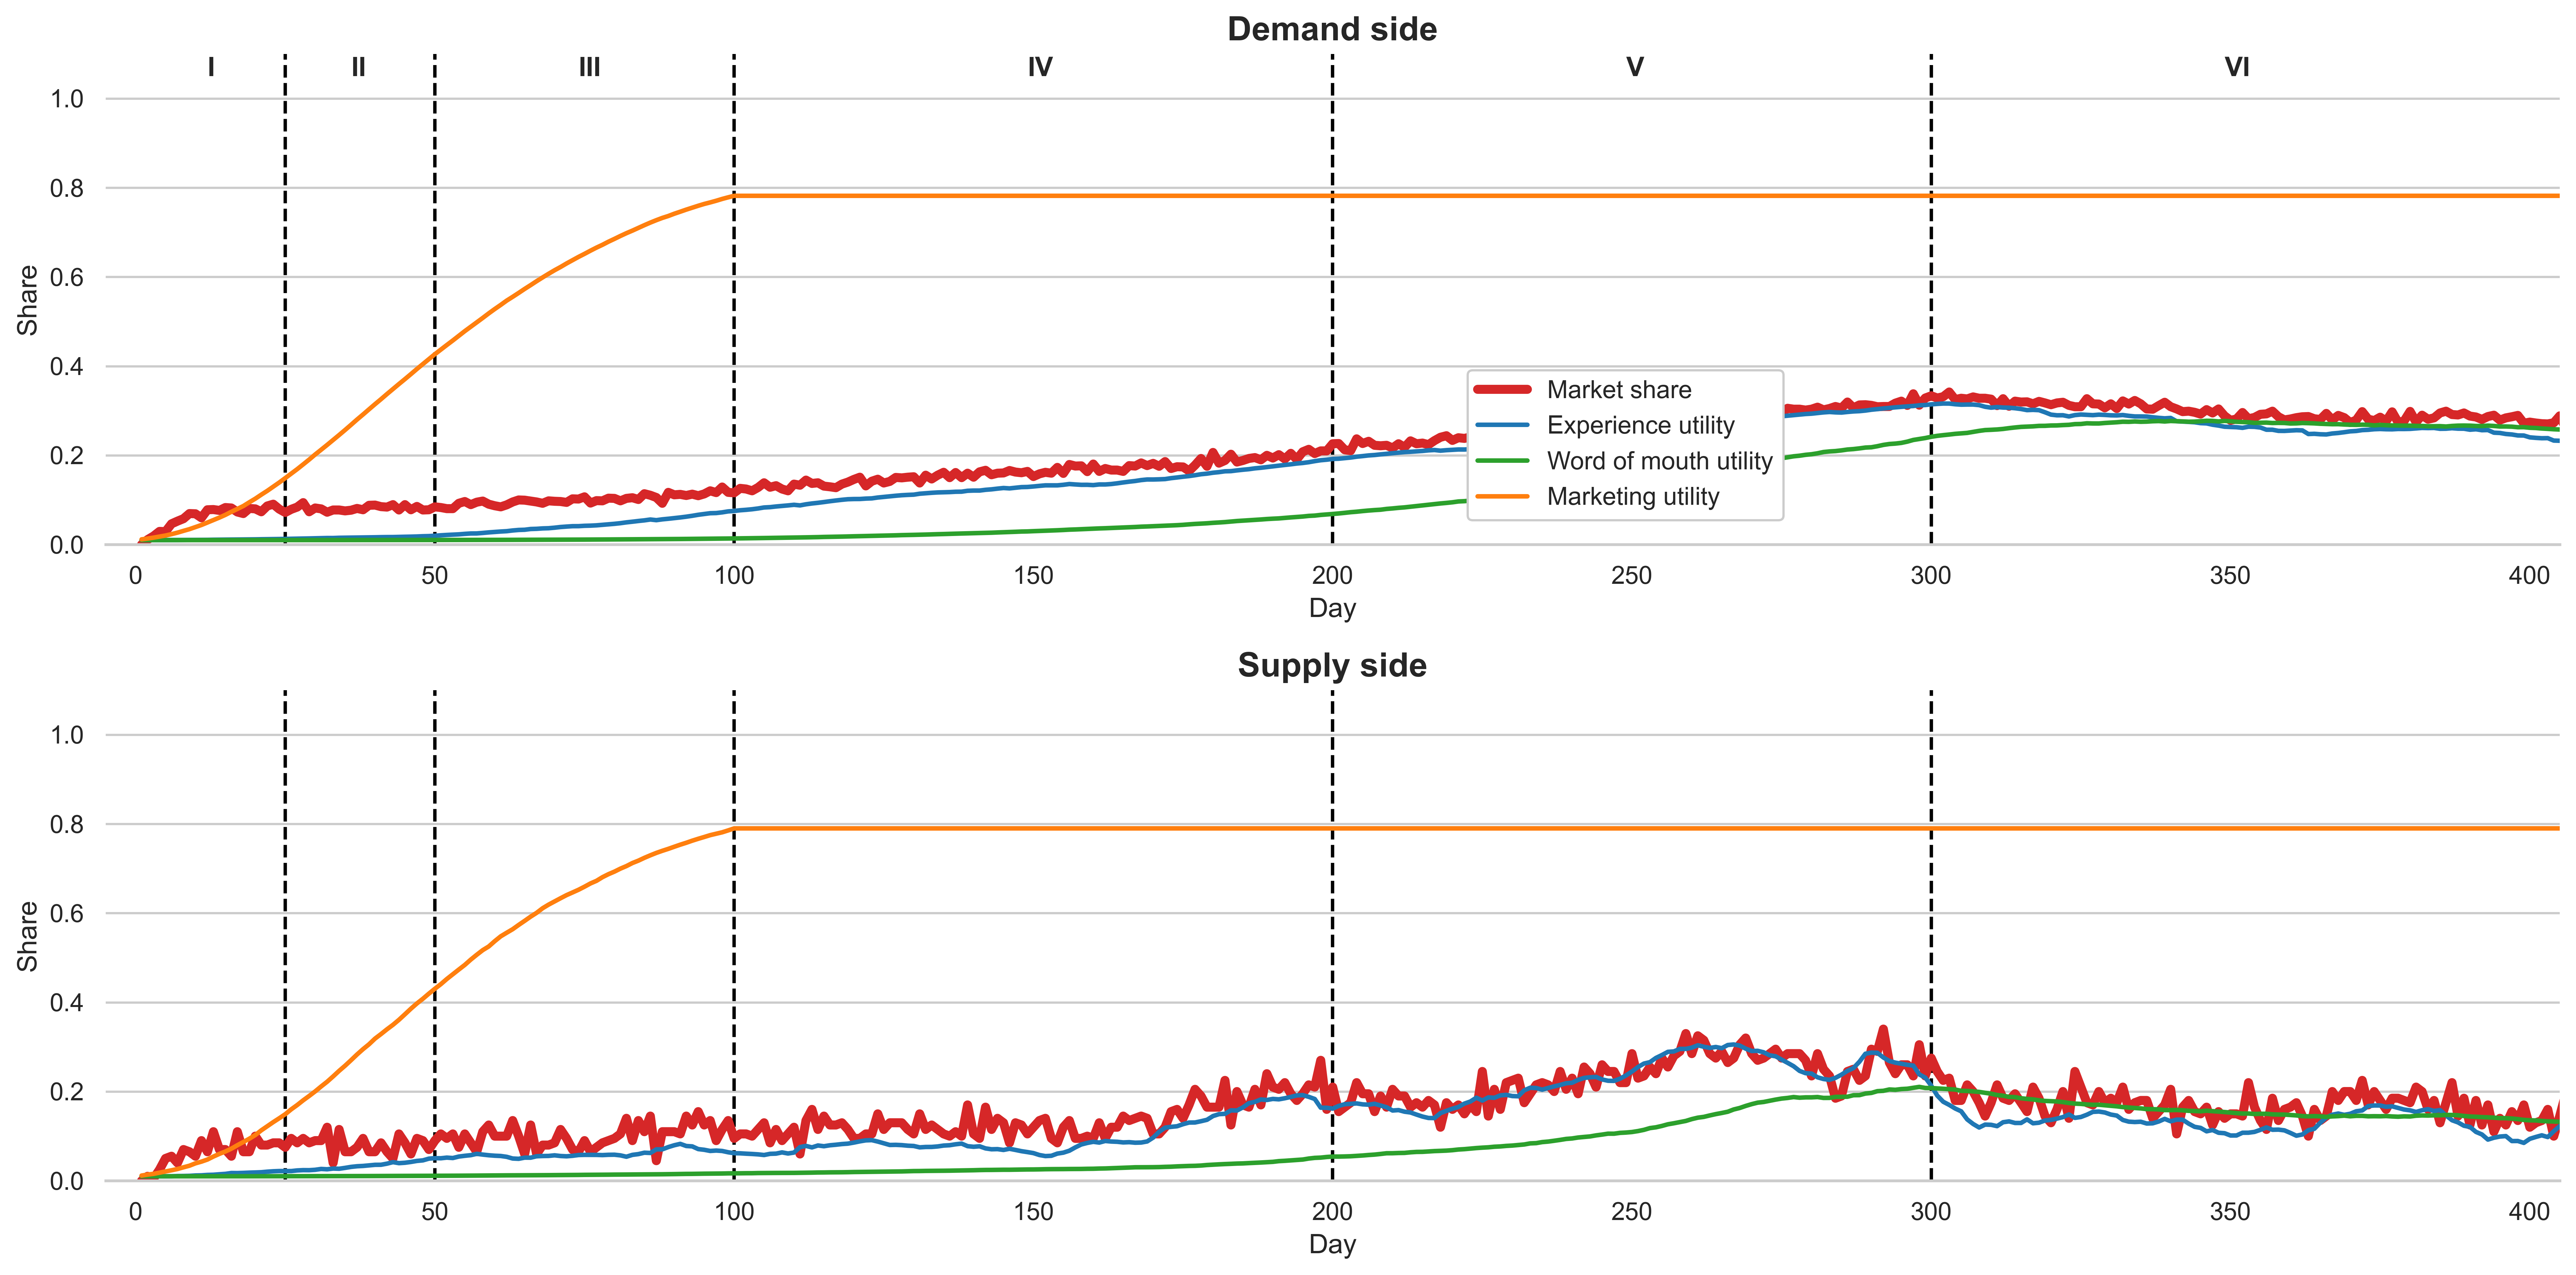

In [10]:
sim0 = sim_rln
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].pax_exp.WOM_U.mean())
            ym.append(sim0.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].veh_exp.WOM_U.mean())
            ym.append(sim0.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [11]:
plt.savefig('Fig1149.png')

<Figure size 3200x2400 with 0 Axes>

In [18]:
sim = sim_rln

In [19]:
sim.res[100].veh_exp

nRIDES  nREJECTED  nDAYS_WORKED  DRIVING_TIME  IDLE_TIME  PICKUP_DIST  \
veh                                                                          
1       0.0        0.0          13.0           0.0        0.0         0.00   
2       0.0        0.0           8.0           0.0        0.0         0.00   
3       0.0        0.0           6.0           0.0        0.0         0.00   
4       0.0        0.0          10.0           0.0        0.0         0.00   
5       0.0        0.0          10.0           0.0        0.0         0.00   
..      ...        ...           ...           ...        ...          ...   
196     0.0        0.0          11.0           0.0        0.0         0.00   
197     0.0        0.0           5.0           0.0        0.0         0.00   
198    12.0        0.0           8.0       11319.0     9536.0        42.59   
199     0.0        0.0           8.0           0.0        0.0         0.00   
200     0.0        0.0           5.0           0.0        0.0         0.00   

     DRIVING_DIST  REVENUE     COST  COMMISSION  ...  \
veh                                              ...   
1            0.00    0.000   0.0000       0.000  ...   
2            0.00    0.000   0.0000       0.000  ...   
3            0.00    0.000   0.0000       0.000  ...   
4            0.00    0.000   0.0000       0.000  ...   
5            0.00    0.000   0.0000       0.000  ...   
..            ...      ...      ...         ...  ...   
196          0.00    0.000   0.0000       0.000  ...   
197          0.00    0.000   0.0000       0.000  ...   
198        113.19   60.912  28.2975      40.608  ...   
199          0.00    0.000   0.0000       0.000  ...   
200          0.00    0.000   0.0000       0.000  ...   

     IS_REJECTED_BY_TRAVELLER  ARRIVES_AT_PICKUP  MEETS_TRAVELLER_AT_PICKUP  \
veh                                                                           
1                           0                0.0                          0   
2                           0                0.0                          0   
3                           0                0.0                          0   
4                           0                0.0                          0   
5                           0                0.0                          0   
..                        ...                ...                        ...   
196                         0                0.0                          0   
197                         0                0.0                          0   
198                         0             4259.0                          0   
199                         0                0.0                          0   
200                         0                0.0                          0   

     DEPARTS_FROM_PICKUP ARRIVES_AT_DROPOFF  CONTINUES_SHIFT  \
veh                                                            
1                    0.0                0.0                0   
2                    0.0                0.0                0   
3                    0.0                0.0                0   
4                    0.0                0.0                0   
5                    0.0                0.0                0   
..                   ...                ...              ...   
196                  0.0                0.0                0   
197                  0.0                0.0                0   
198                360.0             7060.0                0   
199                  0.0                0.0                0   
200                  0.0                0.0                0   

     STARTS_REPOSITIONING  REPOSITIONED  DECIDES_NOT_TO_DRIVE  ENDS_SHIFT  
veh                                                                        
1                       0             0                     0         0.0  
2                       0             0                     0         0.0  
3                       0             0                     0         0.0  
4                   

In [20]:
df = pd.DataFrame()
np = []
nv = []
rev = []
for d in range(0,sim.params.nD):
    np.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
    nv.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    rev.append(sim.res[d].pax_exp.plat_revenue.sum())

df['nP_share'] = np
df['nV_share'] = nv
df['Platform_rev'] = rev

df.to_csv('csv/baseline_fast_rev_only.csv')

In [22]:
sim.res[100].pax_exp.plat_revenue

pax
0       0.00000
1       0.00000
2       0.00000
3       0.00000
4       0.00000
         ...   
1995    0.00000
1996    0.00000
1997    0.00000
1998    0.00000
1999    3.35744
Name: plat_revenue, Length: 2000, dtype: float64

In [ ]:
df = pd.read_csv('csv/baseline_fast_h.csv')

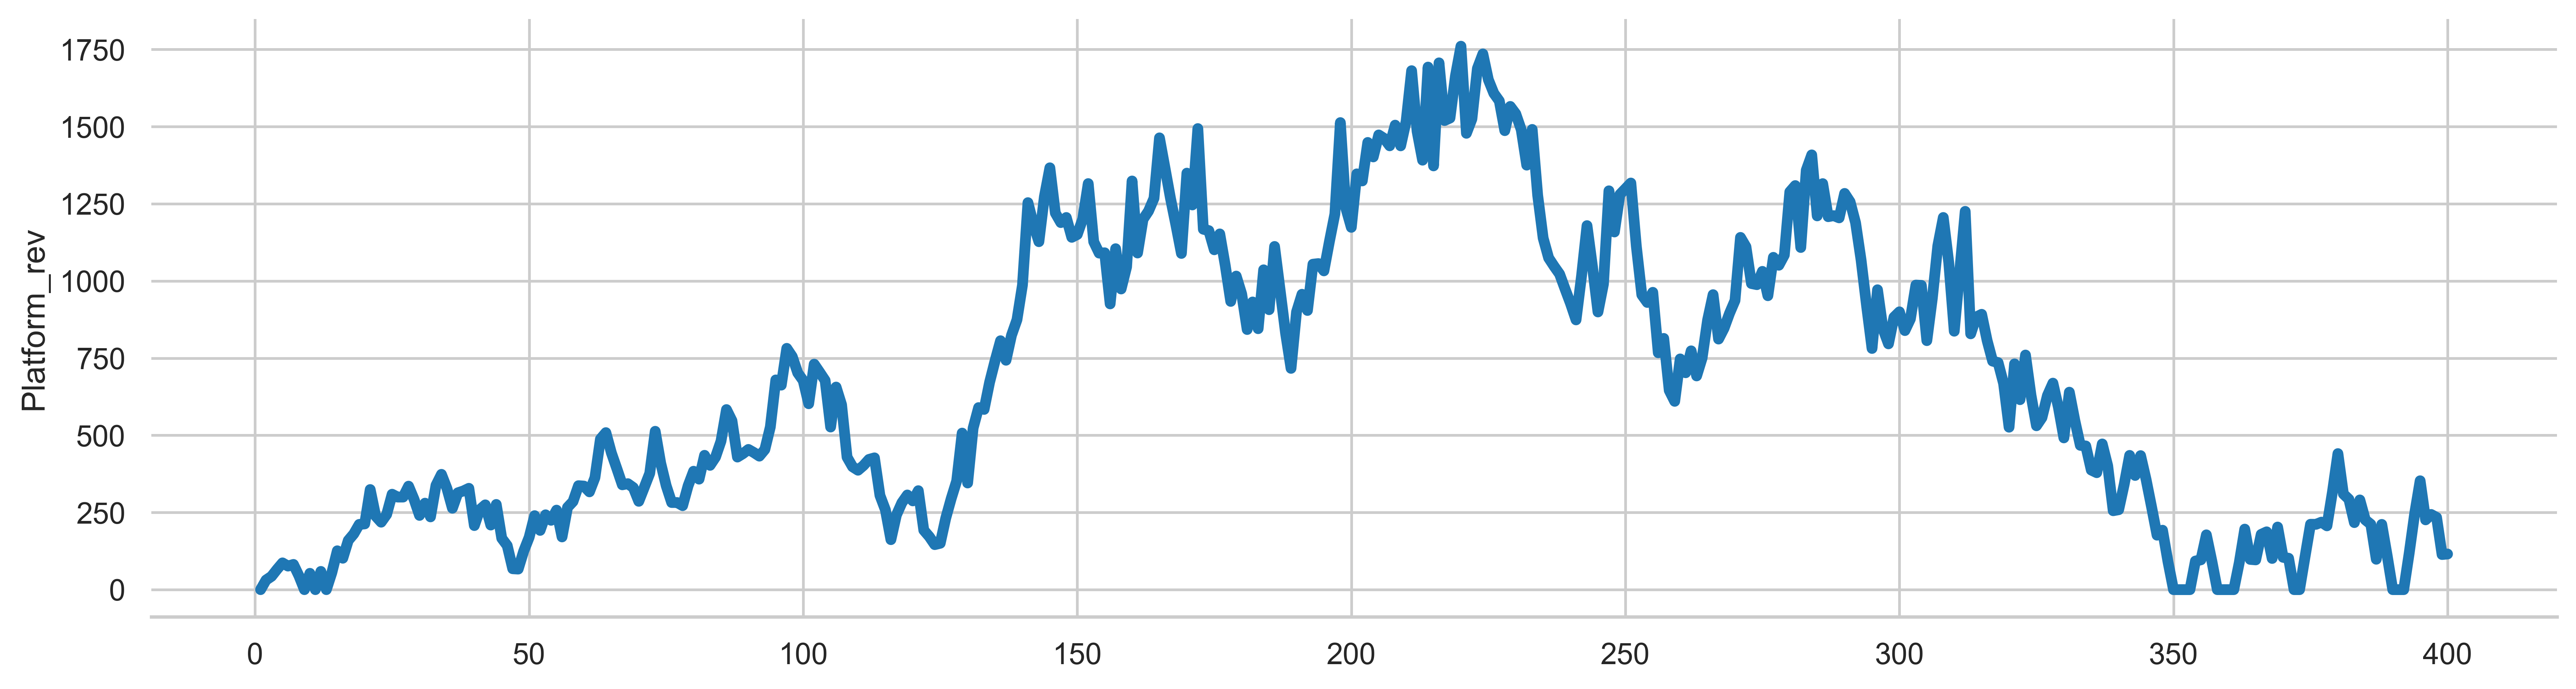

In [23]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,4))
sns.despine(left=True)

sns.lineplot(x=lx,y=df.Platform_rev, lw=4)

<AxesSubplot:ylabel='Platform_rev'>

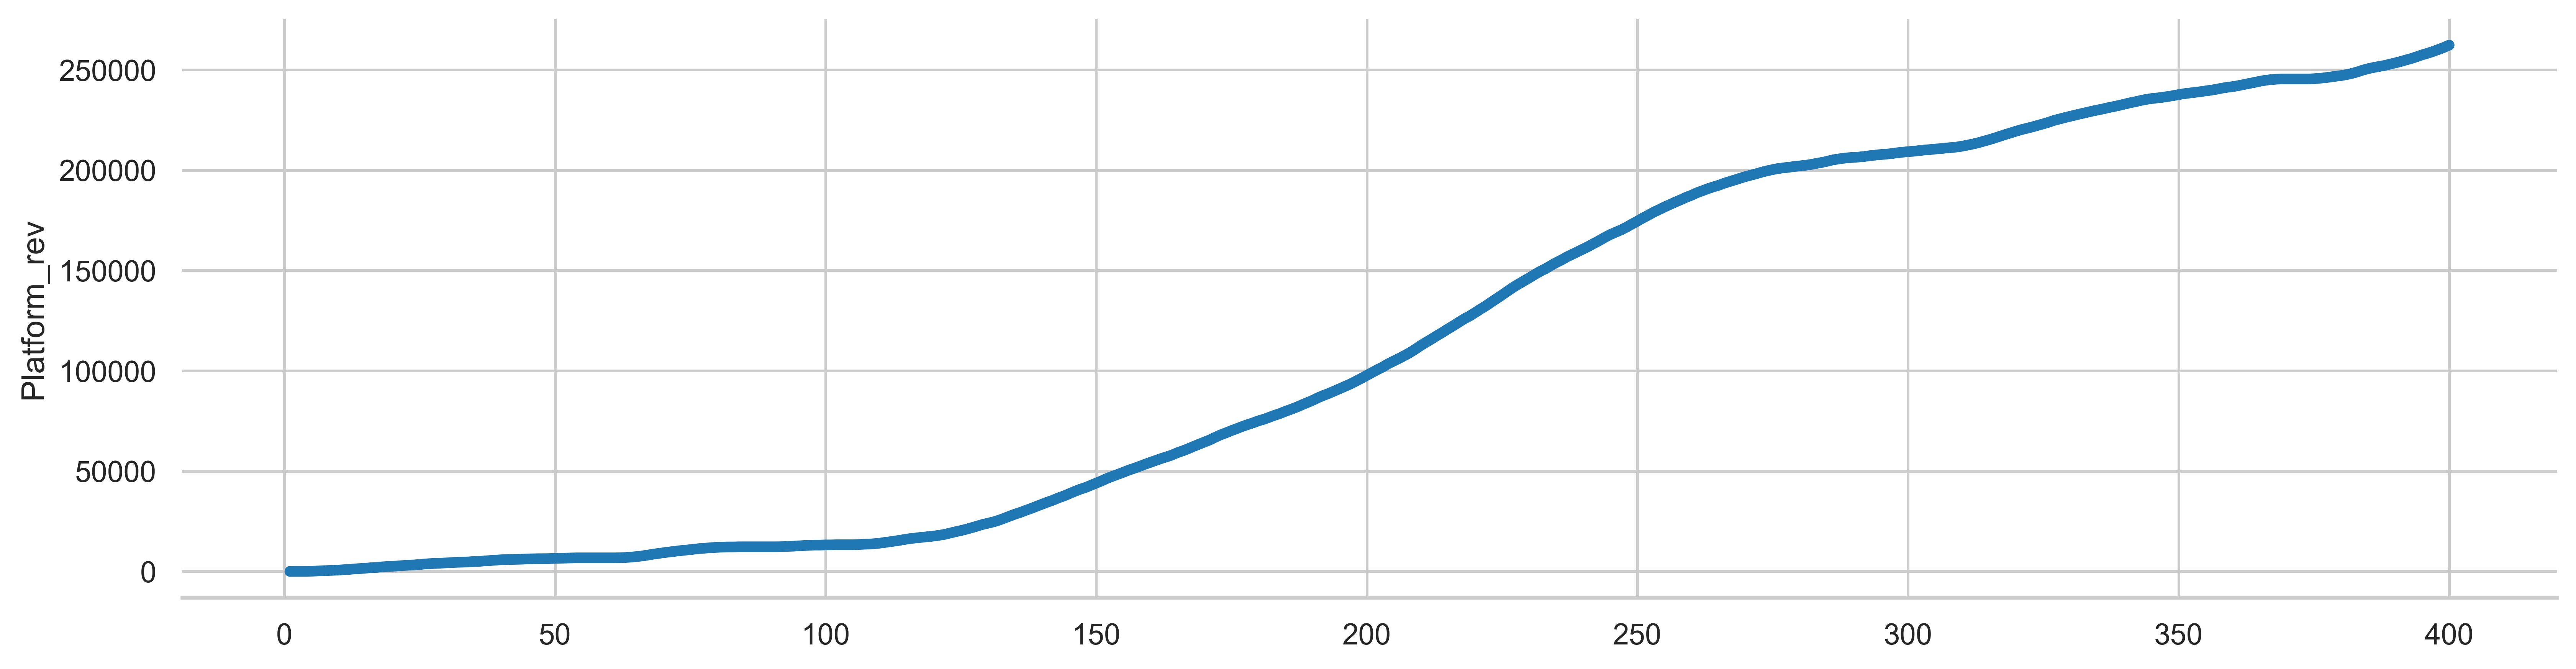

In [22]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,4))
sns.despine(left=True)

sns.lineplot(x=lx,y=df.Platform_rev.cumsum(), lw=4)

In [46]:
sim.platforms.fare[1]

1.2

In [16]:
sim

In [34]:
df = pd.read_csv('csv/baseline_fast_rev_0.5nP_0.5nV.csv')
df

Unnamed: 0  nP_share  nV_share  Platform_rev
0             0    0.0000     0.000       0.00000
1             1    0.0070     0.005      15.29592
2             2    0.0155     0.010      23.63168
3             3    0.0250     0.010      20.00924
4             4    0.0400     0.035      59.92720
..          ...       ...       ...           ...
395         395    0.2650     0.200    1031.77092
396         396    0.2720     0.210    1250.62672
397         397    0.2565     0.190    1178.18820
398         398    0.2725     0.115    1081.69752
399         399    0.2735     0.160    1266.17554

[400 rows x 4 columns]

In [20]:
df.Platform_rev.mean()

655.7543860000001

In [9]:
df.Platform_rev.mean()

604.4805835000008

In [10]:
df.Platform_rev.cumsum()

0           0.00000
1           0.00000
2           0.00000
3           0.00000
4          19.35682
           ...     
395    237676.85714
396    238813.95026
397    239708.00418
398    240677.55240
399    241792.23340
Name: Platform_rev, Length: 400, dtype: float64

In [30]:
df.Platform_rev.mean()

582.0985324000001

In [31]:
df.Platform_rev.cumsum()

0           0.00000
1          13.69388
2          44.78640
3          90.17320
4         149.92560
           ...     
395    228671.27896
396    229671.55656
397    230685.35376
398    231702.18296
399    232839.41296
Name: Platform_rev, Length: 400, dtype: float64

In [28]:
df.Platform_rev.mean()

553.2985028000002

In [35]:
df.Platform_rev.cumsum()

0           0.00000
1          15.29592
2          38.92760
3          58.93684
4         118.86404
           ...     
395    216542.71314
396    217793.33986
397    218971.52806
398    220053.22558
399    221319.40112
Name: Platform_rev, Length: 400, dtype: float64

In [26]:
df.Platform_rev.mean()

602.1789189999998

In [33]:
df.Platform_rev.cumsum()

0           0.00000
1           0.00000
2          13.21864
3          53.39316
4          80.25430
           ...     
395    236196.97054
396    237392.87096
397    238450.85096
398    239605.73920
399    240871.56760
Name: Platform_rev, Length: 400, dtype: float64

In [36]:
20/582

0.03436426116838488

In [ ]:
=====================================================================================

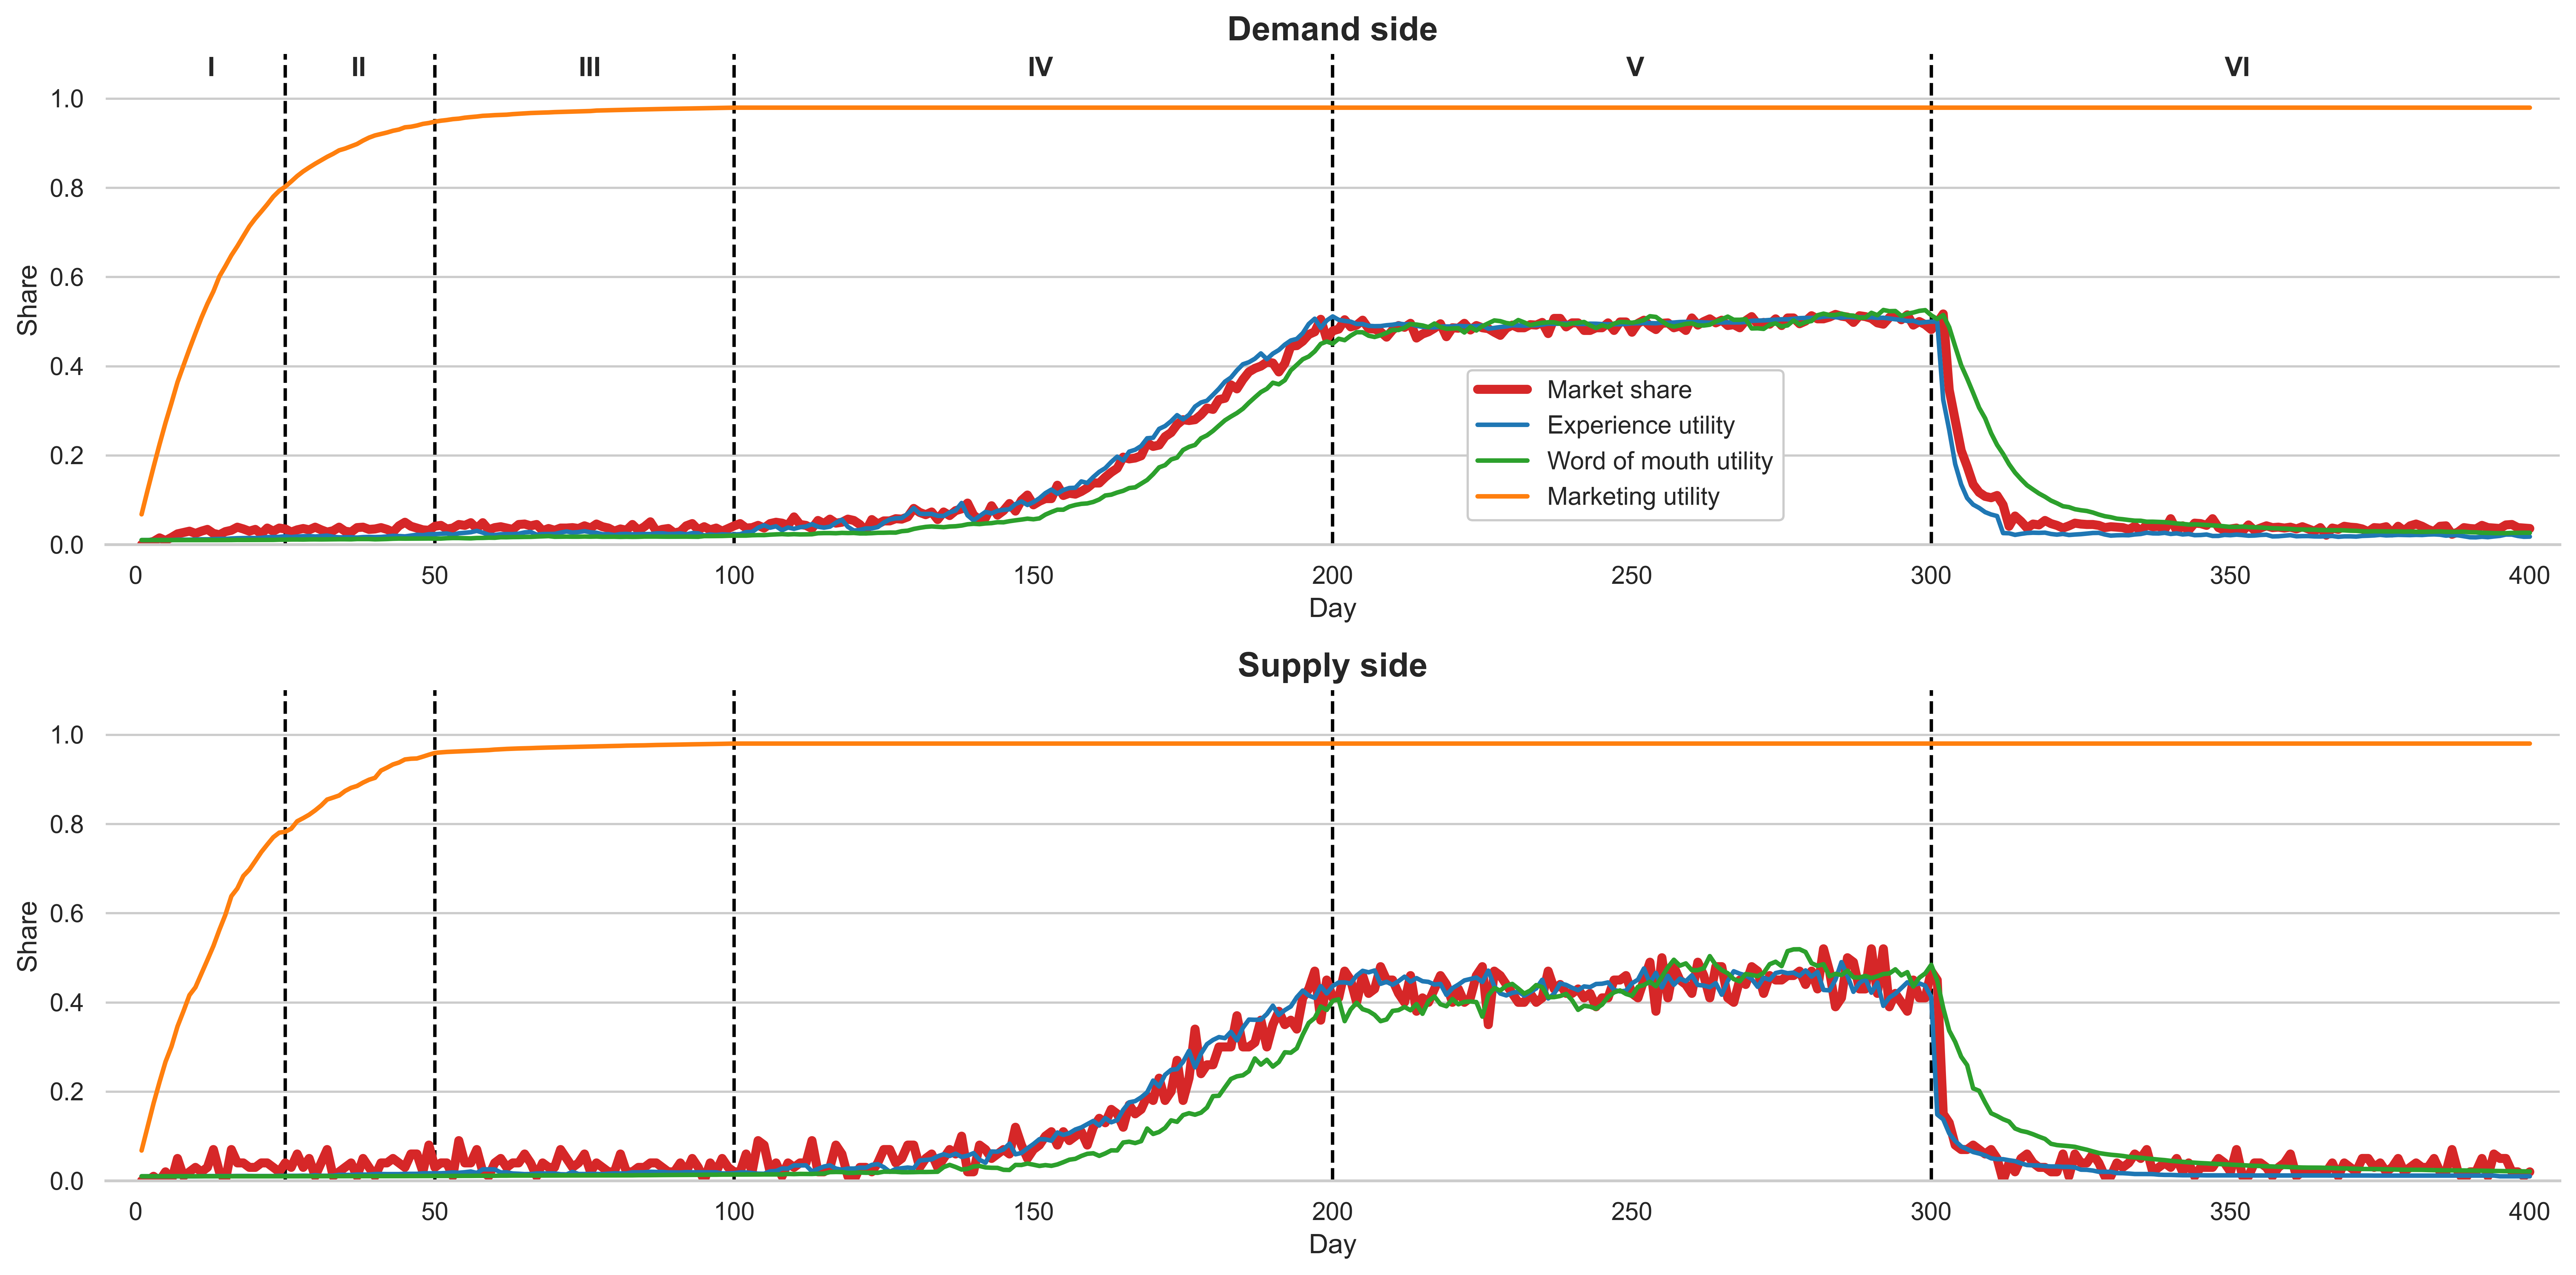

In [7]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 5
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

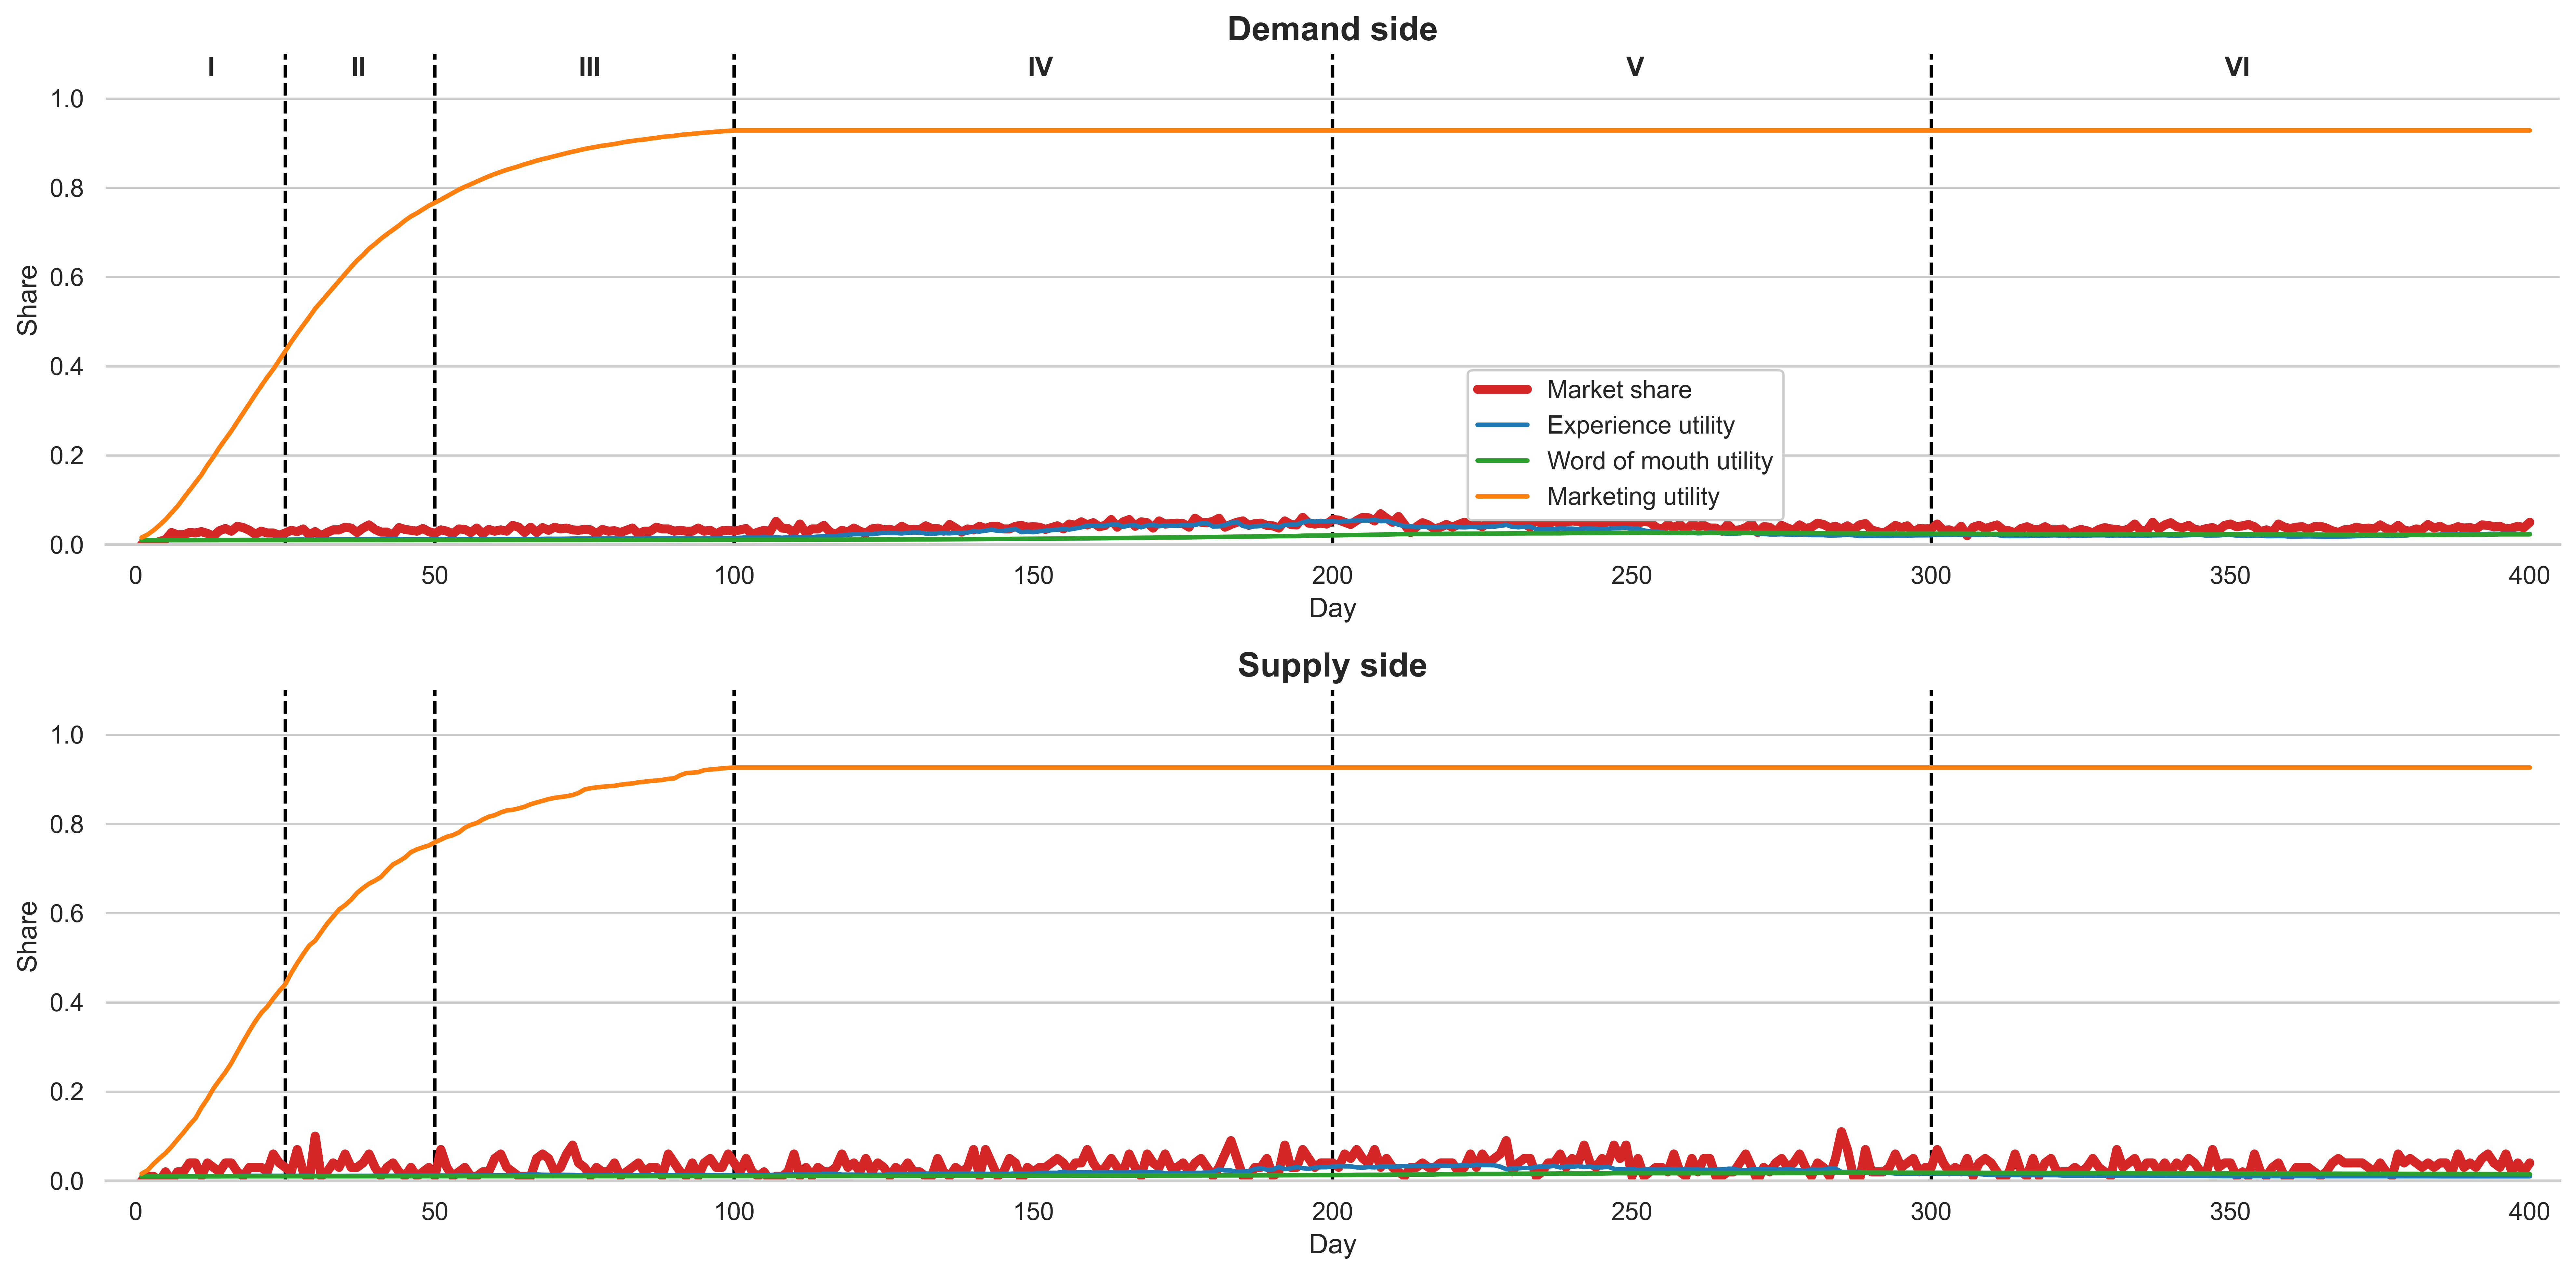

In [7]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

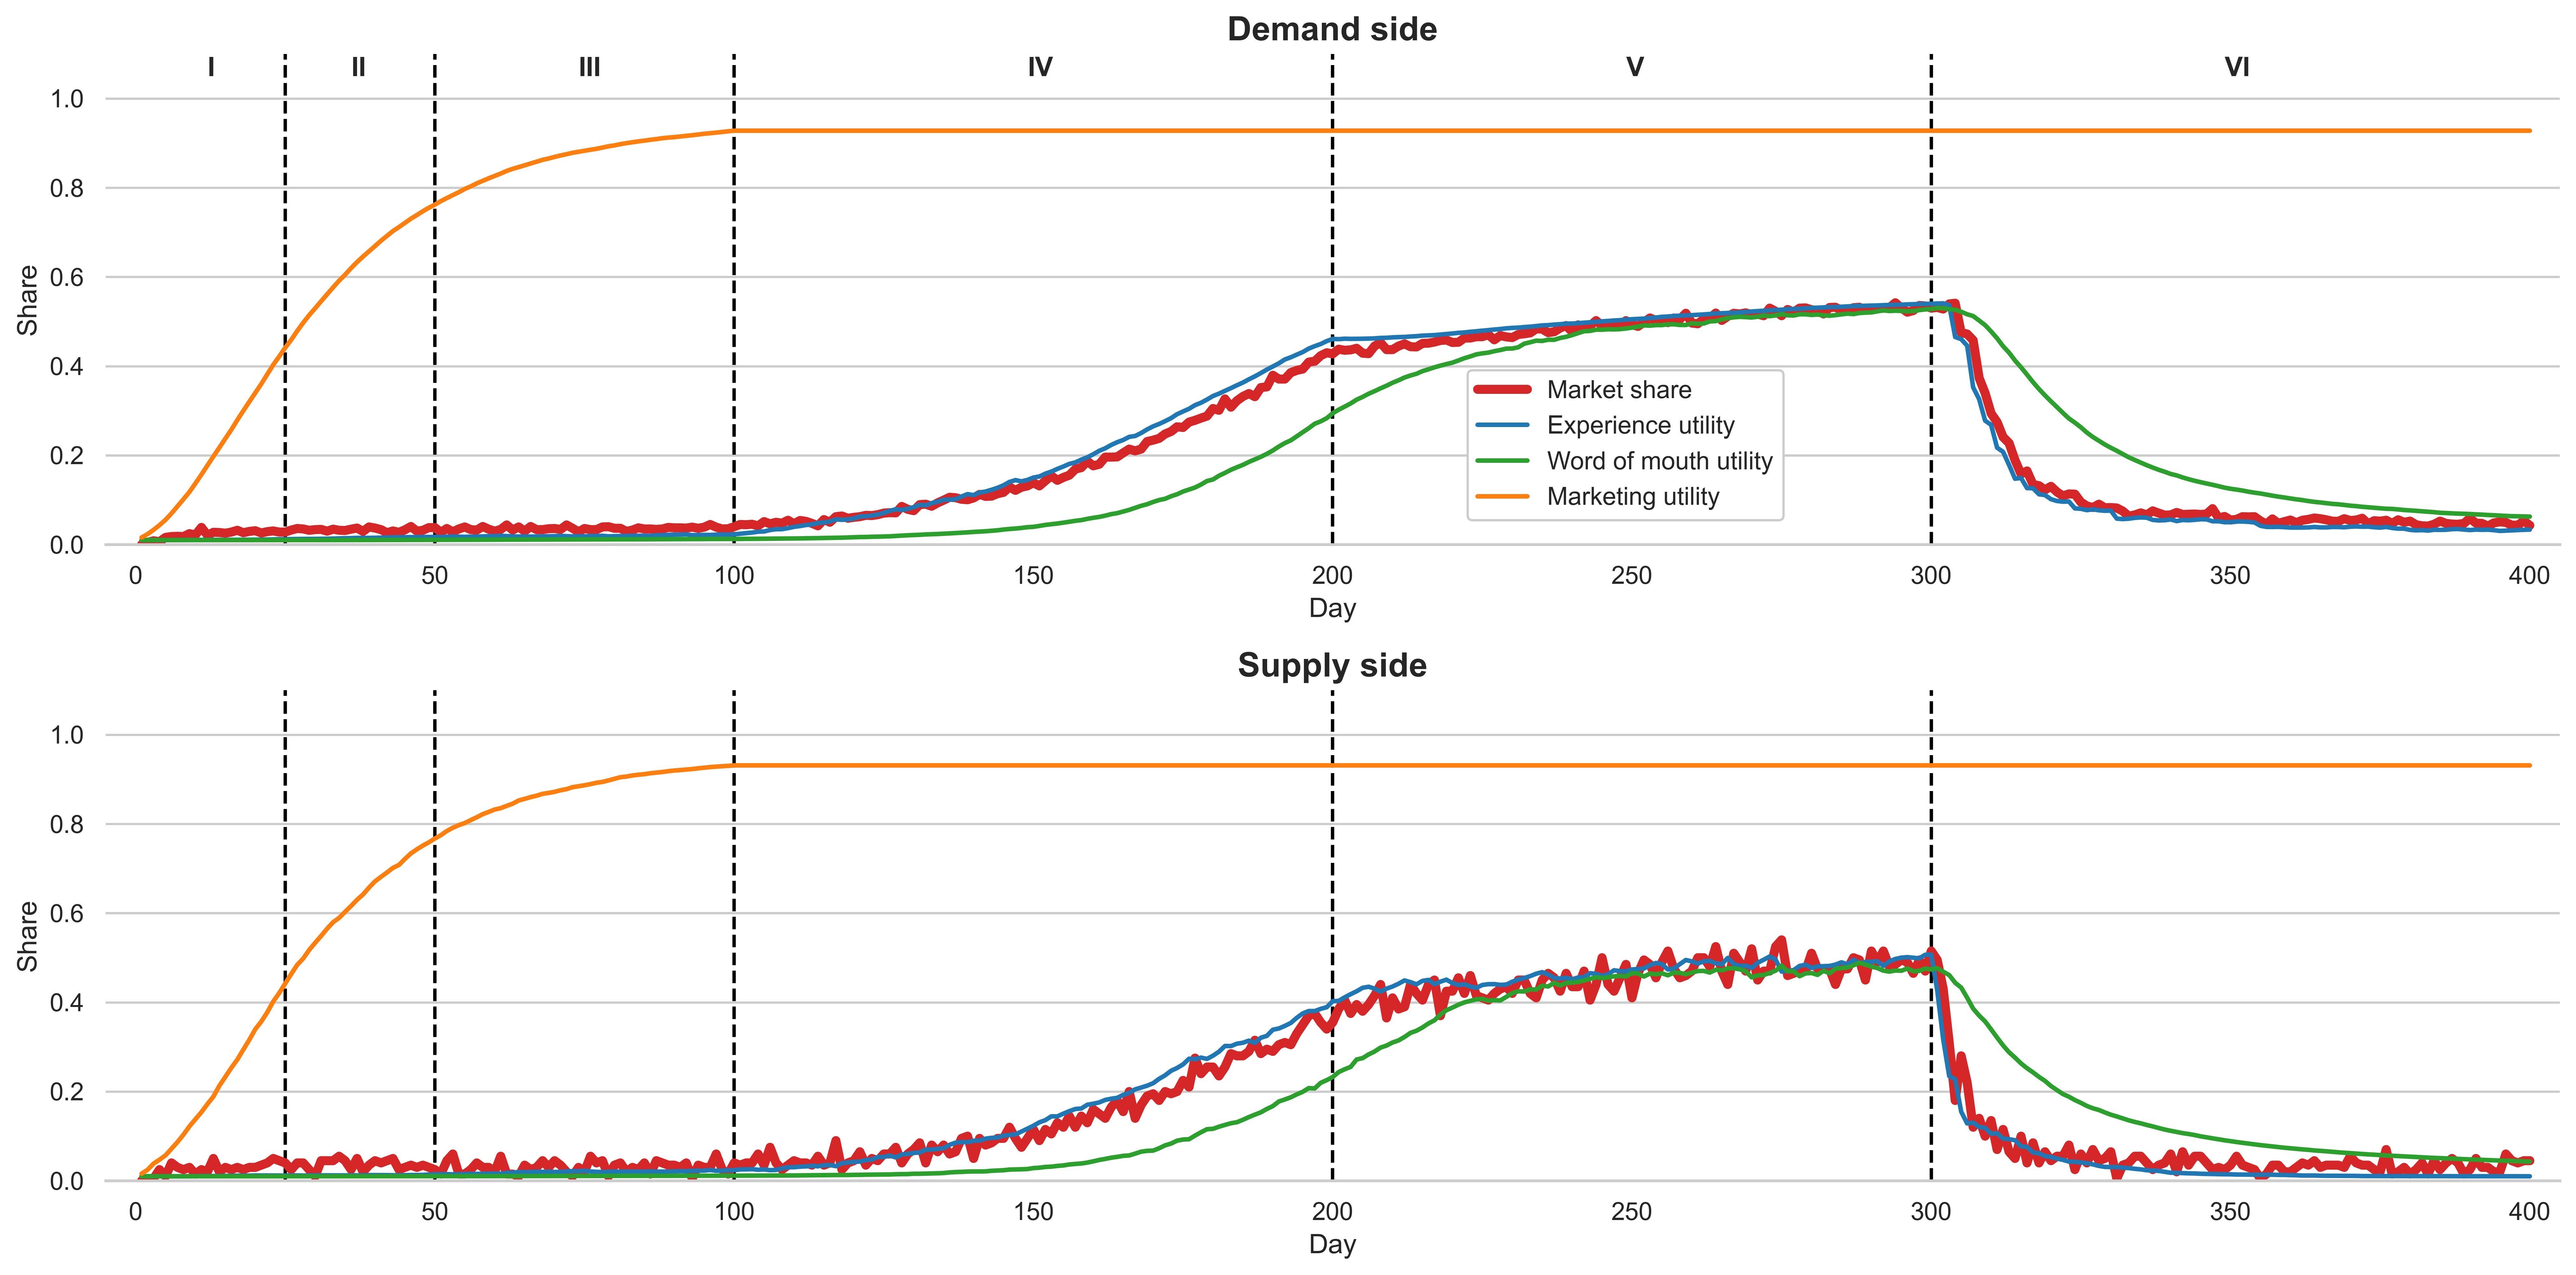

In [7]:
# nV=200, nP=2000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

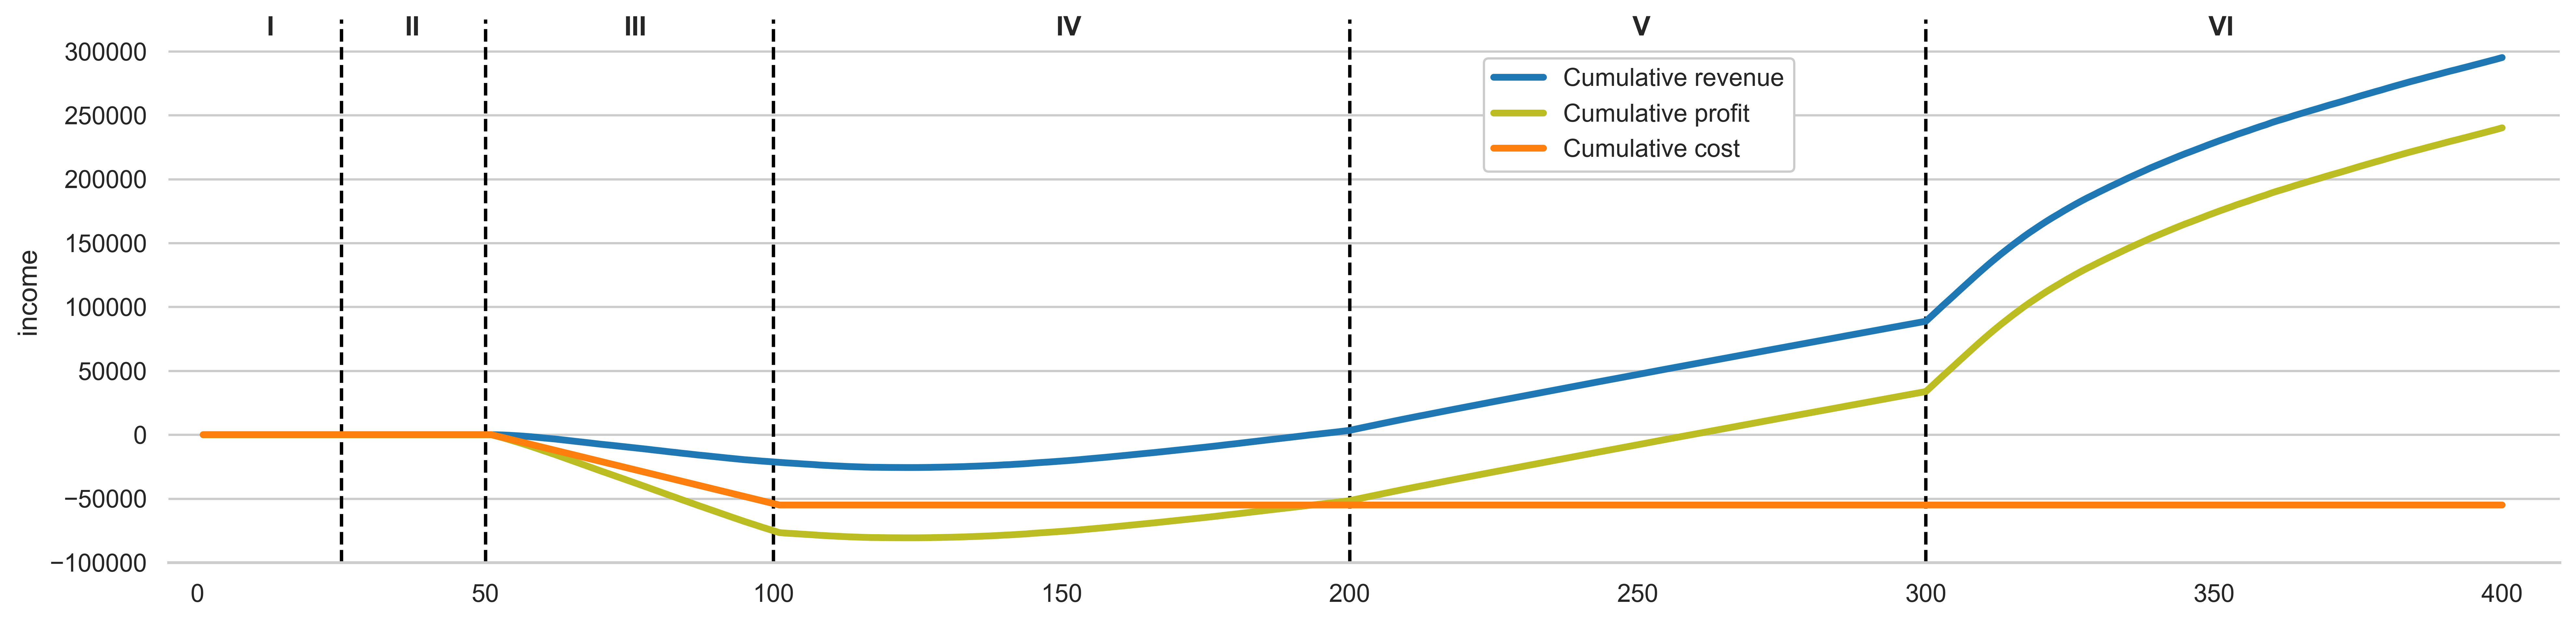

In [177]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16,4))
sns.despine(left=True)

x = []
ypr = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    ypr.append(df[df.OUT==False].plat_profit.sum())
x = [i for i in range(1,len(ypr)+1)]

df = pd.Series(ypr).to_frame()
df.columns = ['income']
marketing_costs = 0.5
df['marketing costs']=df.apply(lambda x: -marketing_costs*2200 if x.name >50 and x.name<=100 else 0, axis = 1).astype(int)
df['profit']=df.income + df['marketing costs']

sns.lineplot(x=x, y=df.income.cumsum(), lw=3, label = 'Cumulative revenue', color='C0')#, marker='o')
sns.lineplot(x=x, y=df.profit.cumsum(), lw=3, label = 'Cumulative profit', color='C8')#, marker='o')
sns.lineplot(x=x, y=df['marketing costs'].astype(int).cumsum(), lw=3, label = 'Cumulative cost', color='C1')#, marker='o')

ax.grid(axis='x')
ax.vlines([25, 50, 100, 200, 300], -100000, 325000, linestyles='dashed', colors='black')
# sns.lineplot(x=x, y=ypr, label = 'plat_profit')#, marker='o')
sns.despine(left=True)
ax.set(xlim=(-5,410), ylim=(-100000,325000))
ax.legend(framealpha=1, loc=(0.55,0.72))

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,312500),(36,312500),(74,312500),(149,312500),(249,312500),(349,312500)]
    ax.annotate(value[i], xy =coords[i], fontweight='bold')

plt.tight_layout()
# plt.savefig('Fig5.png')

In [21]:
df = pd.read_csv('csv/baseline_fast.csv')
df

Unnamed: 0  nP_share  nV_share  Platform_rev
0             0    0.0000     0.000       0.00000
1             1    0.0120     0.005      21.47460
2             2    0.0220     0.015      34.04332
3             3    0.0300     0.025      42.06120
4             4    0.0325     0.015      49.05952
..          ...       ...       ...           ...
395         395    0.1665     0.115    1123.47240
396         396    0.1555     0.080    1085.47640
397         397    0.1495     0.105     993.22100
398         398    0.1590     0.060    1099.28520
399         399    0.1540     0.090    1055.16860

[400 rows x 4 columns]

In [22]:
df.Platform_rev.max()

4098.8442

In [ ]:
2638.8502